## EDA Final Project
## Group No :- 29


## Data Collection

Link of row dataset : https://cricsheet.org/matches/

convert json format data to csv format data

In [1]:
import json
import pandas as pd

# Load the JSON file
with open('335982.json') as file:
    data = json.load(file)

In [2]:
innings_data = []
for inning in data['innings']:
    team = inning['team']
    for over in inning['overs']:
        for delivery in over['deliveries']:
            delivery_data = {
                "Date": data["info"]["dates"][0],
                "City": data["info"]["city"],
                "Venue": data["info"]["venue"],
                "Season": data["info"]["season"],
                "MatchNumber": data["info"]["event"]["match_number"],
                "Team1": data["info"]["teams"][0],
                "Team2": data["info"]["teams"][1],
                "TossWinner": data["info"]["toss"]["winner"],
                "TossDecision": data["info"]["toss"]["decision"],
                'BattingTeam': team,
                'Over': over['over'] + 1,
                'Batter': delivery['batter'],
                'Bowler': delivery['bowler'],
                'RunsBatter': delivery['runs']['batter'],
                'RunsTotal': delivery['runs']['total'],
                'Extras': sum(delivery.get('extras', {}).values()),
                'ExtrasType': list(delivery.get('extras', {}).keys())[0] if delivery.get('extras') else None,
                'IsBoundary': delivery['runs']['batter'] in [4, 6],
                'PlayerOut': delivery.get('wickets', [{}])[0].get('player_out'),
                'WicketKind': delivery.get('wickets', [{}])[0].get('kind'),
                'FieldersInvolved': ', '.join([fielder['name'] for fielder in delivery.get('wickets', [{}])[0].get('fielders', [])]) if 'wickets' in delivery else None
            }
            innings_data.append(delivery_data)


In [3]:
# Convert to DataFrame
balls_df = pd.DataFrame(innings_data)

# Save DataFrame to CSV
balls_df.to_csv('cricket_data.csv', index=False)

print("Data has been successfully converted to cricket_data.csv")

Data has been successfully converted to cricket_data.csv


# Data Cleaning And Apply EDA

Link of row dataset : https://cricsheet.org/matches/


### Load Dataset

In [4]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/DA_EDA/refs/heads/main/cricket_data%20(1).csv")
data.head(4)

Date       City                  Venue   Season  MatchNumber  \
0  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
1  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
2  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
3  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   

                         Team1                  Team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   

                    TossWinner TossDecision            BattingTeam  ...  \
0  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
1  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
2  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
3  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   

        Batter   Bowler RunsBatter  RunsTotal  Extras  ExtrasType IsBoundary  \
0   SC Ganguly  P Kumar          0          1       1     legbyes      False   
1  BB McCullum  P Kumar          0          0       0         NaN      False   
2  BB McCullum  P Kumar          0          1       1       wides      False   
3  BB McCullum  P Kumar          0          0       0         NaN      False   

   PlayerOut WicketKind FieldersInvolved  
0        NaN        NaN              NaN  
1        NaN        NaN              NaN  
2        NaN        NaN              NaN  
3        NaN        NaN              NaN  

[4 rows x 21 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              225 non-null    object
 1   City              225 non-null    object
 2   Venue             225 non-null    object
 3   Season            225 non-null    object
 4   MatchNumber       225 non-null    int64 
 5   Team1             225 non-null    object
 6   Team2             225 non-null    object
 7   TossWinner        225 non-null    object
 8   TossDecision      225 non-null    object
 9   BattingTeam       225 non-null    object
 10  Over              225 non-null    int64 
 11  Batter            225 non-null    object
 12  Bowler            225 non-null    object
 13  RunsBatter        225 non-null    int64 
 14  RunsTotal         225 non-null    int64 
 15  Extras            225 non-null    int64 
 16  ExtrasType        24 non-null     object
 17  IsBoundary      

In [7]:
data.dtypes

Date                object
City                object
Venue               object
Season              object
MatchNumber          int64
Team1               object
Team2               object
TossWinner          object
TossDecision        object
BattingTeam         object
Over                 int64
Batter              object
Bowler              object
RunsBatter           int64
RunsTotal            int64
Extras               int64
ExtrasType          object
IsBoundary            bool
PlayerOut           object
WicketKind          object
FieldersInvolved    object
dtype: object

In [8]:
data.columns

Index(['Date', 'City', 'Venue', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'TossWinner', 'TossDecision', 'BattingTeam', 'Over', 'Batter', 'Bowler',
       'RunsBatter', 'RunsTotal', 'Extras', 'ExtrasType', 'IsBoundary',
       'PlayerOut', 'WicketKind', 'FieldersInvolved'],
      dtype='object')

In [9]:
data.shape

(225, 21)

In [10]:
data.head(5)

Date       City                  Venue   Season  MatchNumber  \
0  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
1  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
2  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
3  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
4  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   

                         Team1                  Team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders   

                    TossWinner TossDecision            BattingTeam  ...  \
0  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
1  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
2  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
3  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
4  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   

        Batter   Bowler RunsBatter  RunsTotal  Extras  ExtrasType IsBoundary  \
0   SC Ganguly  P Kumar          0          1       1     legbyes      False   
1  BB McCullum  P Kumar          0          0       0         NaN      False   
2  BB McCullum  P Kumar          0          1       1       wides      False   
3  BB McCullum  P Kumar          0          0       0         NaN      False   
4  BB McCullum  P Kumar          0          0       0         NaN      False   

   PlayerOut WicketKind FieldersInvolved  
0        NaN        NaN              NaN  
1        NaN        NaN              NaN  
2        NaN        NaN              NaN  
3        NaN        NaN              NaN  
4        NaN        NaN              NaN  

[5 rows x 21 columns]

In [11]:
data.isnull().sum()

Date                  0
City                  0
Venue                 0
Season                0
MatchNumber           0
Team1                 0
Team2                 0
TossWinner            0
TossDecision          0
BattingTeam           0
Over                  0
Batter                0
Bowler                0
RunsBatter            0
RunsTotal             0
Extras                0
ExtrasType          201
IsBoundary            0
PlayerOut           212
WicketKind          212
FieldersInvolved    215
dtype: int64

In [12]:
len(data)

225

In [13]:
print("\nDataset Shape:")
no_of_rows = data.shape[0]
no_of_cols = data.shape[1]
print("No of rows : " , no_of_rows)
print("No of columns : " , no_of_cols)


Dataset Shape:
No of rows :  225
No of columns :  21


In [14]:
categorical_columns = [i for i in data.columns if data[i].dtype == "O"]
categorical_columns

['Date',
 'City',
 'Venue',
 'Season',
 'Team1',
 'Team2',
 'TossWinner',
 'TossDecision',
 'BattingTeam',
 'Batter',
 'Bowler',
 'ExtrasType',
 'PlayerOut',
 'WicketKind',
 'FieldersInvolved']

In [15]:
numerical_columns = [i for i in data.columns if data[i].dtype != "O"]
numerical_columns

['MatchNumber', 'Over', 'RunsBatter', 'RunsTotal', 'Extras', 'IsBoundary']

In [16]:
print("\nStatistical Summary of Numerical Columns:")
data[numerical_columns].describe()


Statistical Summary of Numerical Columns:


MatchNumber        Over  RunsBatter   RunsTotal      Extras
count        225.0  225.000000  225.000000  225.000000  225.000000
mean           1.0    9.417778    1.191111    1.351111    0.160000
std            0.0    5.341352    1.771277    1.761774    0.591004
min            1.0    1.000000    0.000000    0.000000    0.000000
25%            1.0    5.000000    0.000000    0.000000    0.000000
50%            1.0    9.000000    1.000000    1.000000    0.000000
75%            1.0   14.000000    1.000000    1.000000    0.000000
max            1.0   20.000000    6.000000    6.000000    5.000000

In [17]:
print("\nStatistical Summary of Categorical Columns:")
data[categorical_columns].describe()


Statistical Summary of Categorical Columns:


Date       City                  Venue   Season  \
count          225        225                    225      225   
unique           1          1                      1        1   
top     2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
freq           225        225                    225      225   

                              Team1                  Team2  \
count                           225                    225   
unique                            1                      1   
top     Royal Challengers Bangalore  Kolkata Knight Riders   
freq                            225                    225   

                         TossWinner TossDecision            BattingTeam  \
count                           225          225                    225   
unique                            1            1                      2   
top     Royal Challengers Bangalore        field  Kolkata Knight Riders   
freq                            225          225                    124   

             Batter      Bowler ExtrasType   PlayerOut WicketKind  \
count           225         225         24          13         13   
unique           16          11          3          13          3   
top     BB McCullum  AB Agarkar      wides  SC Ganguly     caught   
freq             77          28         14           1          9   

       FieldersInvolved  
count                10  
unique                8  
top            M Kartik  
freq                  2

In [18]:
data.dtypes

Date                object
City                object
Venue               object
Season              object
MatchNumber          int64
Team1               object
Team2               object
TossWinner          object
TossDecision        object
BattingTeam         object
Over                 int64
Batter              object
Bowler              object
RunsBatter           int64
RunsTotal            int64
Extras               int64
ExtrasType          object
IsBoundary            bool
PlayerOut           object
WicketKind          object
FieldersInvolved    object
dtype: object

In [19]:
data.head(3)

Date       City                  Venue   Season  MatchNumber  \
0  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
1  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
2  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   

                         Team1                  Team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   

                    TossWinner TossDecision            BattingTeam  ...  \
0  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
1  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
2  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   

        Batter   Bowler RunsBatter  RunsTotal  Extras  ExtrasType IsBoundary  \
0   SC Ganguly  P Kumar          0          1       1     legbyes      False   
1  BB McCullum  P Kumar          0          0       0         NaN      False   
2  BB McCullum  P Kumar          0          1       1       wides      False   

   PlayerOut WicketKind FieldersInvolved  
0        NaN        NaN              NaN  
1        NaN        NaN              NaN  
2        NaN        NaN              NaN  

[3 rows x 21 columns]

In [20]:
data.tail(4)

Date       City                  Venue   Season  MatchNumber  \
221  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
222  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
223  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
224  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   

                           Team1                  Team2  \
221  Royal Challengers Bangalore  Kolkata Knight Riders   
222  Royal Challengers Bangalore  Kolkata Knight Riders   
223  Royal Challengers Bangalore  Kolkata Knight Riders   
224  Royal Challengers Bangalore  Kolkata Knight Riders   

                      TossWinner TossDecision                  BattingTeam  \
221  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
222  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
223  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
224  Royal Challengers Bangalore        field  Royal Challengers Bangalore   

     ...    Batter     Bowler RunsBatter  RunsTotal  Extras  ExtrasType  \
221  ...  SB Joshi   I Sharma          1          1       0         NaN   
222  ...   P Kumar   I Sharma          0          0       0         NaN   
223  ...  SB Joshi  LR Shukla          0          1       1       wides   
224  ...  SB Joshi  LR Shukla          0          0       0         NaN   

    IsBoundary  PlayerOut WicketKind FieldersInvolved  
221      False        NaN        NaN              NaN  
222      False        NaN        NaN              NaN  
223      False        NaN        NaN              NaN  
224      False   SB Joshi     caught      BB McCullum  

[4 rows x 21 columns]

In [21]:
data.select_dtypes(include="object")

Date       City                  Venue   Season  \
0    2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
1    2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
2    2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
3    2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
4    2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
..          ...        ...                    ...      ...   
220  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
221  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
222  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
223  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   
224  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08   

                           Team1                  Team2  \
0    Royal Challengers Bangalore  Kolkata Knight Riders   
1    Royal Challengers Bangalore  Kolkata Knight Riders   
2    Royal Challengers Bangalore  Kolkata Knight Riders   
3    Royal Challengers Bangalore  Kolkata Knight Riders   
4    Royal Challengers Bangalore  Kolkata Knight Riders   
..                           ...                    ...   
220  Royal Challengers Bangalore  Kolkata Knight Riders   
221  Royal Challengers Bangalore  Kolkata Knight Riders   
222  Royal Challengers Bangalore  Kolkata Knight Riders   
223  Royal Challengers Bangalore  Kolkata Knight Riders   
224  Royal Challengers Bangalore  Kolkata Knight Riders   

                      TossWinner TossDecision                  BattingTeam  \
0    Royal Challengers Bangalore        field        Kolkata Knight Riders   
1    Royal Challengers Bangalore        field        Kolkata Knight Riders   
2    Royal Challengers Bangalore        field        Kolkata Knight Riders   
3    Royal Challengers Bangalore        field        Kolkata Knight Riders   
4    Royal Challengers Bangalore        field        Kolkata Knight Riders   
..                           ...          ...                          ...   
220  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
221  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
222  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
223  Royal Challengers Bangalore        field  Royal Challengers Bangalore   
224  Royal Challengers Bangalore        field  Royal Challengers Bangalore   

          Batter     Bowler ExtrasType PlayerOut WicketKind FieldersInvolved  
0     SC Ganguly    P Kumar    legbyes       NaN        NaN              NaN  
1    BB McCullum    P Kumar        NaN       NaN        NaN              NaN  
2    BB McCullum    P Kumar      wides       NaN        NaN              NaN  
3    BB McCullum    P Kumar        NaN       NaN        NaN              NaN  
4    BB McCullum    P Kumar        NaN       NaN        NaN              NaN  
..           ...        ...        ...       ...        ...              ...  
220      P Kumar   I Sharma    legbyes       NaN        NaN              NaN  
221     SB Joshi   I Sharma        NaN       NaN        NaN              NaN  
222      P Kumar   I Sharma        NaN       NaN        NaN              NaN  
223     SB Joshi  LR Shukla      wides       NaN        NaN              NaN  
224     SB Joshi  LR Shukla        NaN  SB Joshi     caught      BB McCullum  

[225 rows x 15 columns]

### Missing Value Analysis

In [22]:
data.isnull().sum()

Date                  0
City                  0
Venue                 0
Season                0
MatchNumber           0
Team1                 0
Team2                 0
TossWinner            0
TossDecision          0
BattingTeam           0
Over                  0
Batter                0
Bowler                0
RunsBatter            0
RunsTotal             0
Extras                0
ExtrasType          201
IsBoundary            0
PlayerOut           212
WicketKind          212
FieldersInvolved    215
dtype: int64

In [23]:
(data.isnull().sum()/len(data))*100

Date                 0.000000
City                 0.000000
Venue                0.000000
Season               0.000000
MatchNumber          0.000000
Team1                0.000000
Team2                0.000000
TossWinner           0.000000
TossDecision         0.000000
BattingTeam          0.000000
Over                 0.000000
Batter               0.000000
Bowler               0.000000
RunsBatter           0.000000
RunsTotal            0.000000
Extras               0.000000
ExtrasType          89.333333
IsBoundary           0.000000
PlayerOut           94.222222
WicketKind          94.222222
FieldersInvolved    95.555556
dtype: float64

<Figure size 1000x600 with 0 Axes>

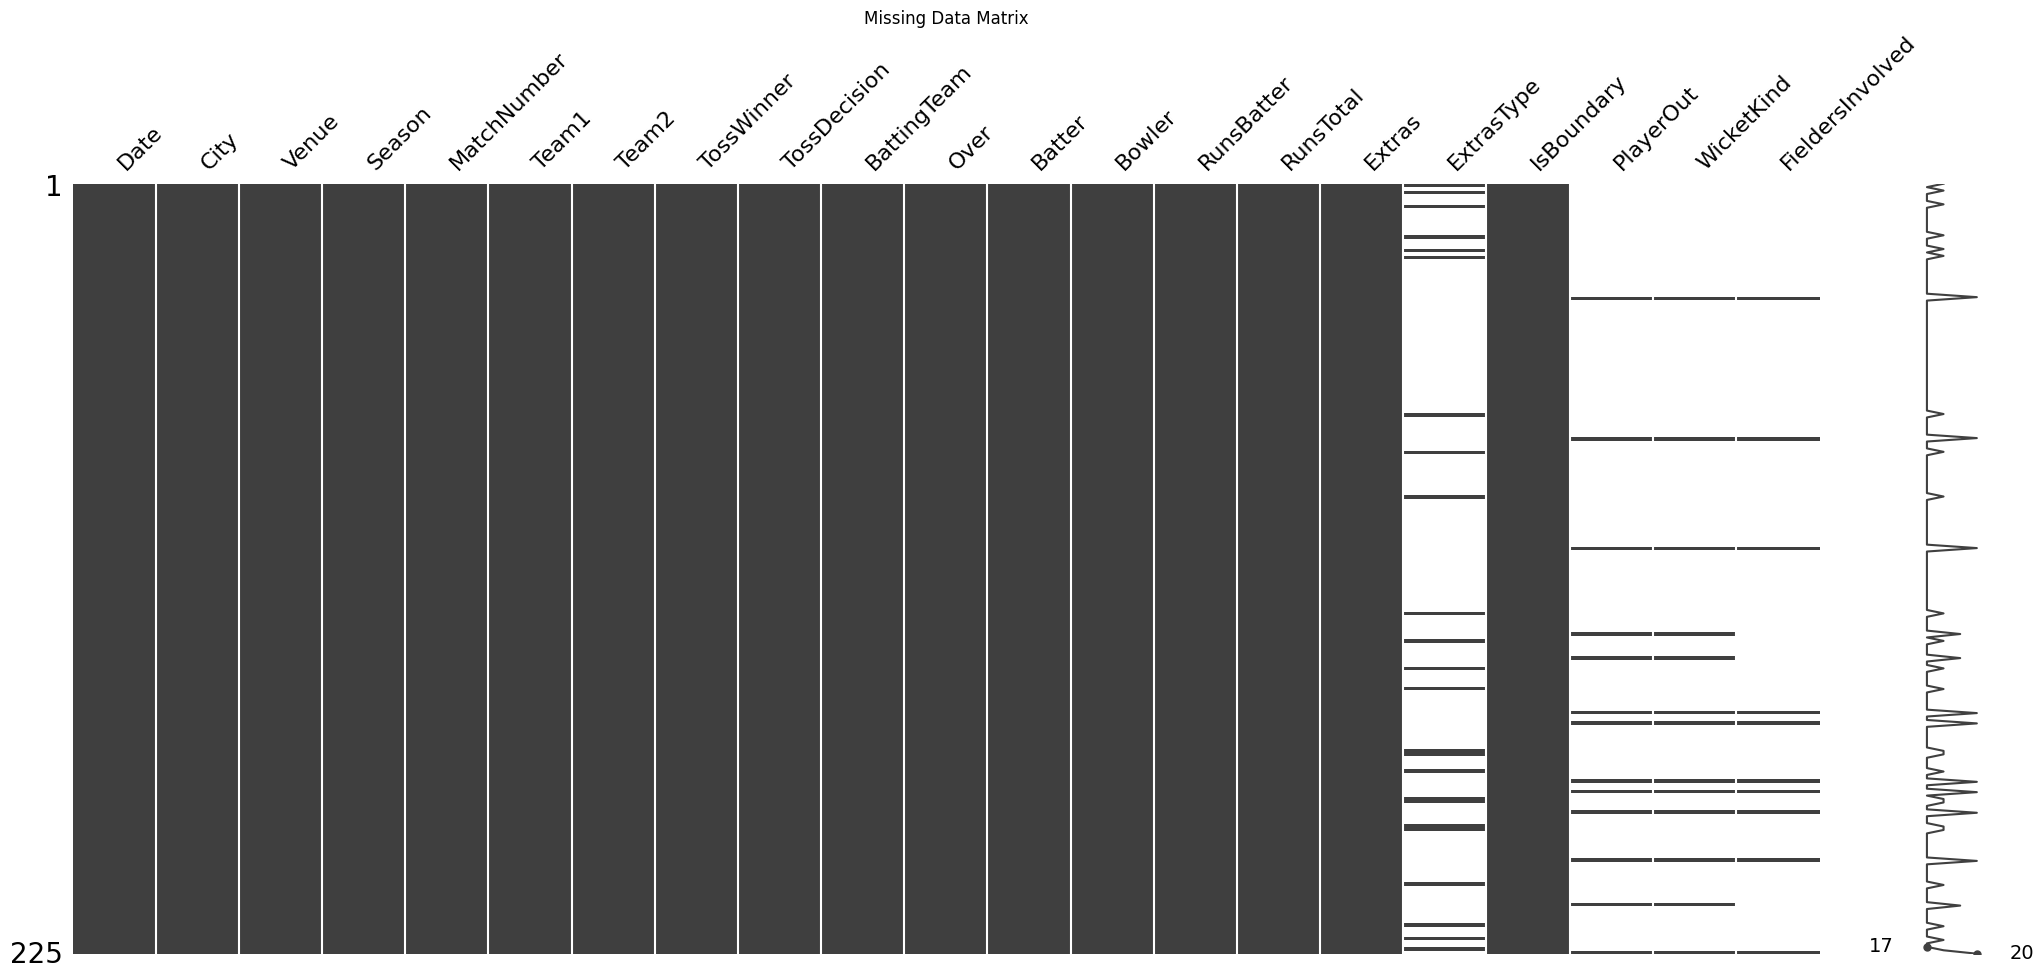

In [24]:
plt.figure(figsize=(10, 6))
msno.matrix(data)
plt.title('Missing Data Matrix')
plt.show()

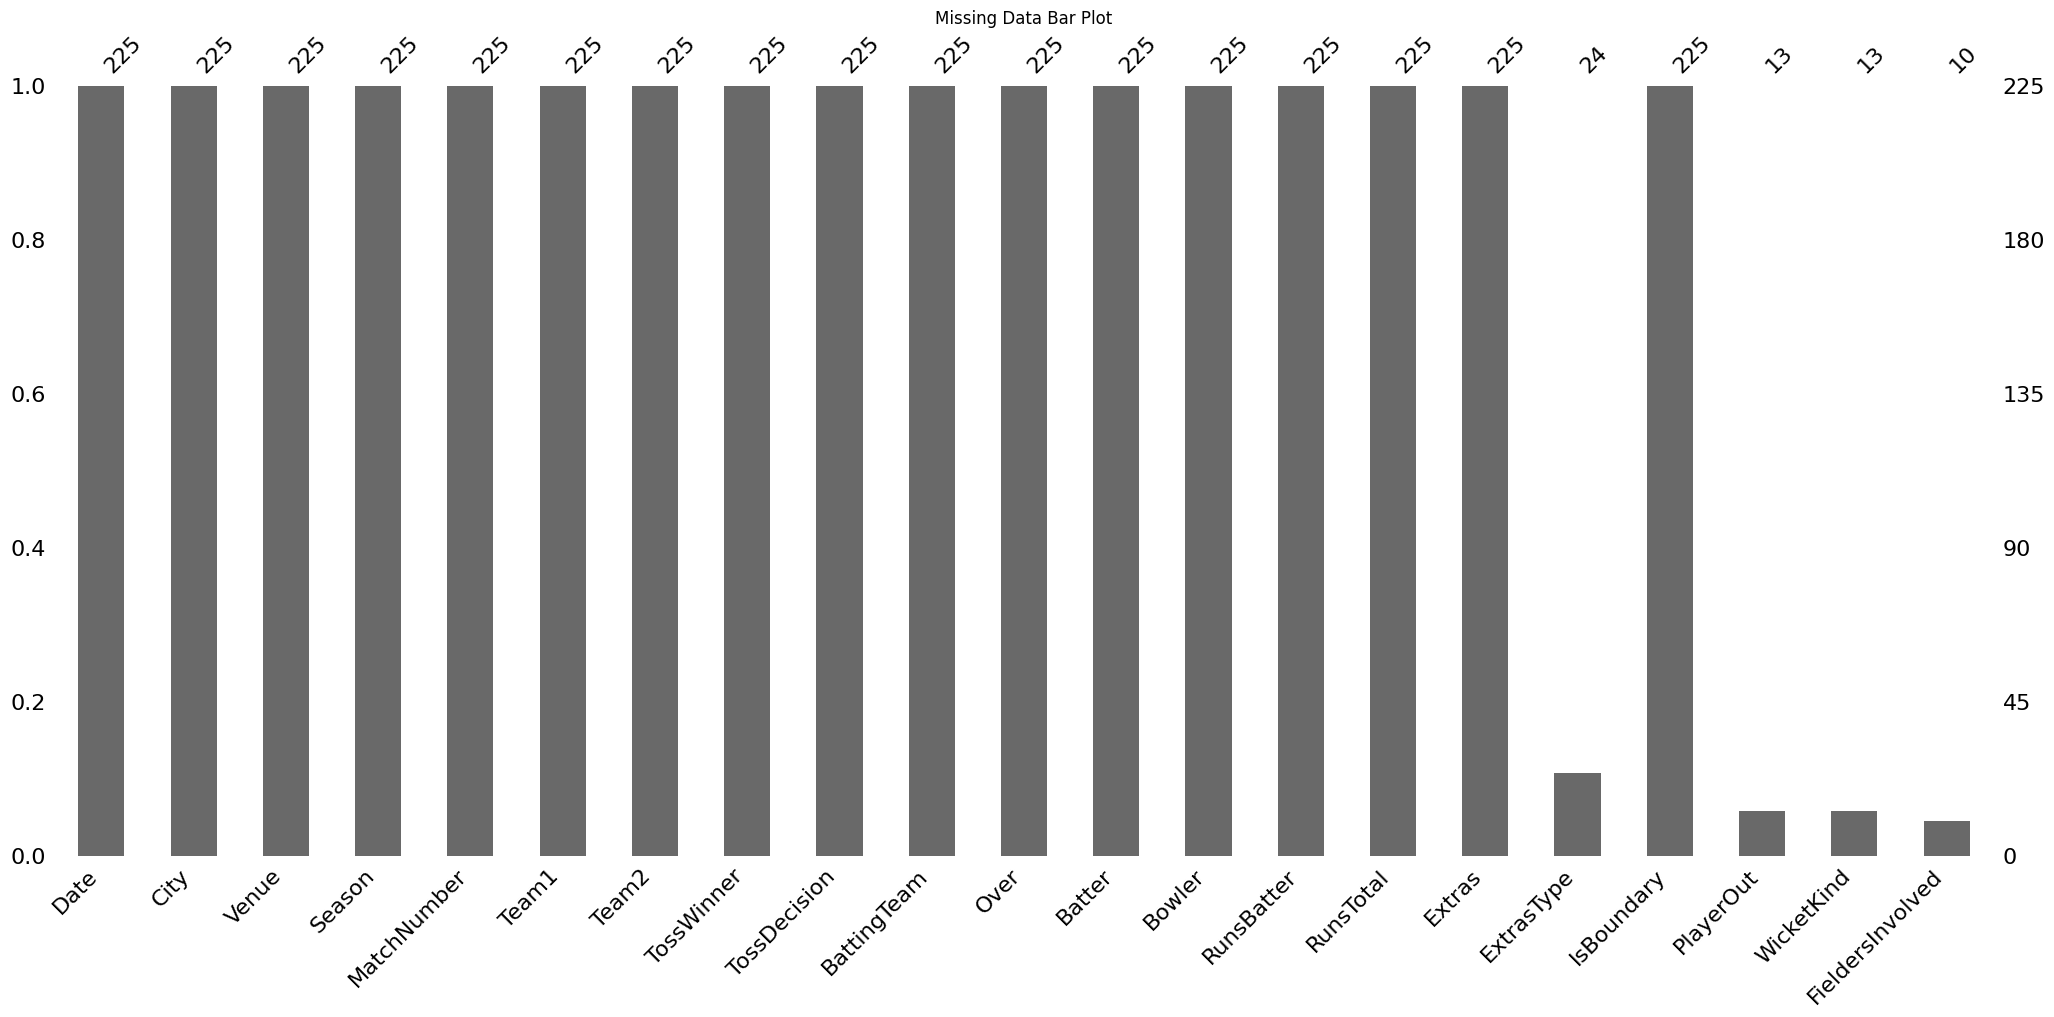

In [25]:
plt.figure(figsize=(10, 6))
msno.bar(data)
plt.title('Missing Data Bar Plot')
plt.show()

<Figure size 500x400 with 0 Axes>

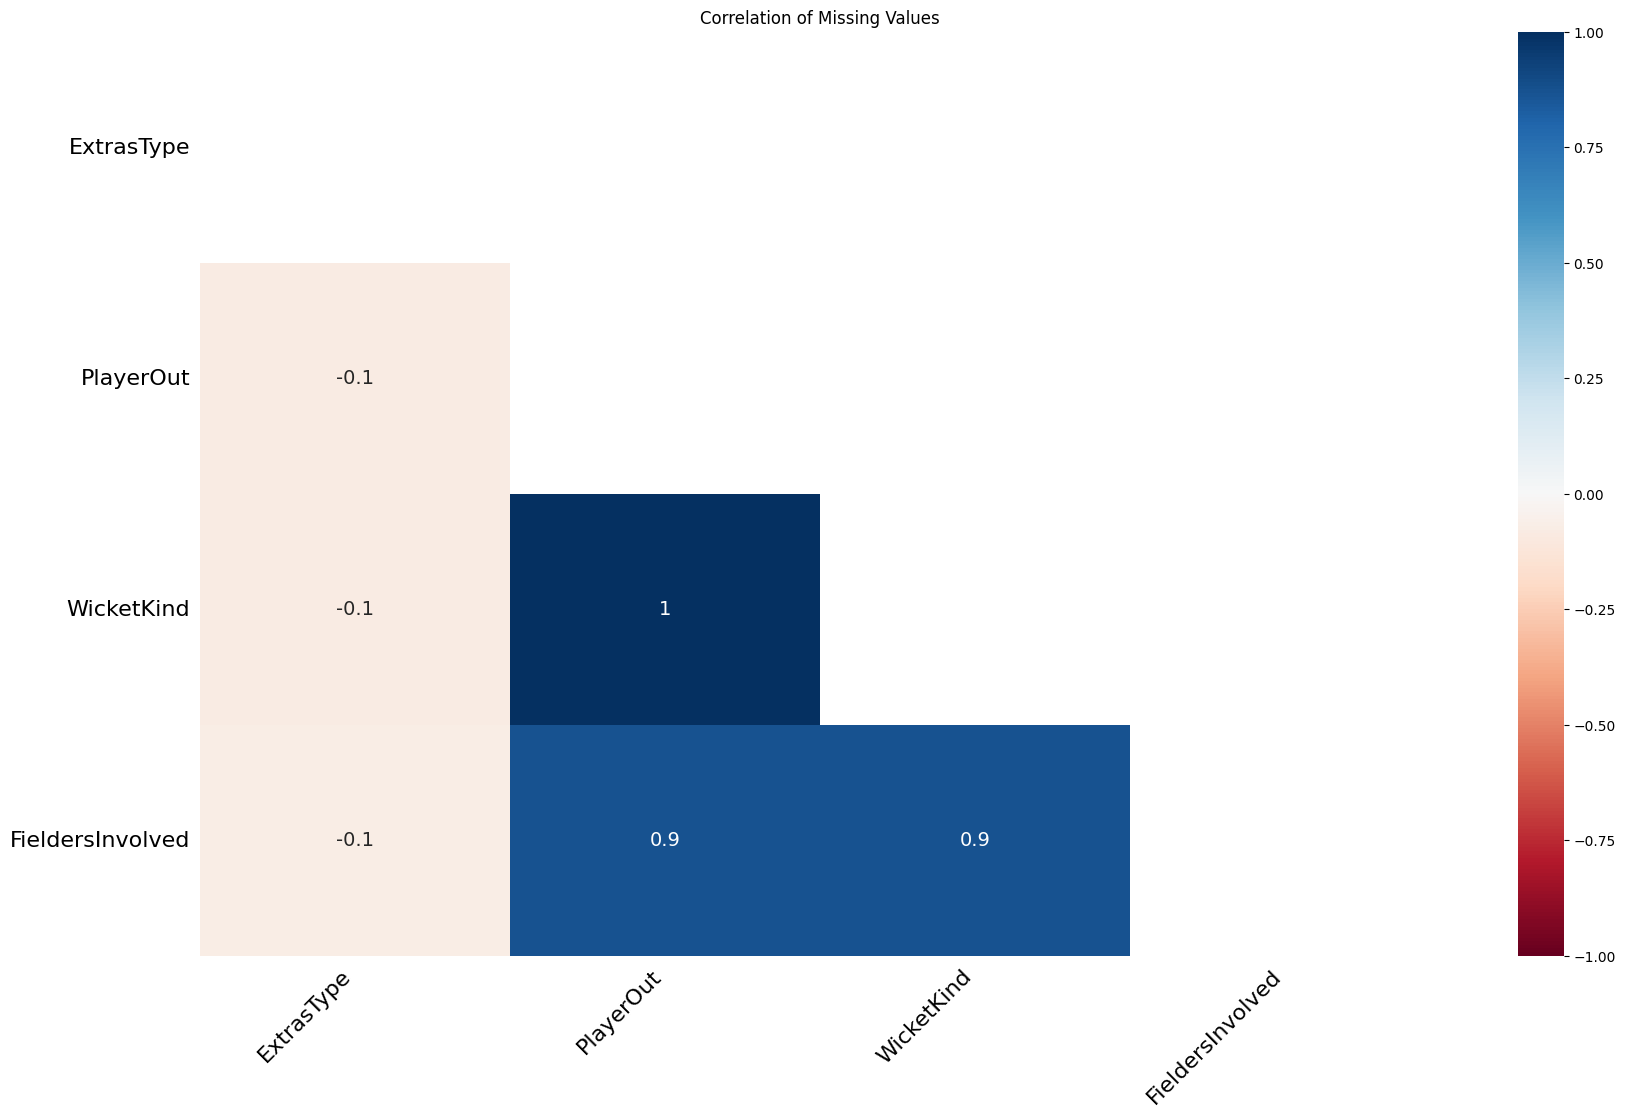

In [26]:
plt.figure(figsize=(5, 4))
msno.heatmap(data)
plt.title('Correlation of Missing Values')
plt.show()

<Figure size 1000x600 with 0 Axes>

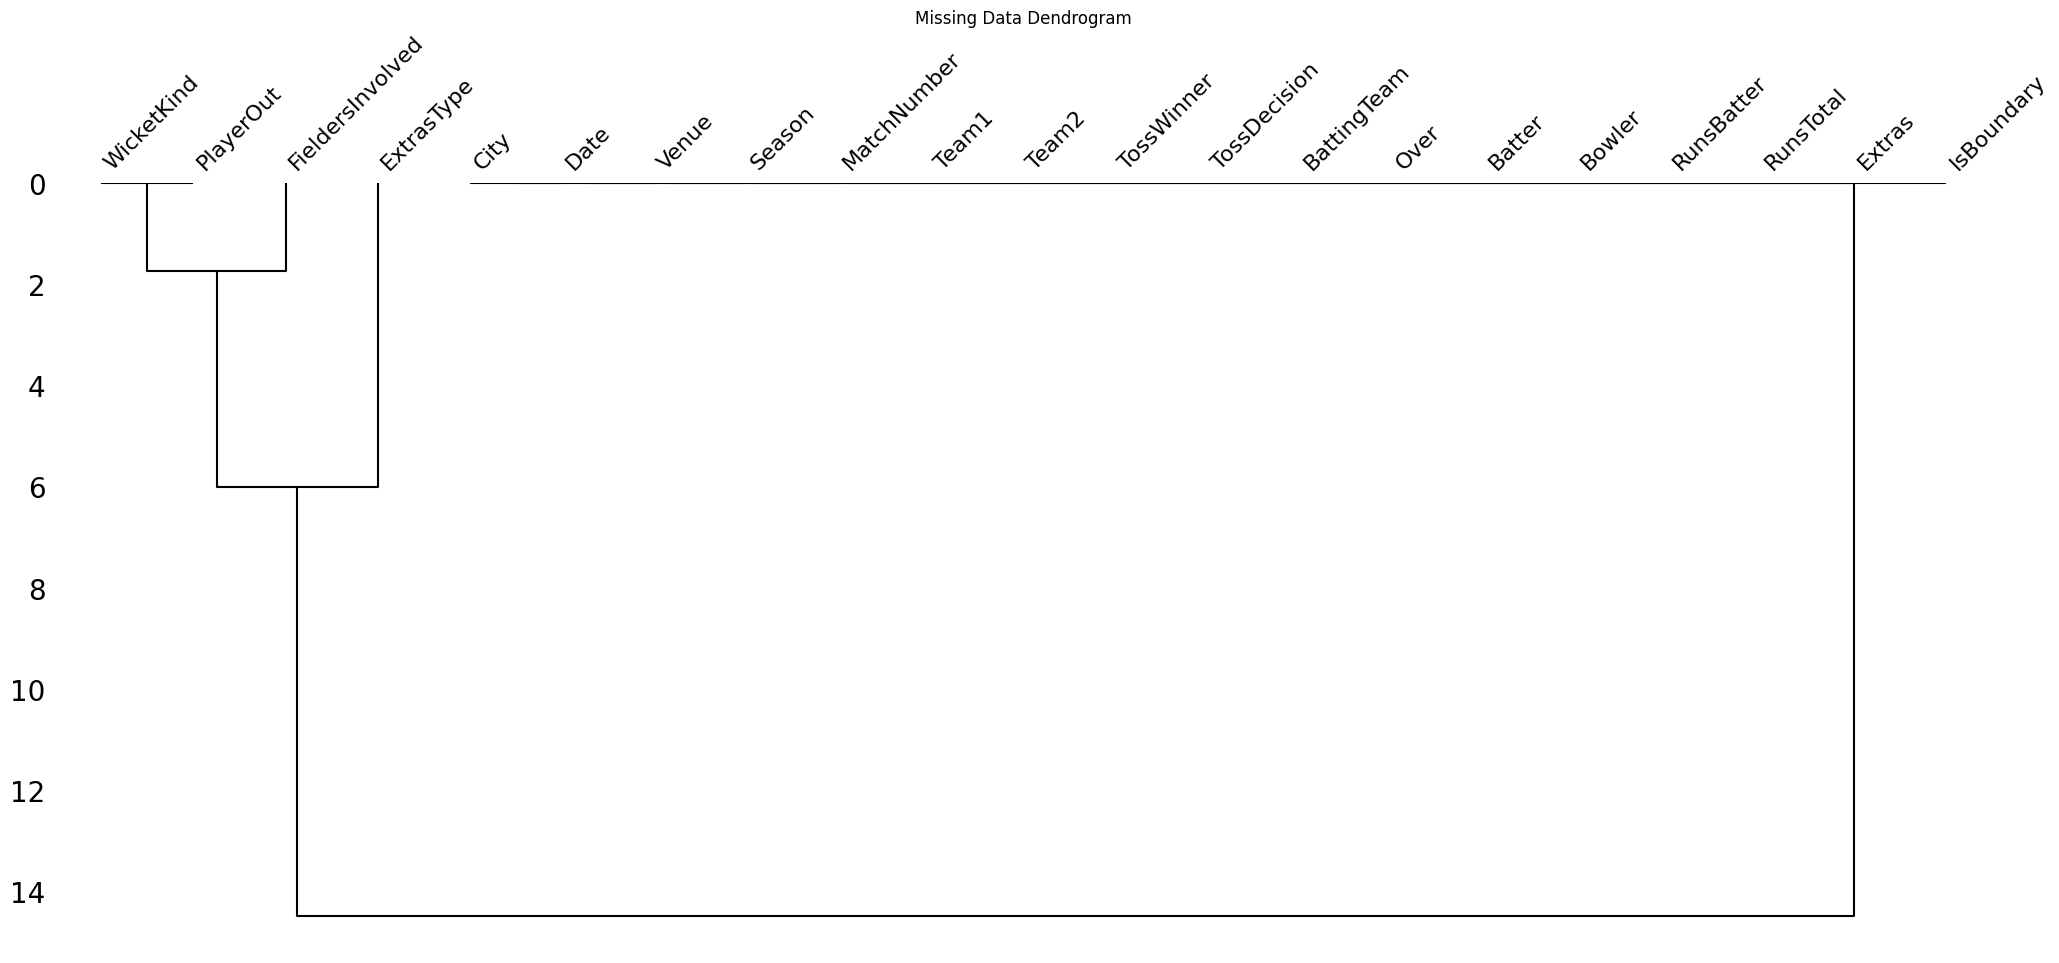

In [27]:
plt.figure(figsize=(10, 6))
msno.dendrogram(data)
plt.title('Missing Data Dendrogram')
plt.show()

In [28]:
data.head(3)

Date       City                  Venue   Season  MatchNumber  \
0  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
1  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
2  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   

                         Team1                  Team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   

                    TossWinner TossDecision            BattingTeam  ...  \
0  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
1  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
2  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   

        Batter   Bowler RunsBatter  RunsTotal  Extras  ExtrasType IsBoundary  \
0   SC Ganguly  P Kumar          0          1       1     legbyes      False   
1  BB McCullum  P Kumar          0          0       0         NaN      False   
2  BB McCullum  P Kumar          0          1       1       wides      False   

   PlayerOut WicketKind FieldersInvolved  
0        NaN        NaN              NaN  
1        NaN        NaN              NaN  
2        NaN        NaN              NaN  

[3 rows x 21 columns]

In [29]:
(data.isnull().sum()/len(data))*100

Date                 0.000000
City                 0.000000
Venue                0.000000
Season               0.000000
MatchNumber          0.000000
Team1                0.000000
Team2                0.000000
TossWinner           0.000000
TossDecision         0.000000
BattingTeam          0.000000
Over                 0.000000
Batter               0.000000
Bowler               0.000000
RunsBatter           0.000000
RunsTotal            0.000000
Extras               0.000000
ExtrasType          89.333333
IsBoundary           0.000000
PlayerOut           94.222222
WicketKind          94.222222
FieldersInvolved    95.555556
dtype: float64

In [30]:
data["FieldersInvolved"].fillna("No Fielders", inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\39775251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["FieldersInvolved"].fillna("No Fielders", inplace=True)


In [31]:
data["PlayerOut"].fillna("Not Out", inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\987424436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PlayerOut"].fillna("Not Out", inplace=True)


In [32]:
data["PlayerOut"].unique()

array(['Not Out', 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi'], dtype=object)

In [33]:
data["FieldersInvolved"].unique()

array(['No Fielders', 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik',
       'RT Ponting', 'WP Saha', 'AB Agarkar, WP Saha', 'BB McCullum'],
      dtype=object)

In [34]:
data["ExtrasType"].unique()

array(['legbyes', nan, 'wides', 'byes'], dtype=object)

In [35]:
data["ExtrasType"].fillna("No Extras", inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3939617564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ExtrasType"].fillna("No Extras", inplace=True)


In [36]:
data["WicketKind"].unique()

array([nan, 'caught', 'bowled', 'run out'], dtype=object)

In [37]:
data["WicketKind"]  = data["WicketKind"].fillna("No Wicket")

In [38]:
data.isnull().sum()

Date                0
City                0
Venue               0
Season              0
MatchNumber         0
Team1               0
Team2               0
TossWinner          0
TossDecision        0
BattingTeam         0
Over                0
Batter              0
Bowler              0
RunsBatter          0
RunsTotal           0
Extras              0
ExtrasType          0
IsBoundary          0
PlayerOut           0
WicketKind          0
FieldersInvolved    0
dtype: int64

### Duplicate Data Analysis

In [39]:
data.duplicated().sum()

58

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
data.duplicated().sum()

0

In [42]:
data.shape

(167, 21)

### Droping Constant Features


In [43]:
data.head(5)

Date       City                  Venue   Season  MatchNumber  \
0  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
1  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
2  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
6  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   
7  2008-04-18  Bangalore  M Chinnaswamy Stadium  2007/08            1   

                         Team1                  Team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
6  Royal Challengers Bangalore  Kolkata Knight Riders   
7  Royal Challengers Bangalore  Kolkata Knight Riders   

                    TossWinner TossDecision            BattingTeam  ...  \
0  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
1  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
2  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
6  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   
7  Royal Challengers Bangalore        field  Kolkata Knight Riders  ...   

        Batter   Bowler RunsBatter  RunsTotal  Extras  ExtrasType IsBoundary  \
0   SC Ganguly  P Kumar          0          1       1     legbyes      False   
1  BB McCullum  P Kumar          0          0       0   No Extras      False   
2  BB McCullum  P Kumar          0          1       1       wides      False   
6  BB McCullum  P Kumar          0          1       1     legbyes      False   
7  BB McCullum   Z Khan          0          0       0   No Extras      False   

   PlayerOut WicketKind FieldersInvolved  
0    Not Out  No Wicket      No Fielders  
1    Not Out  No Wicket      No Fielders  
2    Not Out  No Wicket      No Fielders  
6    Not Out  No Wicket      No Fielders  
7    Not Out  No Wicket      No Fielders  

[5 rows x 21 columns]

In [44]:
constant_columns = []

for i in data.columns :
  print(i , " : " , len(data[i].unique()))
  if len(data[i].unique()) < 2:
    constant_columns.append(i)

constant_columns

Date  :  1
City  :  1
Venue  :  1
Season  :  1
MatchNumber  :  1
Team1  :  1
Team2  :  1
TossWinner  :  1
TossDecision  :  1
BattingTeam  :  2
Over  :  20
Batter  :  16
Bowler  :  11
RunsBatter  :  5
RunsTotal  :  6
Extras  :  5
ExtrasType  :  4
IsBoundary  :  2
PlayerOut  :  14
WicketKind  :  4
FieldersInvolved  :  9


['Date',
 'City',
 'Venue',
 'Season',
 'MatchNumber',
 'Team1',
 'Team2',
 'TossWinner',
 'TossDecision']

In [45]:
data.drop(constant_columns, axis=1, inplace=True)
data.head(5)

BattingTeam  Over       Batter   Bowler  RunsBatter  RunsTotal  \
0  Kolkata Knight Riders     1   SC Ganguly  P Kumar           0          1   
1  Kolkata Knight Riders     1  BB McCullum  P Kumar           0          0   
2  Kolkata Knight Riders     1  BB McCullum  P Kumar           0          1   
6  Kolkata Knight Riders     1  BB McCullum  P Kumar           0          1   
7  Kolkata Knight Riders     2  BB McCullum   Z Khan           0          0   

   Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  
0       1    legbyes       False   Not Out  No Wicket      No Fielders  
1       0  No Extras       False   Not Out  No Wicket      No Fielders  
2       1      wides       False   Not Out  No Wicket      No Fielders  
6       1    legbyes       False   Not Out  No Wicket      No Fielders  
7       0  No Extras       False   Not Out  No Wicket      No Fielders

In [46]:
data

BattingTeam  Over       Batter     Bowler  RunsBatter  \
0          Kolkata Knight Riders     1   SC Ganguly    P Kumar           0   
1          Kolkata Knight Riders     1  BB McCullum    P Kumar           0   
2          Kolkata Knight Riders     1  BB McCullum    P Kumar           0   
6          Kolkata Knight Riders     1  BB McCullum    P Kumar           0   
7          Kolkata Knight Riders     2  BB McCullum     Z Khan           0   
..                           ...   ...          ...        ...         ...   
219  Royal Challengers Bangalore    15     SB Joshi   I Sharma           1   
220  Royal Challengers Bangalore    15      P Kumar   I Sharma           0   
222  Royal Challengers Bangalore    15      P Kumar   I Sharma           0   
223  Royal Challengers Bangalore    16     SB Joshi  LR Shukla           0   
224  Royal Challengers Bangalore    16     SB Joshi  LR Shukla           0   

     RunsTotal  Extras ExtrasType  IsBoundary PlayerOut WicketKind  \
0            1       1    legbyes       False   Not Out  No Wicket   
1            0       0  No Extras       False   Not Out  No Wicket   
2            1       1      wides       False   Not Out  No Wicket   
6            1       1    legbyes       False   Not Out  No Wicket   
7            0       0  No Extras       False   Not Out  No Wicket   
..         ...     ...        ...         ...       ...        ...   
219          1       0  No Extras       False   Not Out  No Wicket   
220          1       1    legbyes       False   Not Out  No Wicket   
222          0       0  No Extras       False   Not Out  No Wicket   
223          1       1      wides       False   Not Out  No Wicket   
224          0       0  No Extras       False  SB Joshi     caught   

    FieldersInvolved  
0        No Fielders  
1        No Fielders  
2        No Fielders  
6        No Fielders  
7        No Fielders  
..               ...  
219      No Fielders  
220      No Fielders  
222      No Fielders  
223      No Fielders  
224      BB McCullum  

[167 rows x 12 columns]

In [47]:
team_map = {
    "Kolkata Knight Riders" : 0,
    "Royal Challengers Bangalore" : 1,
}

In [48]:
data["BattingTeam"] = data["BattingTeam"].map(team_map)

In [49]:
data

BattingTeam  Over       Batter     Bowler  RunsBatter  RunsTotal  Extras  \
0              0     1   SC Ganguly    P Kumar           0          1       1   
1              0     1  BB McCullum    P Kumar           0          0       0   
2              0     1  BB McCullum    P Kumar           0          1       1   
6              0     1  BB McCullum    P Kumar           0          1       1   
7              0     2  BB McCullum     Z Khan           0          0       0   
..           ...   ...          ...        ...         ...        ...     ...   
219            1    15     SB Joshi   I Sharma           1          1       0   
220            1    15      P Kumar   I Sharma           0          1       1   
222            1    15      P Kumar   I Sharma           0          0       0   
223            1    16     SB Joshi  LR Shukla           0          1       1   
224            1    16     SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  
0      legbyes       False   Not Out  No Wicket      No Fielders  
1    No Extras       False   Not Out  No Wicket      No Fielders  
2        wides       False   Not Out  No Wicket      No Fielders  
6      legbyes       False   Not Out  No Wicket      No Fielders  
7    No Extras       False   Not Out  No Wicket      No Fielders  
..         ...         ...       ...        ...              ...  
219  No Extras       False   Not Out  No Wicket      No Fielders  
220    legbyes       False   Not Out  No Wicket      No Fielders  
222  No Extras       False   Not Out  No Wicket      No Fielders  
223      wides       False   Not Out  No Wicket      No Fielders  
224  No Extras       False  SB Joshi     caught      BB McCullum  

[167 rows x 12 columns]

In [50]:
data["Batter"].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi'], dtype=object)

In [51]:
data["Bowler"].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'SC Ganguly',
       'LR Shukla'], dtype=object)

In [52]:
data["ExtrasType"].unique()

array(['legbyes', 'No Extras', 'wides', 'byes'], dtype=object)

In [53]:
data["IsBoundary"].unique()

array([False,  True])

In [54]:
data["IsBoundary"] = data["IsBoundary"].map({True : 1 , False : 0})
data["IsBoundary"].unique()

array([0, 1], dtype=int64)

In [55]:
data["PlayerOut"].unique()

array(['Not Out', 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi'], dtype=object)

In [56]:
data["WicketKind"].unique()

array(['No Wicket', 'caught', 'bowled', 'run out'], dtype=object)

In [57]:
data["FieldersInvolved"].unique()

array(['No Fielders', 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik',
       'RT Ponting', 'WP Saha', 'AB Agarkar, WP Saha', 'BB McCullum'],
      dtype=object)

In [58]:
numerical_columns = [i for i in data.columns if data[i].dtype != "O"]
categorical_columns = [i for i in data.columns if data[i].dtype == "O"]

### Univariant Bivariant Multivariant Analysis

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3825865069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x=column, palette="viridis")


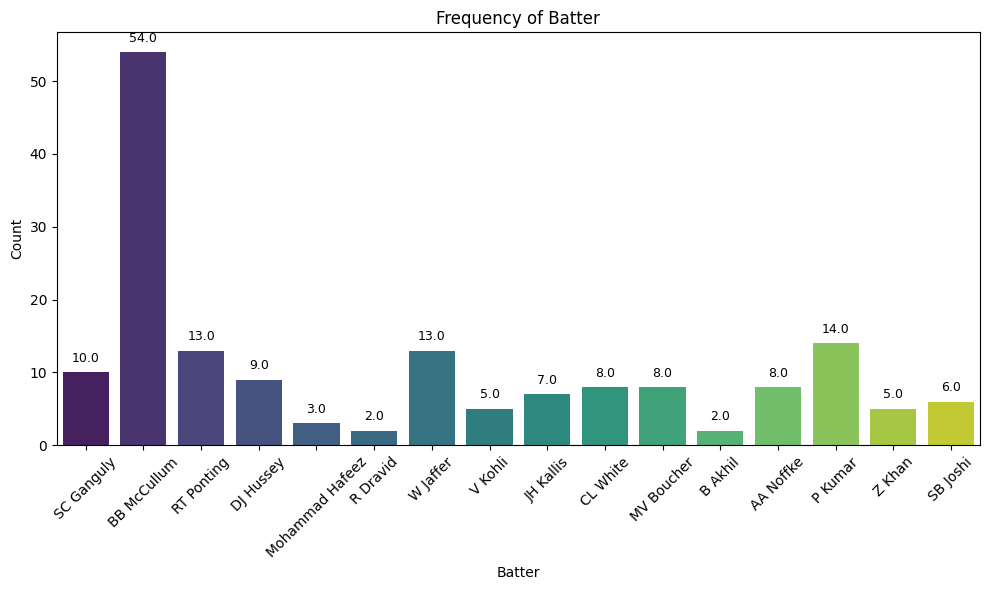

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3825865069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x=column, palette="viridis")


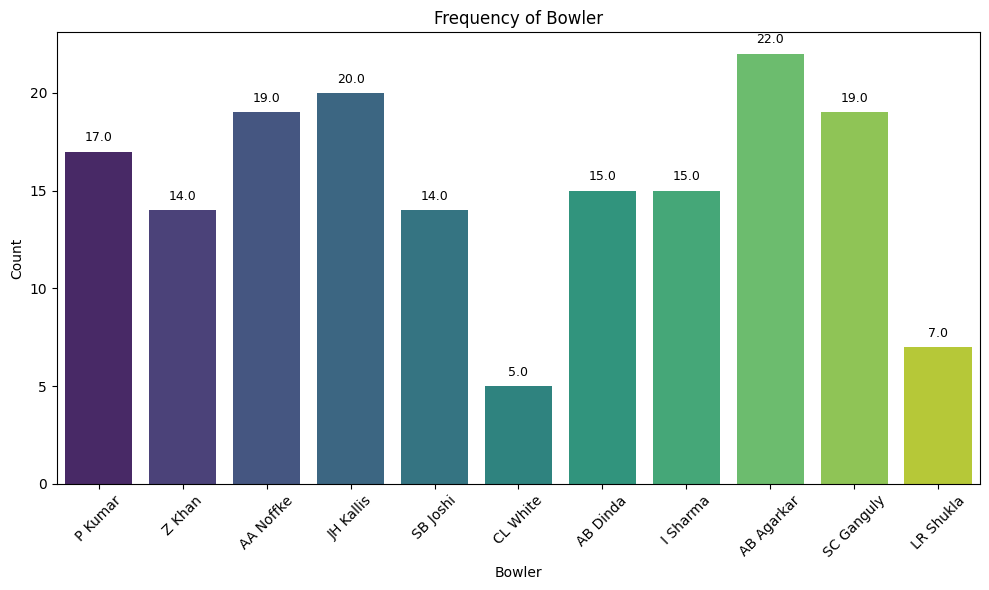

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3825865069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x=column, palette="viridis")


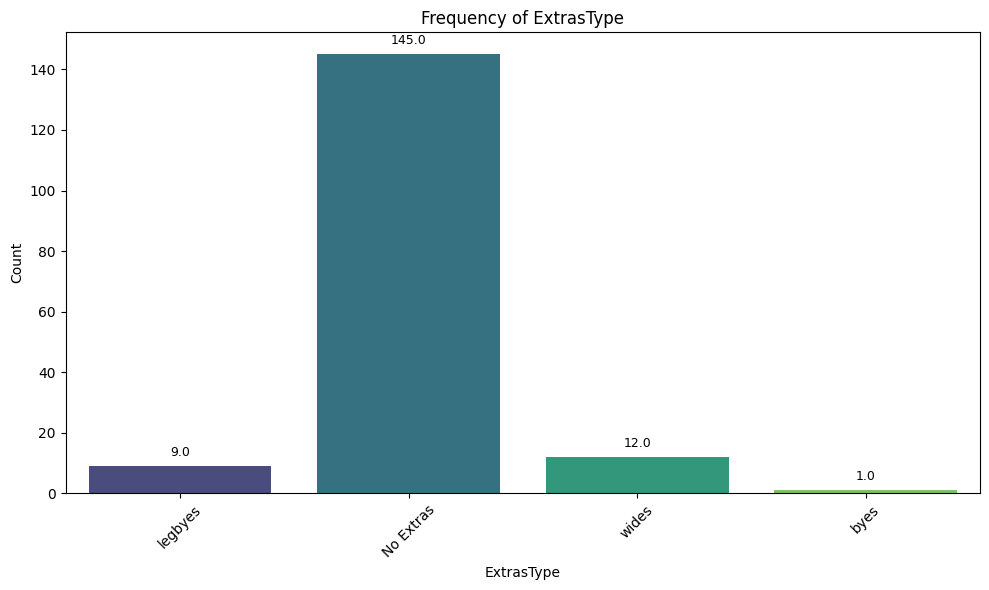

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3825865069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x=column, palette="viridis")


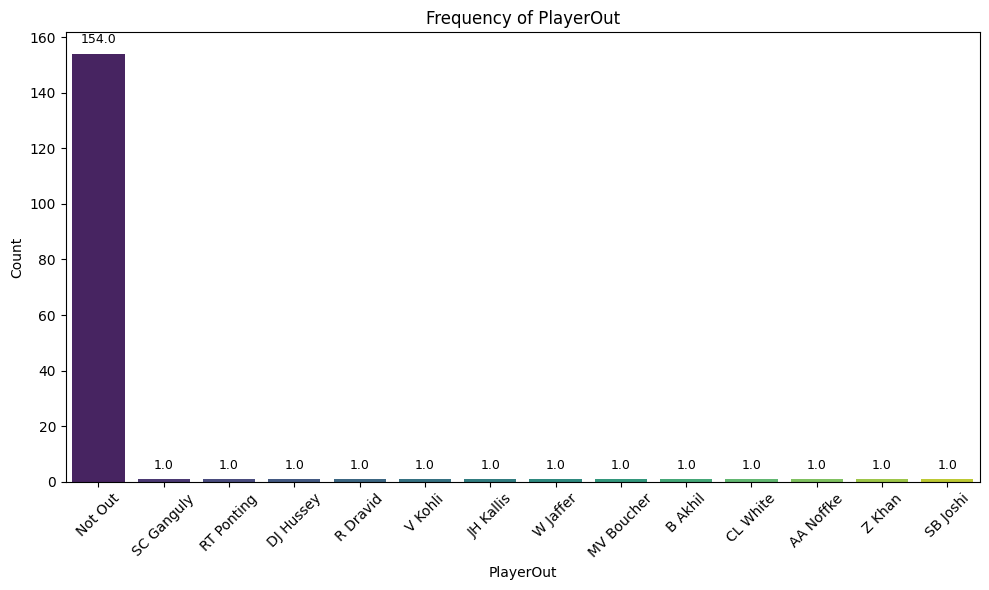

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3825865069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x=column, palette="viridis")


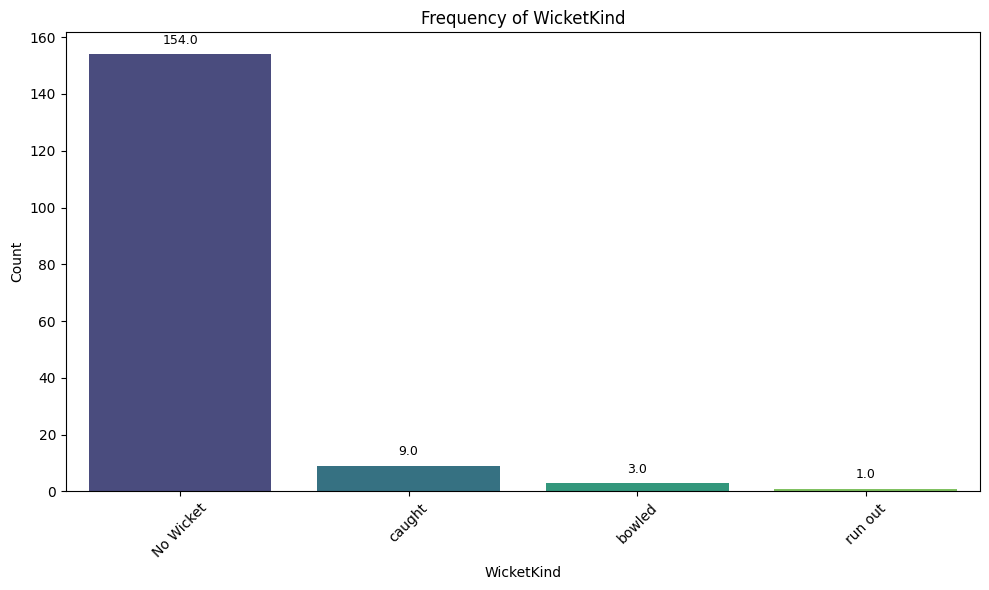

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3825865069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x=column, palette="viridis")


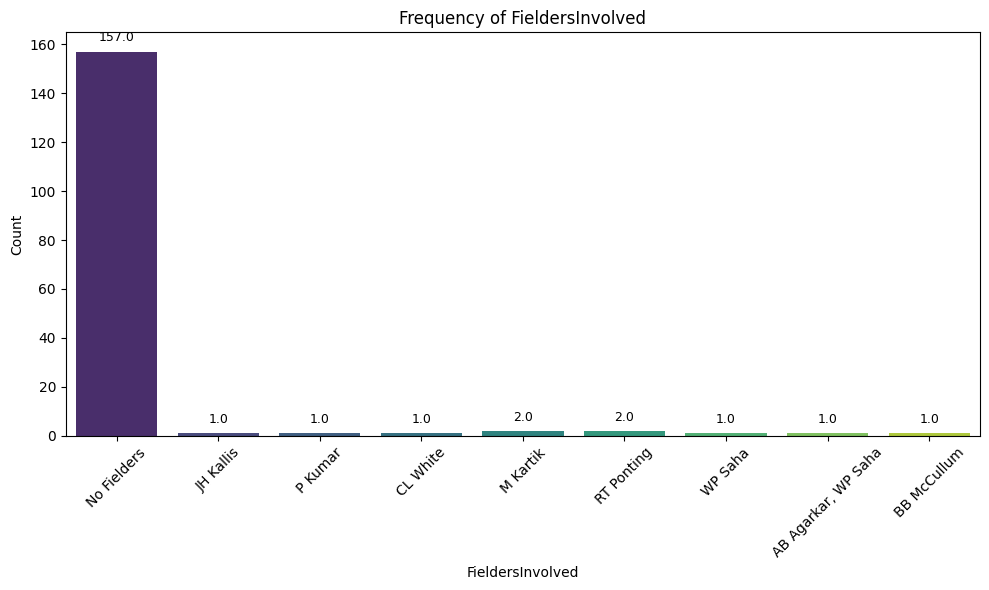

In [59]:
for column in categorical_columns:

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data, x=column, palette="viridis")
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add total counts on top of the bars
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center',
                    fontsize=9, color='black',
                    xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()


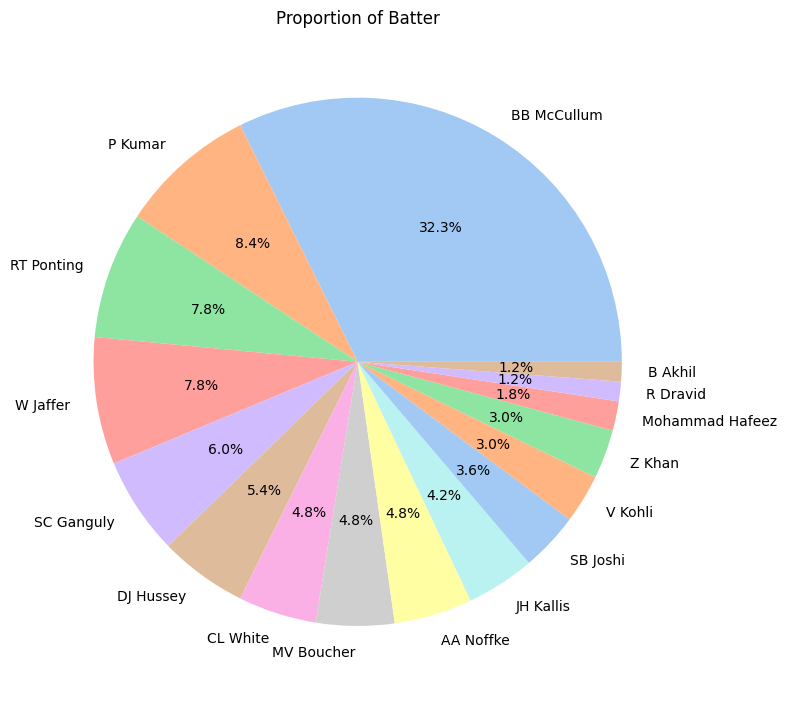

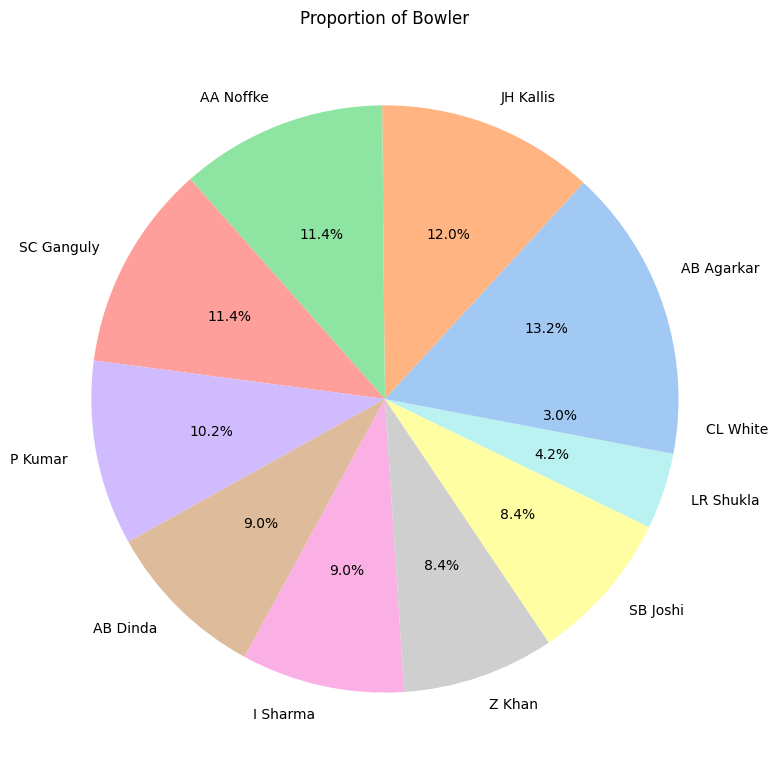

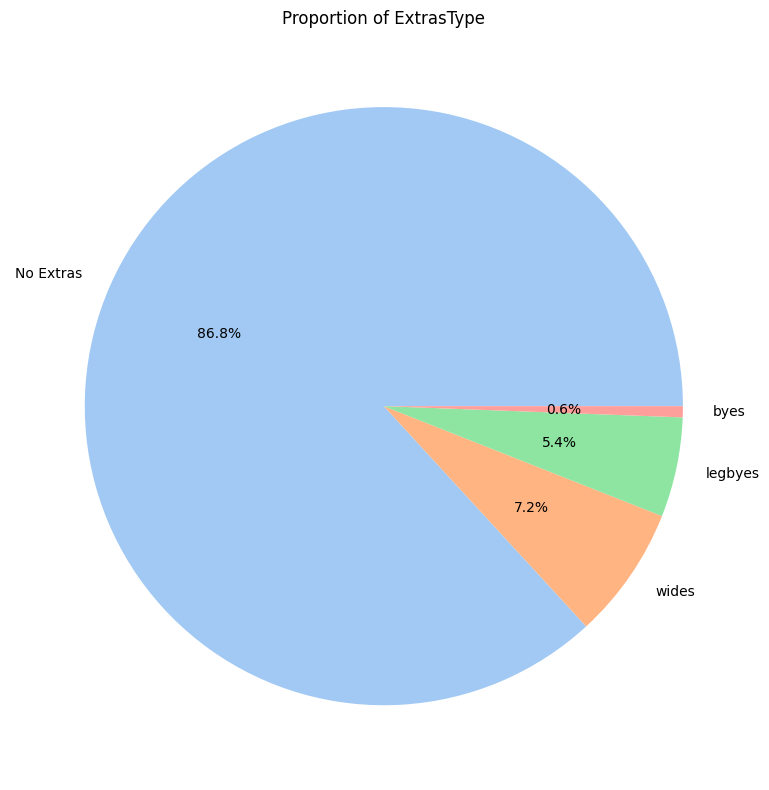

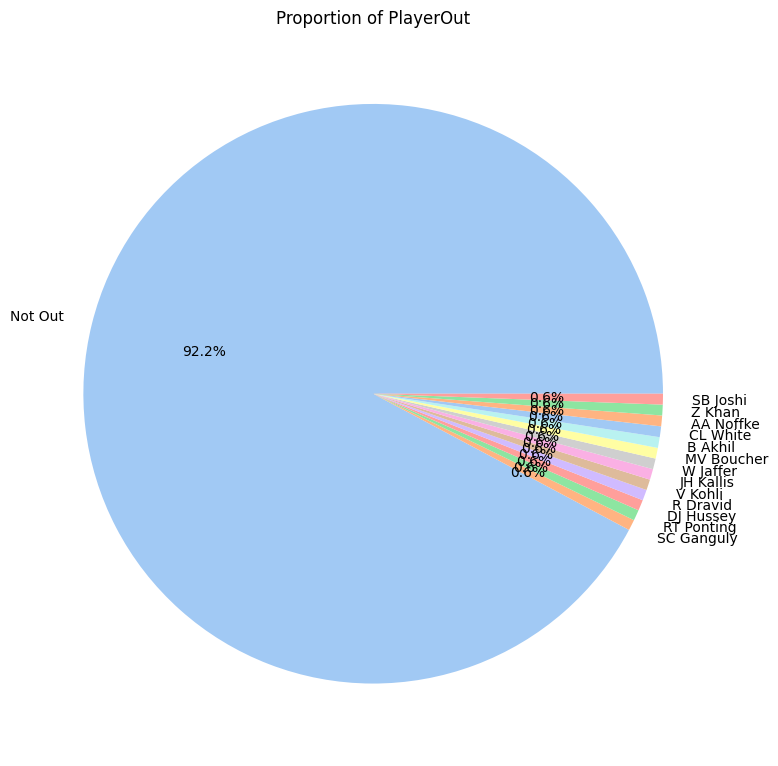

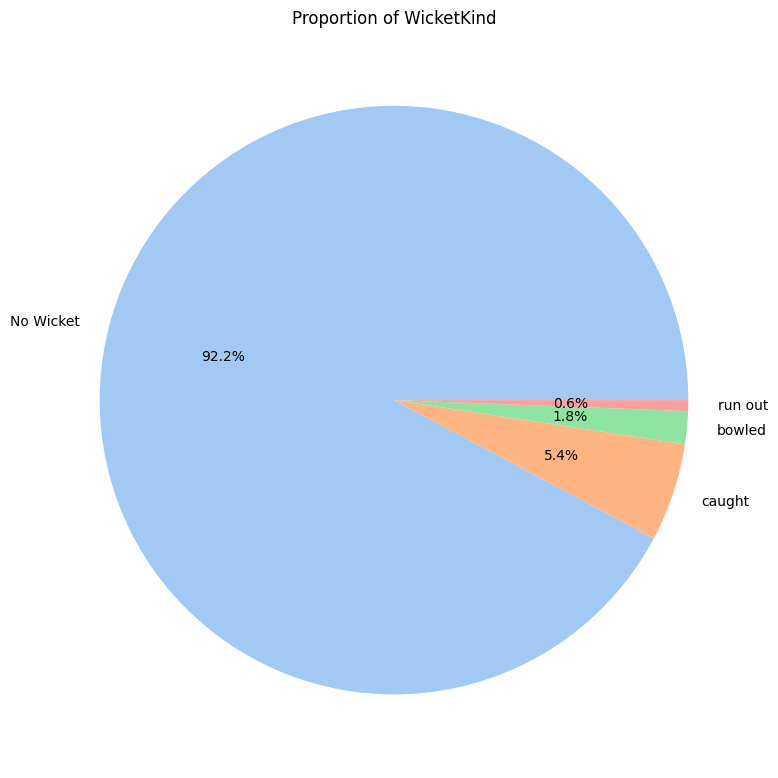

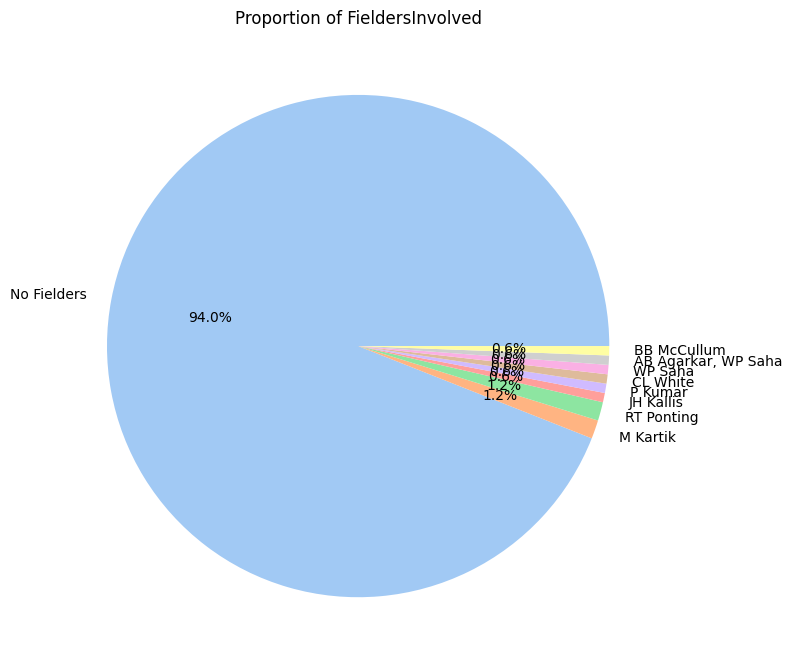

In [60]:
for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Proportion of {column}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


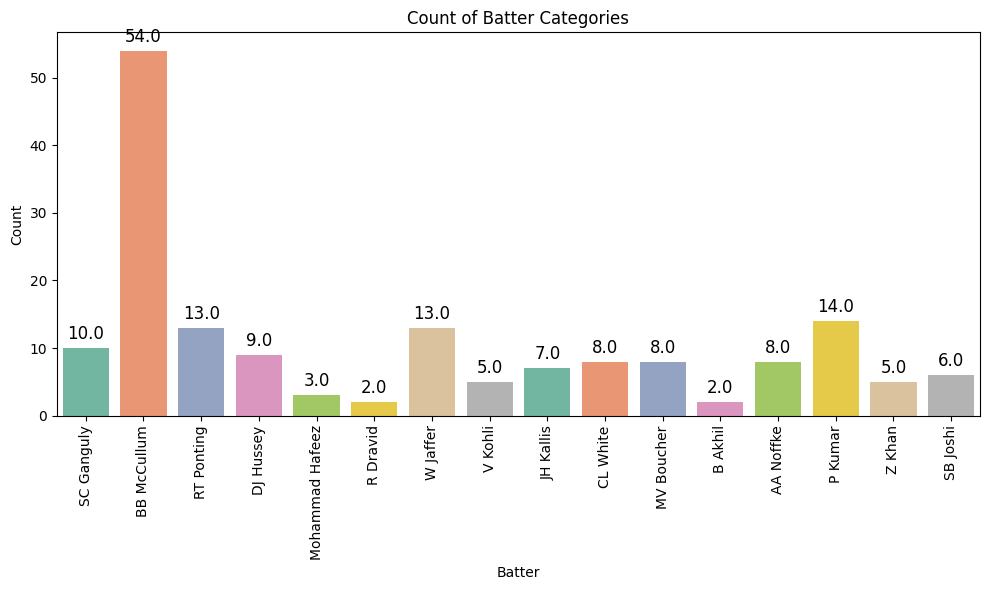

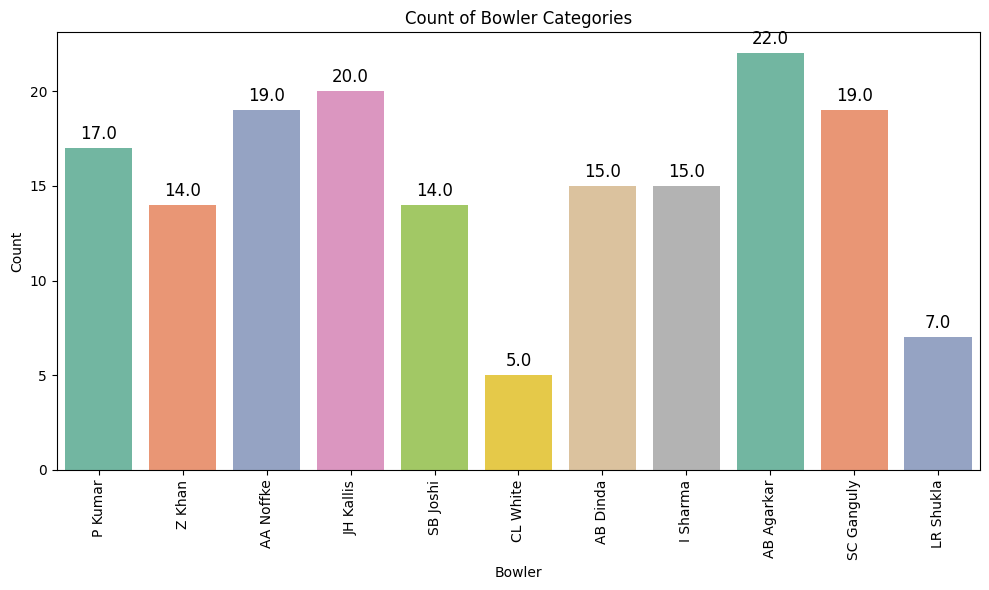

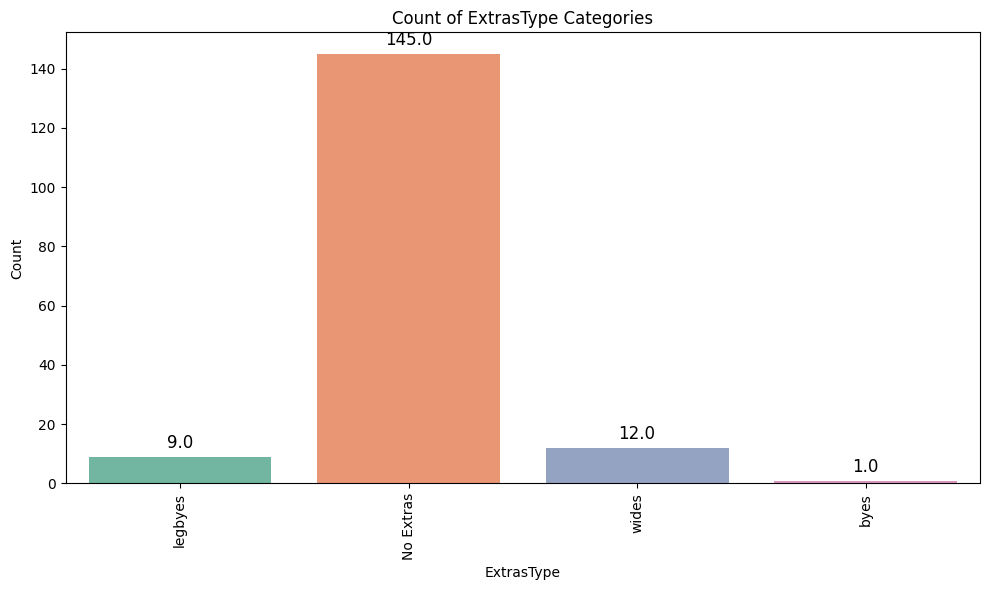

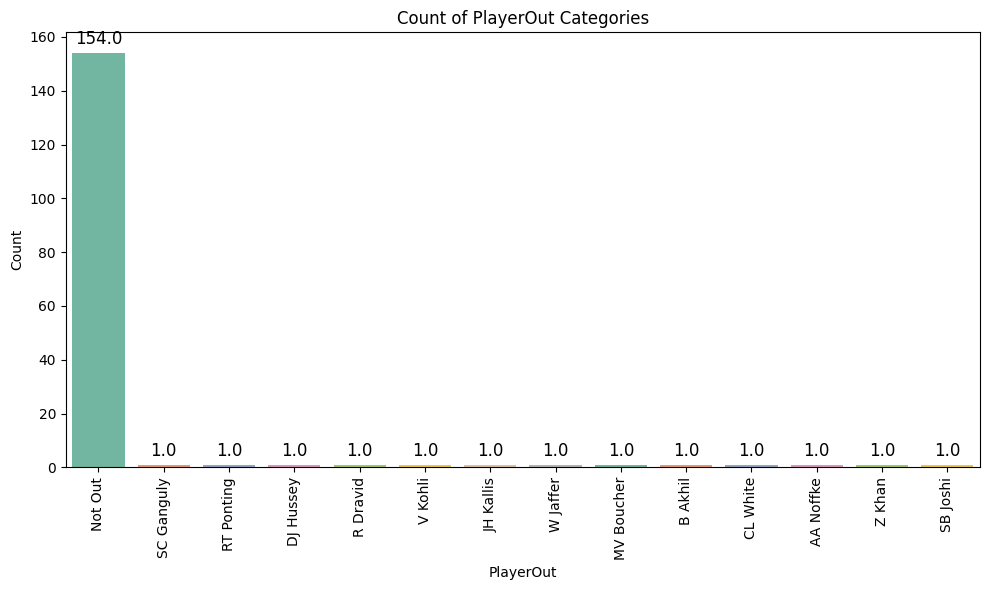

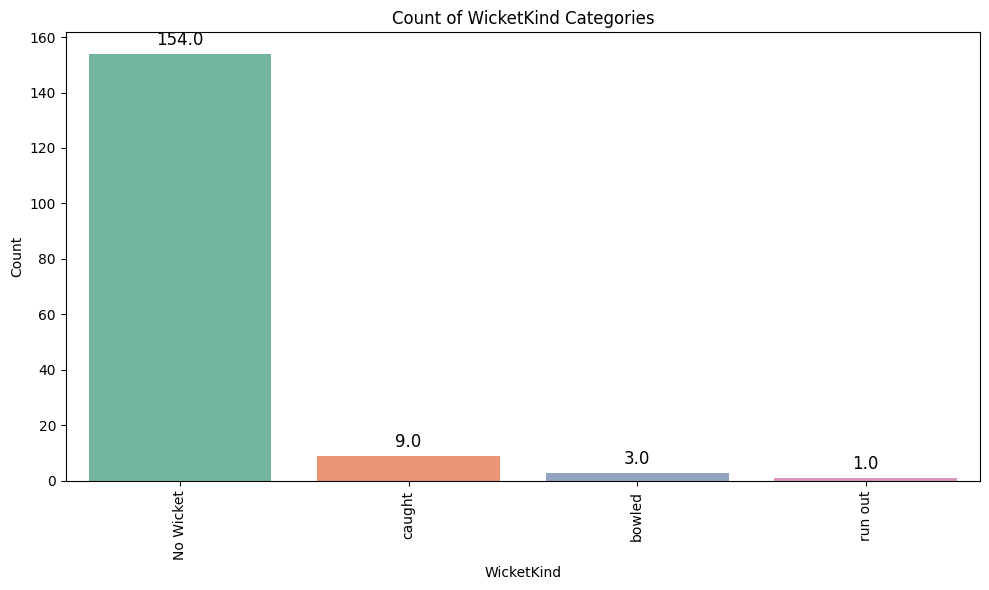

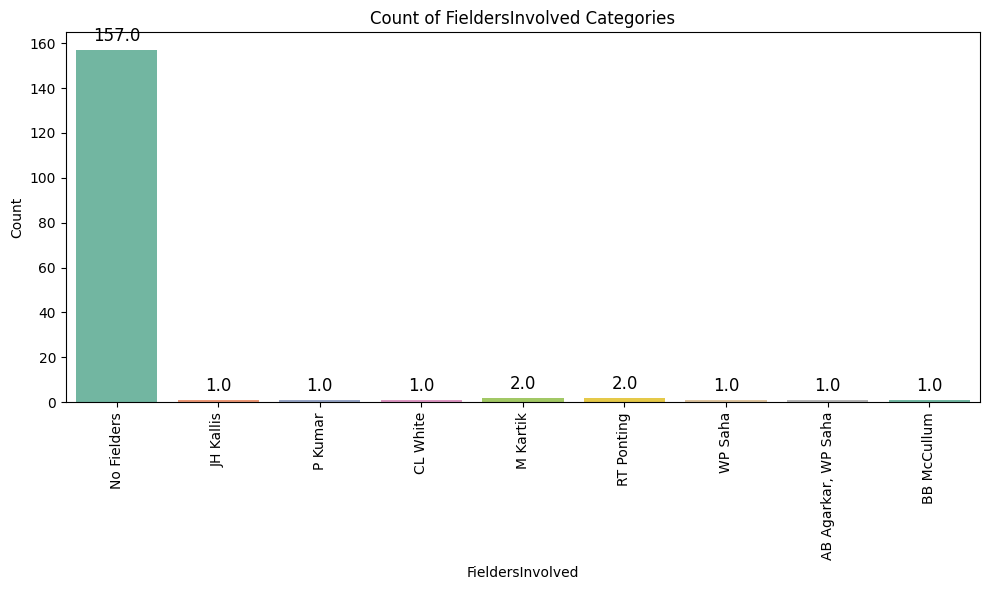

In [61]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data, x=column, hue=column, palette="Set2")
    plt.title(f'Count of {column} Categories')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # Add total counts on top of the bars
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 10), textcoords='offset points')
    plt.tight_layout()
    plt.show()

In [62]:
numerical_columns

['BattingTeam', 'Over', 'RunsBatter', 'RunsTotal', 'Extras', 'IsBoundary']

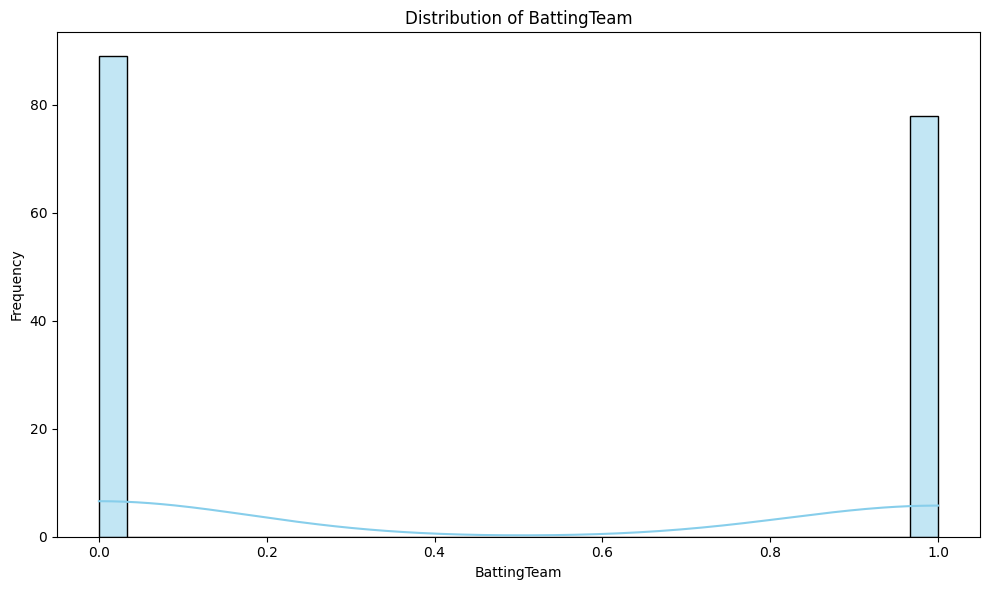

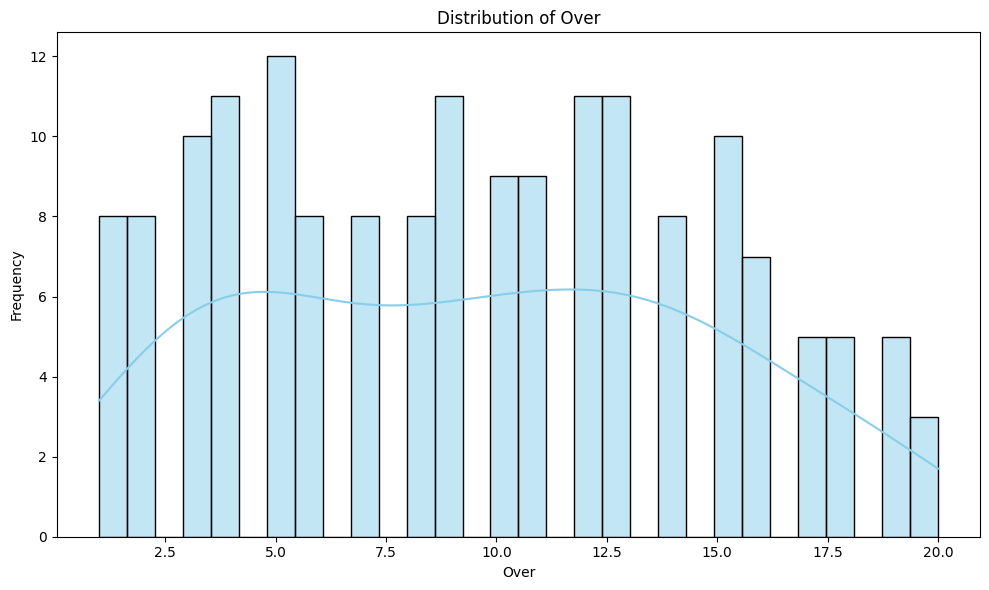

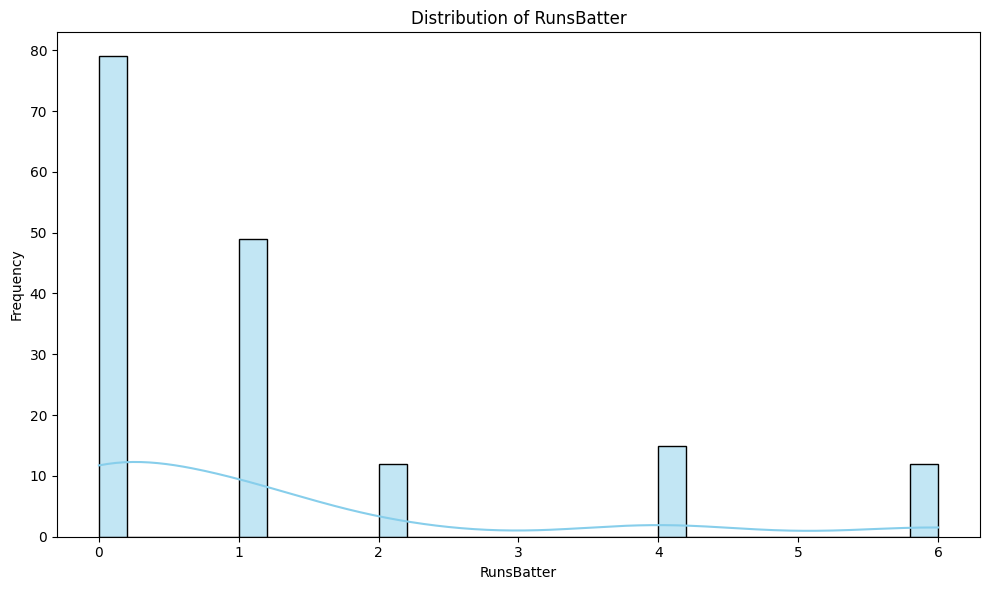

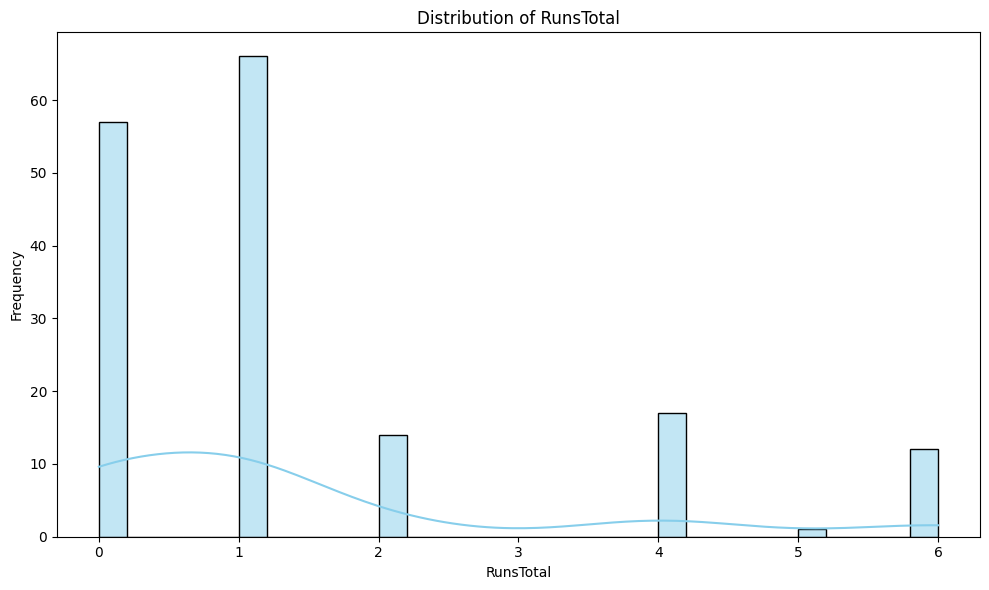

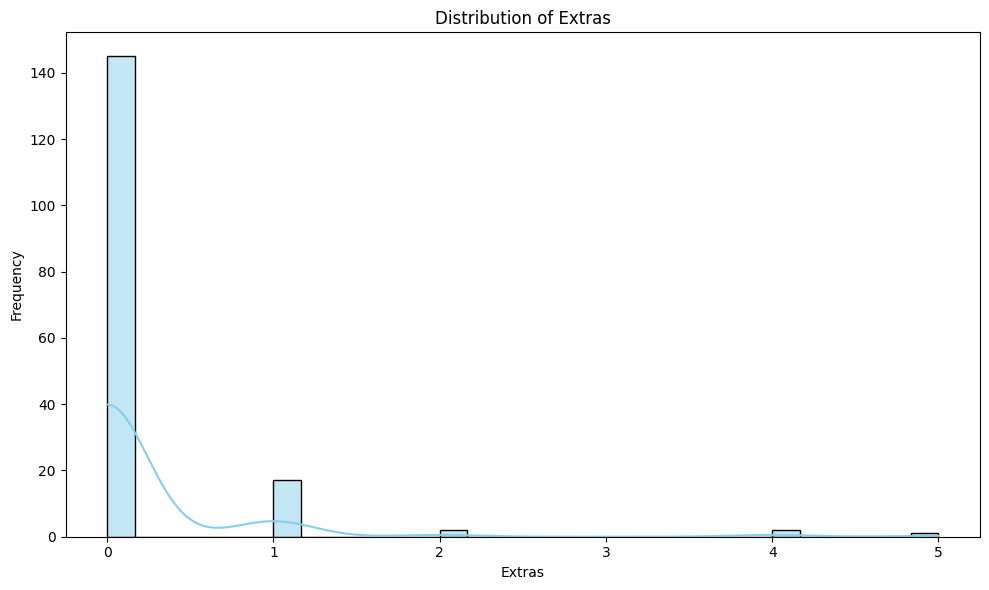

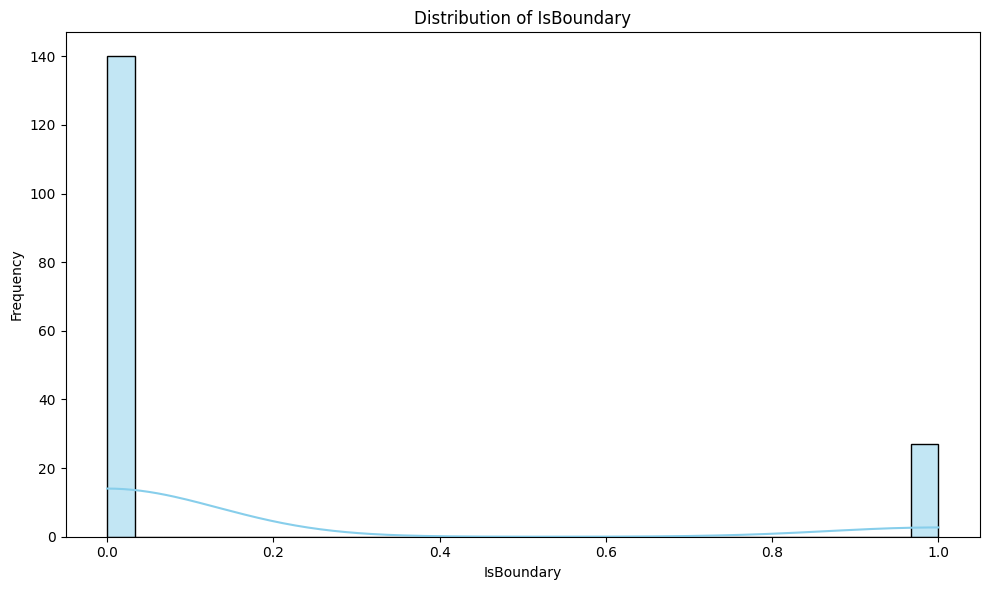

In [63]:
for column in numerical_columns:

    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

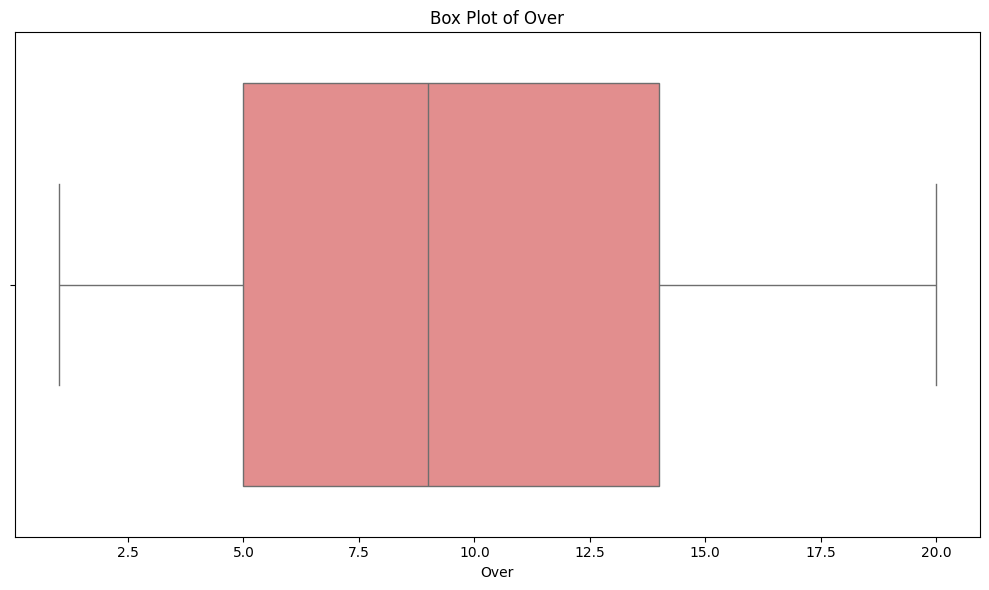

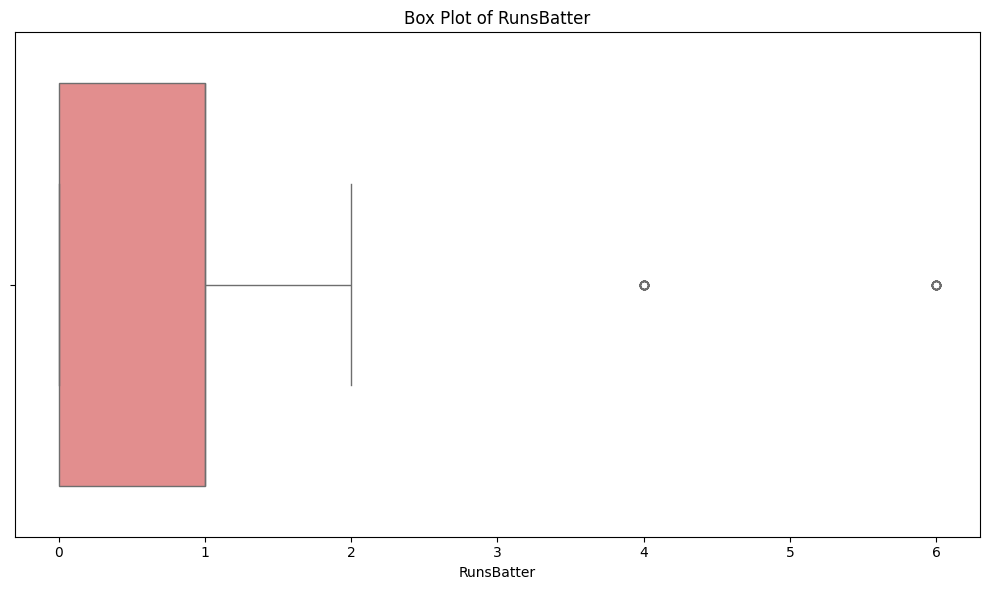

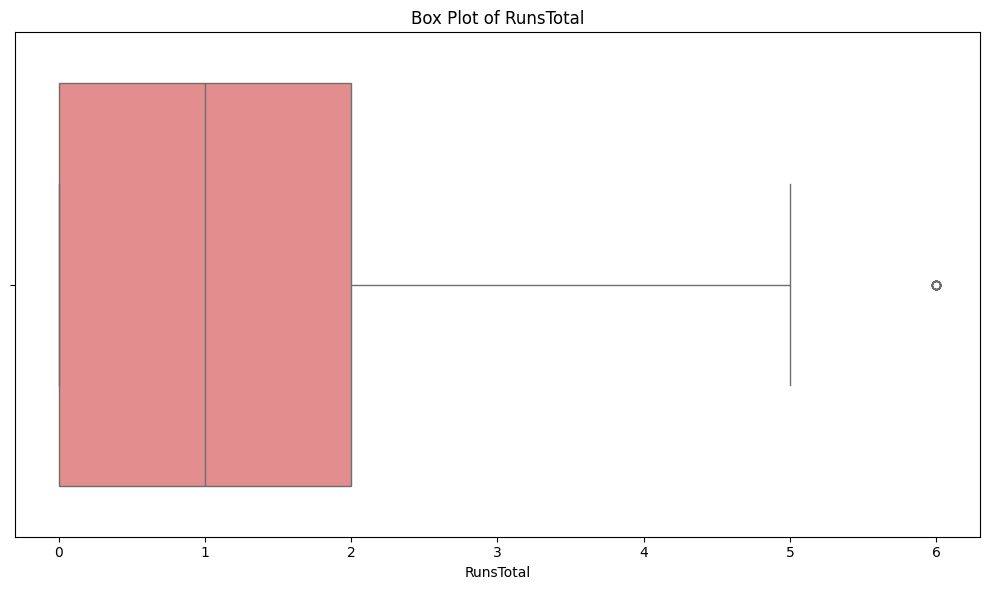

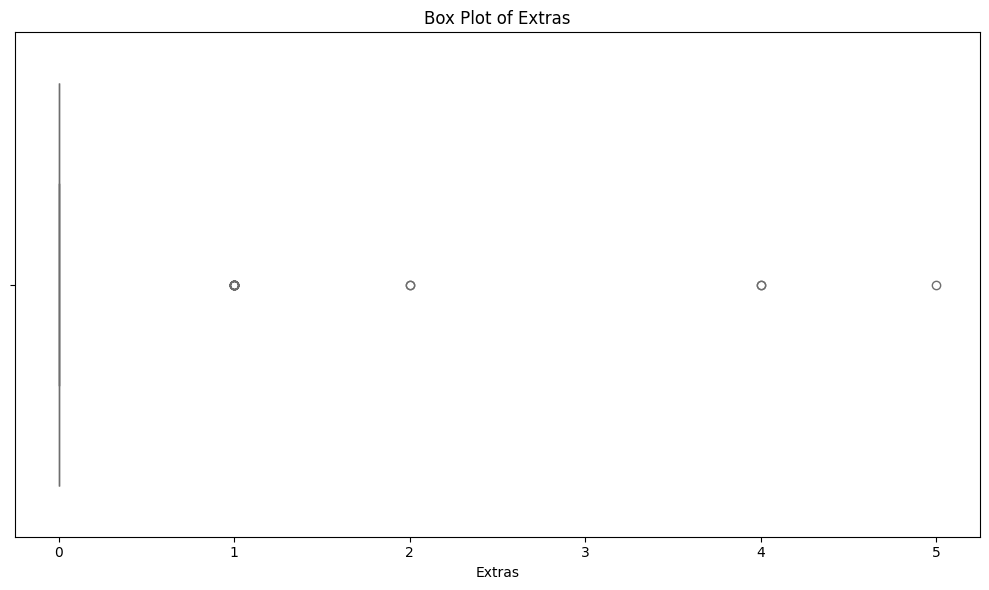

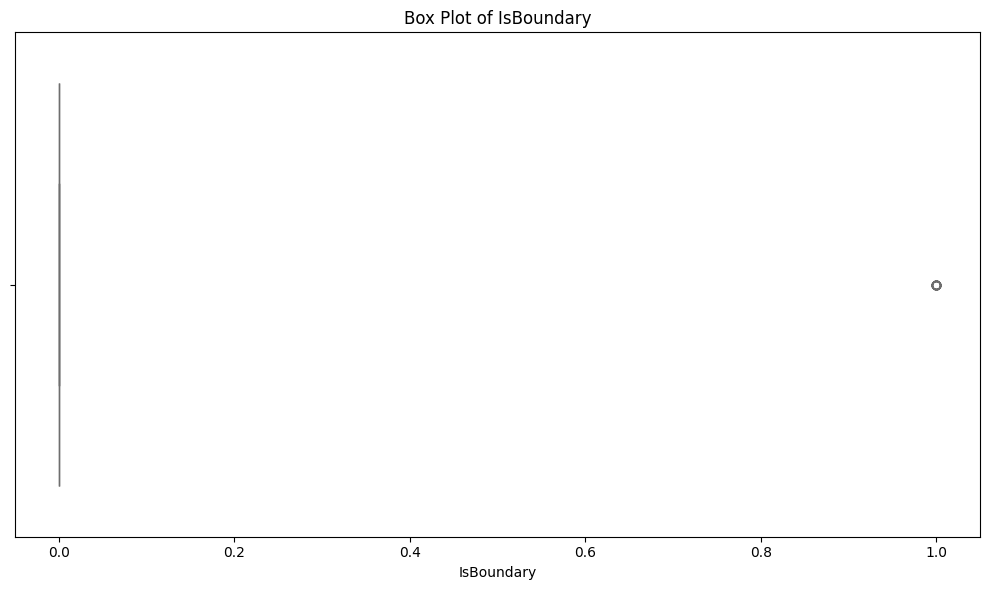

In [64]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data, x=column, color='lightcoral')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [65]:
data["BattingTeam"].unique()

array([0, 1], dtype=int64)

In [66]:
first_inning = data[data["BattingTeam"] == 0]
second_inning = data[data["BattingTeam"] == 1]

In [67]:
first_inning

BattingTeam  Over           Batter     Bowler  RunsBatter  RunsTotal  \
0              0     1       SC Ganguly    P Kumar           0          1   
1              0     1      BB McCullum    P Kumar           0          0   
2              0     1      BB McCullum    P Kumar           0          1   
6              0     1      BB McCullum    P Kumar           0          1   
7              0     2      BB McCullum     Z Khan           0          0   
..           ...   ...              ...        ...         ...        ...   
116            0    19      BB McCullum  JH Kallis           1          1   
117            0    19  Mohammad Hafeez  JH Kallis           4          4   
118            0    20      BB McCullum    P Kumar           6          6   
120            0    20      BB McCullum    P Kumar           2          2   
121            0    20      BB McCullum    P Kumar           0          0   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  
0         1    legbyes           0   Not Out  No Wicket      No Fielders  
1         0  No Extras           0   Not Out  No Wicket      No Fielders  
2         1      wides           0   Not Out  No Wicket      No Fielders  
6         1    legbyes           0   Not Out  No Wicket      No Fielders  
7         0  No Extras           0   Not Out  No Wicket      No Fielders  
..      ...        ...         ...       ...        ...              ...  
116       0  No Extras           0   Not Out  No Wicket      No Fielders  
117       0  No Extras           1   Not Out  No Wicket      No Fielders  
118       0  No Extras           1   Not Out  No Wicket      No Fielders  
120       0  No Extras           0   Not Out  No Wicket      No Fielders  
121       0  No Extras           0   Not Out  No Wicket      No Fielders  

[89 rows x 12 columns]

In [68]:
first_inning["Total_Score"] = first_inning["RunsTotal"].cumsum()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\1239354865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_inning["Total_Score"] = first_inning["RunsTotal"].cumsum()


In [69]:
second_inning["Total_Score"] = second_inning["RunsTotal"].cumsum()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\1277168639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_inning["Total_Score"] = second_inning["RunsTotal"].cumsum()


In [70]:
second_inning

BattingTeam  Over    Batter     Bowler  RunsBatter  RunsTotal  Extras  \
124            1     1  R Dravid   AB Dinda           1          1       0   
125            1     1  W Jaffer   AB Dinda           0          1       1   
126            1     1  W Jaffer   AB Dinda           0          0       0   
127            1     1  W Jaffer   AB Dinda           1          1       0   
131            1     2  R Dravid   I Sharma           0          0       0   
..           ...   ...       ...        ...         ...        ...     ...   
219            1    15  SB Joshi   I Sharma           1          1       0   
220            1    15   P Kumar   I Sharma           0          1       1   
222            1    15   P Kumar   I Sharma           0          0       0   
223            1    16  SB Joshi  LR Shukla           0          1       1   
224            1    16  SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  
124  No Extras           0   Not Out  No Wicket      No Fielders            1  
125      wides           0   Not Out  No Wicket      No Fielders            2  
126  No Extras           0   Not Out  No Wicket      No Fielders            2  
127  No Extras           0   Not Out  No Wicket      No Fielders            3  
131  No Extras           0  R Dravid     bowled      No Fielders            3  
..         ...         ...       ...        ...              ...          ...  
219  No Extras           0   Not Out  No Wicket      No Fielders           73  
220    legbyes           0   Not Out  No Wicket      No Fielders           74  
222  No Extras           0   Not Out  No Wicket      No Fielders           74  
223      wides           0   Not Out  No Wicket      No Fielders           75  
224  No Extras           0  SB Joshi     caught      BB McCullum           75  

[78 rows x 13 columns]

In [71]:
data_new = pd.concat([first_inning , second_inning], axis=0)
data_new

BattingTeam  Over       Batter     Bowler  RunsBatter  RunsTotal  Extras  \
0              0     1   SC Ganguly    P Kumar           0          1       1   
1              0     1  BB McCullum    P Kumar           0          0       0   
2              0     1  BB McCullum    P Kumar           0          1       1   
6              0     1  BB McCullum    P Kumar           0          1       1   
7              0     2  BB McCullum     Z Khan           0          0       0   
..           ...   ...          ...        ...         ...        ...     ...   
219            1    15     SB Joshi   I Sharma           1          1       0   
220            1    15      P Kumar   I Sharma           0          1       1   
222            1    15      P Kumar   I Sharma           0          0       0   
223            1    16     SB Joshi  LR Shukla           0          1       1   
224            1    16     SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  
0      legbyes           0   Not Out  No Wicket      No Fielders            1  
1    No Extras           0   Not Out  No Wicket      No Fielders            1  
2        wides           0   Not Out  No Wicket      No Fielders            2  
6      legbyes           0   Not Out  No Wicket      No Fielders            3  
7    No Extras           0   Not Out  No Wicket      No Fielders            3  
..         ...         ...       ...        ...              ...          ...  
219  No Extras           0   Not Out  No Wicket      No Fielders           73  
220    legbyes           0   Not Out  No Wicket      No Fielders           74  
222  No Extras           0   Not Out  No Wicket      No Fielders           74  
223      wides           0   Not Out  No Wicket      No Fielders           75  
224  No Extras           0  SB Joshi     caught      BB McCullum           75  

[167 rows x 13 columns]

In [72]:
data_new[(data_new["RunsTotal"] == 0) & (data_new["Extras"] == 0) & (data_new["PlayerOut"]=="Not Out")]

BattingTeam  Over           Batter      Bowler  RunsBatter  RunsTotal  \
1              0     1      BB McCullum     P Kumar           0          0   
7              0     2      BB McCullum      Z Khan           0          0   
13             0     3       SC Ganguly     P Kumar           0          0   
23             0     4       SC Ganguly   AA Noffke           0          0   
29             0     5      BB McCullum     P Kumar           0          0   
31             0     5       SC Ganguly     P Kumar           0          0   
34             0     6       RT Ponting      Z Khan           0          0   
44             0     8      BB McCullum      Z Khan           0          0   
50             0     9      BB McCullum   JH Kallis           0          0   
59             0    10      BB McCullum    SB Joshi           0          0   
64             0    11       RT Ponting   JH Kallis           0          0   
68             0    12      BB McCullum    SB Joshi           0          0   
72             0    12       RT Ponting    SB Joshi           0          0   
76             0    13      BB McCullum   JH Kallis           0          0   
82             0    14        DJ Hussey    SB Joshi           0          0   
94             0    16        DJ Hussey   AA Noffke           0          0   
97             0    16      BB McCullum   AA Noffke           0          0   
108            0    18  Mohammad Hafeez   AA Noffke           0          0   
113            0    19      BB McCullum   JH Kallis           0          0   
121            0    20      BB McCullum     P Kumar           0          0   
126            1     1         W Jaffer    AB Dinda           0          0   
132            1     2          V Kohli    I Sharma           0          0   
135            1     2         W Jaffer    I Sharma           0          0   
137            1     3          V Kohli    AB Dinda           0          0   
140            1     3         W Jaffer    AB Dinda           0          0   
146            1     4        JH Kallis    I Sharma           0          0   
148            1     4         W Jaffer    I Sharma           0          0   
152            1     5        JH Kallis  AB Agarkar           0          0   
155            1     5         CL White  AB Agarkar           0          0   
156            1     6         W Jaffer    AB Dinda           0          0   
158            1     6       MV Boucher    AB Dinda           0          0   
162            1     7         CL White  AB Agarkar           0          0   
167            1     7       MV Boucher  AB Agarkar           0          0   
175            1     8         CL White  SC Ganguly           0          0   
176            1     9          B Akhil  AB Agarkar           0          0   
178            1     9        AA Noffke  AB Agarkar           0          0   
185            1    10          P Kumar  SC Ganguly           0          0   
191            1    11        AA Noffke  AB Agarkar           0          0   
196            1    11          P Kumar  AB Agarkar           0          0   
198            1    12           Z Khan  SC Ganguly           0          0   
201            1    12          P Kumar  SC Ganguly           0          0   
207            1    13           Z Khan   LR Shukla           0          0   
212            1    14          P Kumar  SC Ganguly           0          0   
217            1    15         SB Joshi    I Sharma           0          0   
222            1    15          P Kumar    I Sharma           0          0   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  \
1         0  No Extras           0   Not Out  No Wicket      No Fielders   
7         0  No Extras           0   Not Out  No Wicket      No Fielders   
13        0  No Extras           0   Not Out  No Wicket      No Fielders   
23        0  No Extras           0   Not Out  No Wicket      No Fielders   
29        0  No Extras           0  

In [73]:
## This are the dot balls on which nothing happened

In [74]:
## we can just drop this ball data on which no run come and no wicket come/

In [75]:
data_new[(data_new["RunsTotal"] == 0) & (data_new["Extras"] == 0) & (data_new["PlayerOut"]=="Not Out")].index

Index([  1,   7,  13,  23,  29,  31,  34,  44,  50,  59,  64,  68,  72,  76,
        82,  94,  97, 108, 113, 121, 126, 132, 135, 137, 140, 146, 148, 152,
       155, 156, 158, 162, 167, 175, 176, 178, 185, 191, 196, 198, 201, 207,
       212, 217, 222],
      dtype='int64')

In [76]:
data_new.drop(data_new[(data_new["RunsTotal"] == 0) & (data_new["Extras"] == 0) & (data_new["PlayerOut"]=="Not Out")].index, axis=0, inplace=True)

In [77]:
data_new.head(5)

BattingTeam  Over       Batter   Bowler  RunsBatter  RunsTotal  Extras  \
0             0     1   SC Ganguly  P Kumar           0          1       1   
2             0     1  BB McCullum  P Kumar           0          1       1   
6             0     1  BB McCullum  P Kumar           0          1       1   
8             0     2  BB McCullum   Z Khan           4          4       0   
10            0     2  BB McCullum   Z Khan           6          6       0   

   ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  
0     legbyes           0   Not Out  No Wicket      No Fielders            1  
2       wides           0   Not Out  No Wicket      No Fielders            2  
6     legbyes           0   Not Out  No Wicket      No Fielders            3  
8   No Extras           1   Not Out  No Wicket      No Fielders            7  
10  No Extras           1   Not Out  No Wicket      No Fielders           13

In [78]:
data_new.shape

(122, 13)

In [79]:
data_new["WicketKind"].unique()

array(['No Wicket', 'caught', 'bowled', 'run out'], dtype=object)

In [80]:
data_new["PlayerOut"].unique()

array(['Not Out', 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi'], dtype=object)

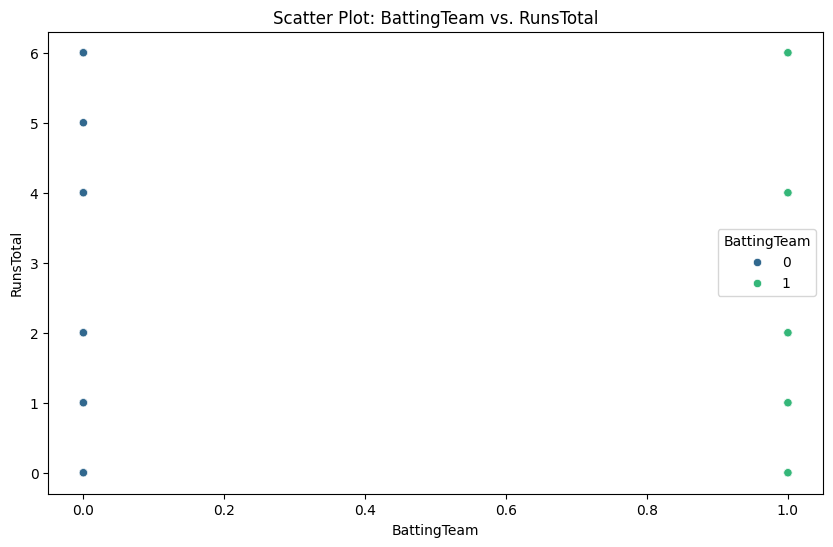

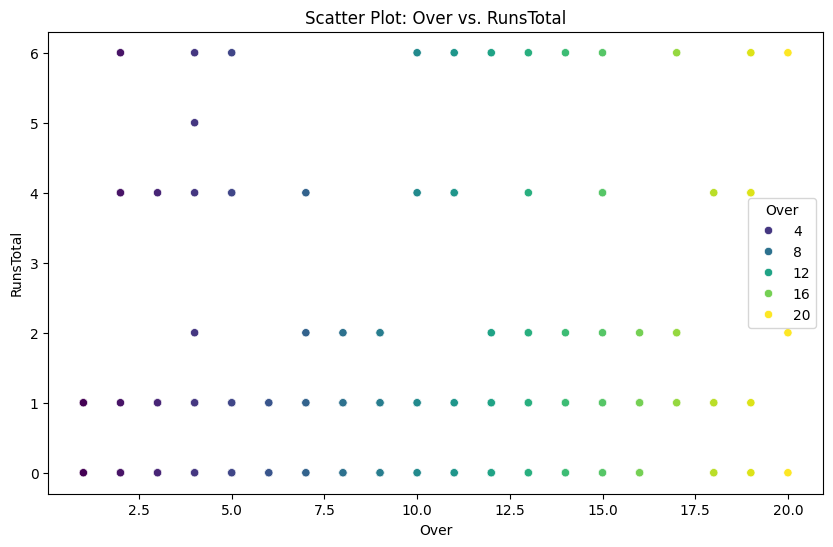

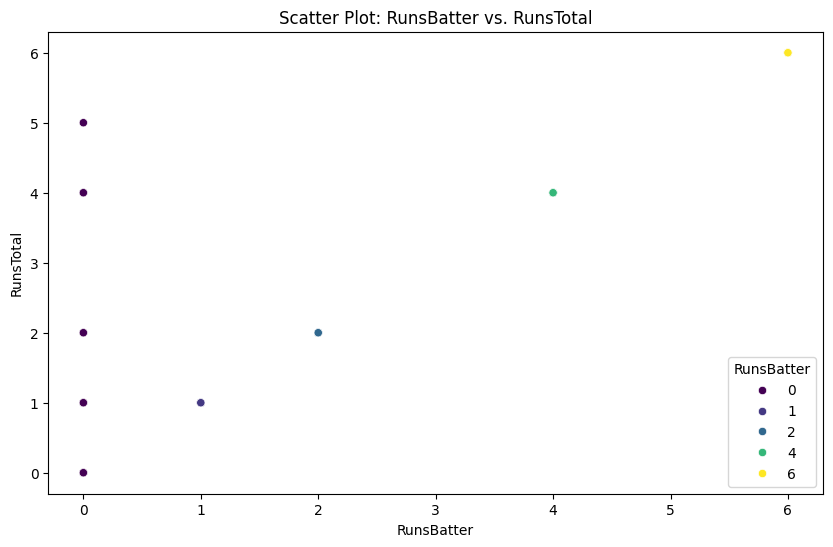

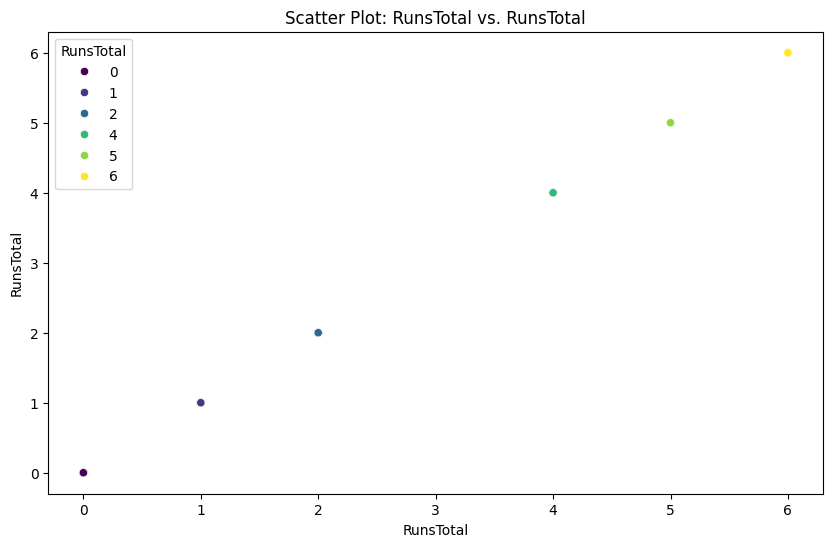

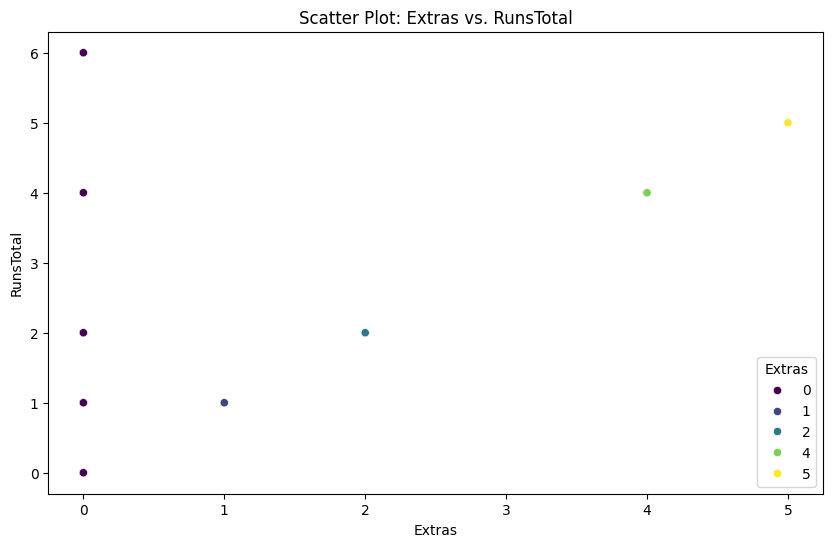

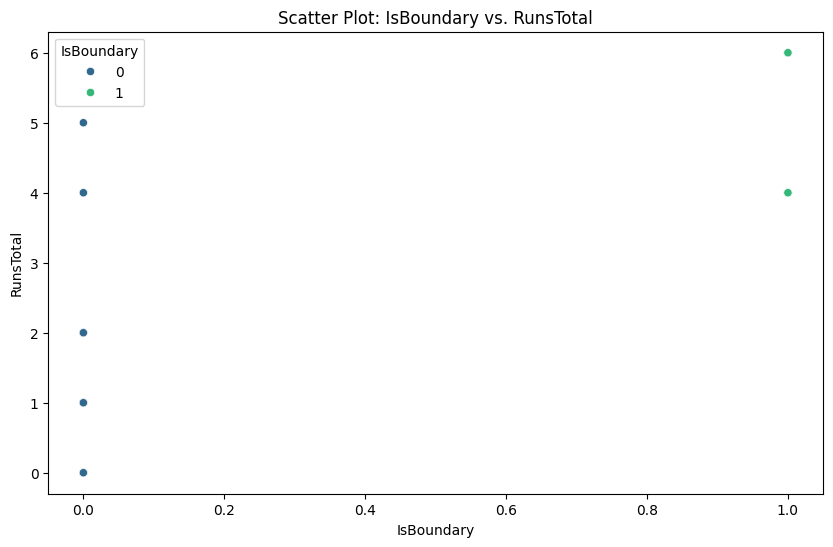

In [81]:
for i in numerical_columns:
    x_col = i
    y_col = "RunsTotal"
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data, x=x_col, y=y_col, hue=x_col, palette='viridis')
    plt.title(f'Scatter Plot: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()


#### Observe the data inning by inning

###### First Inning

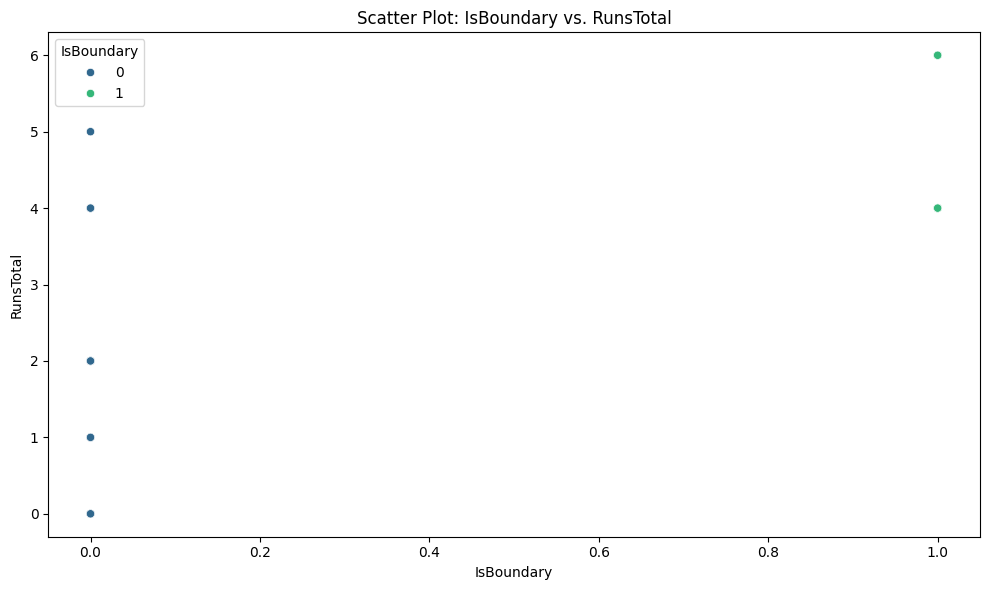

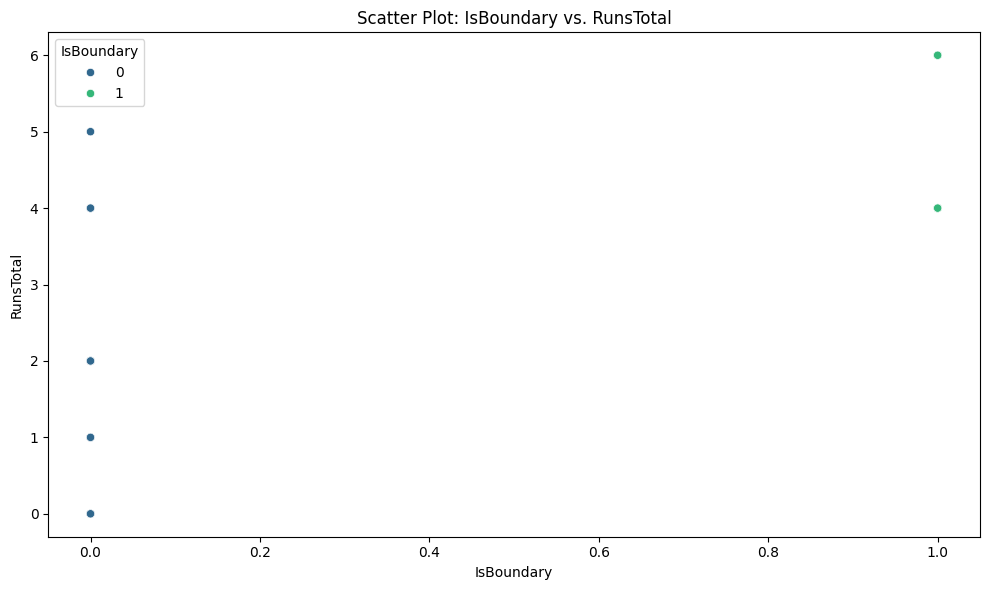

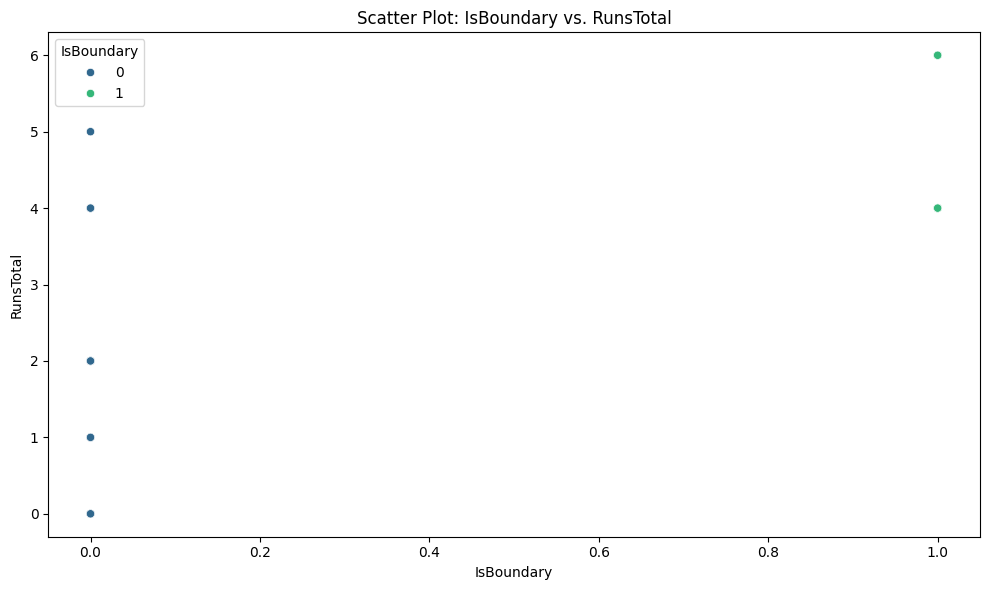

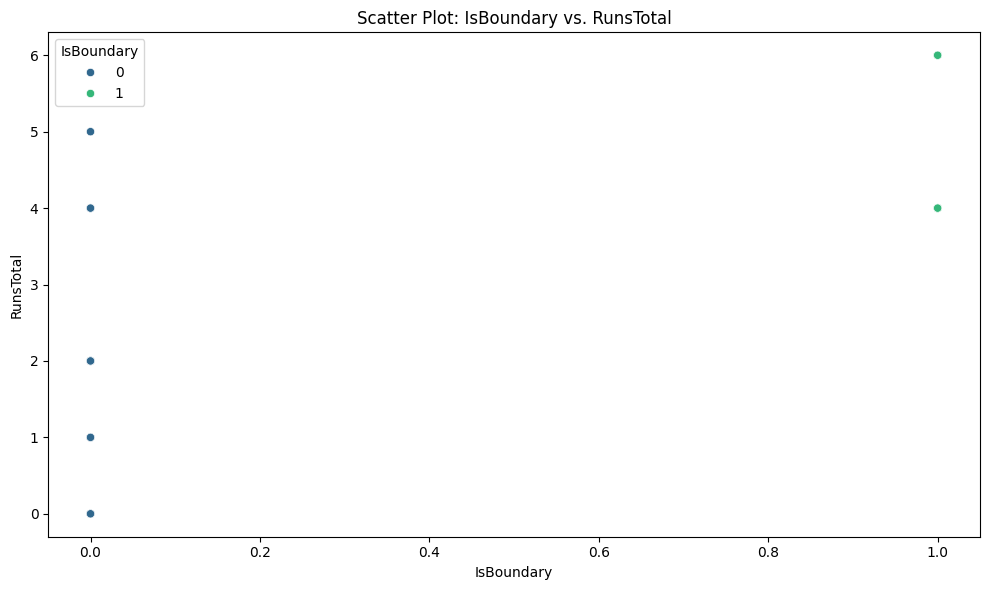

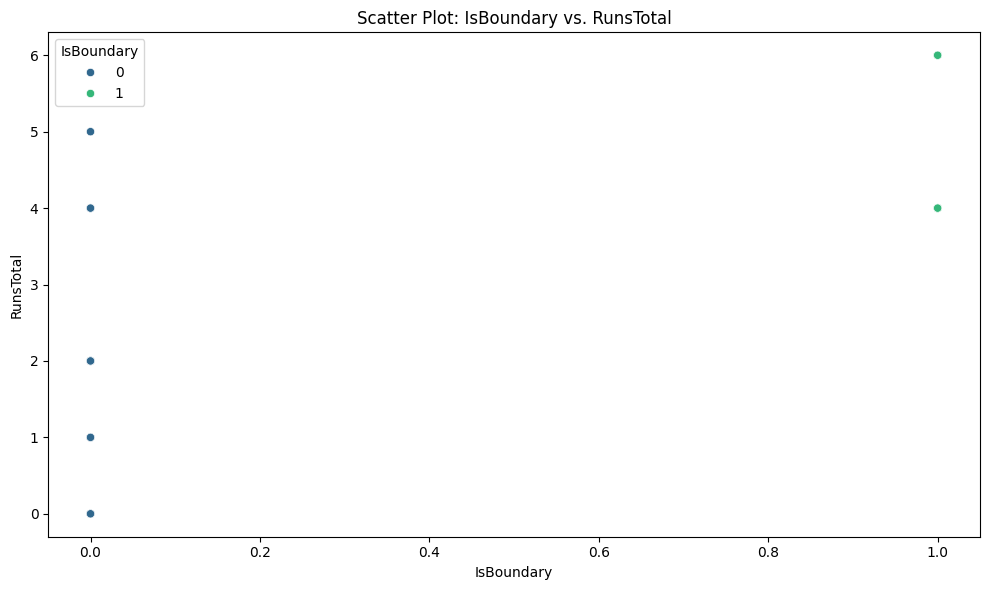

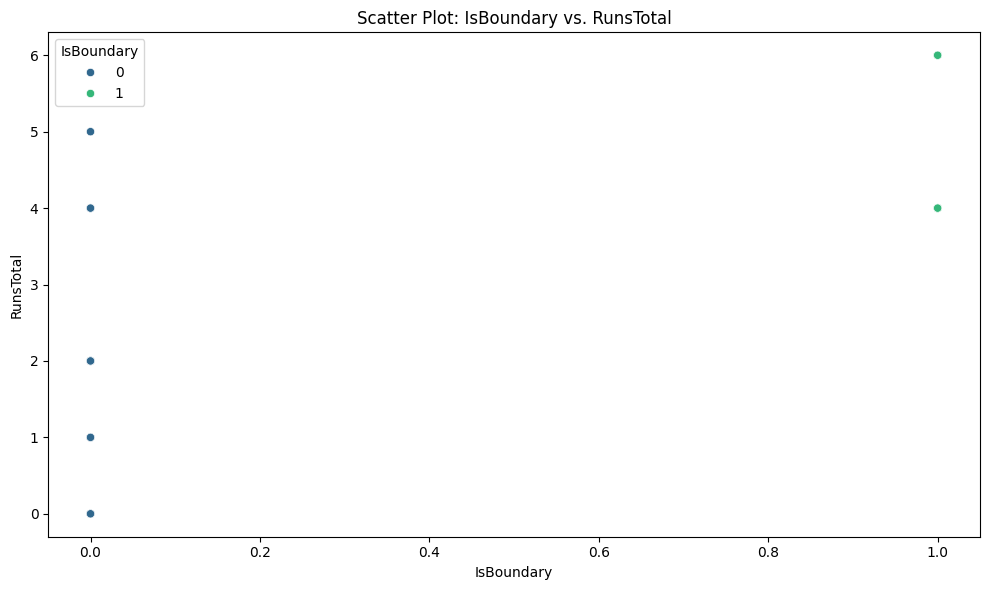

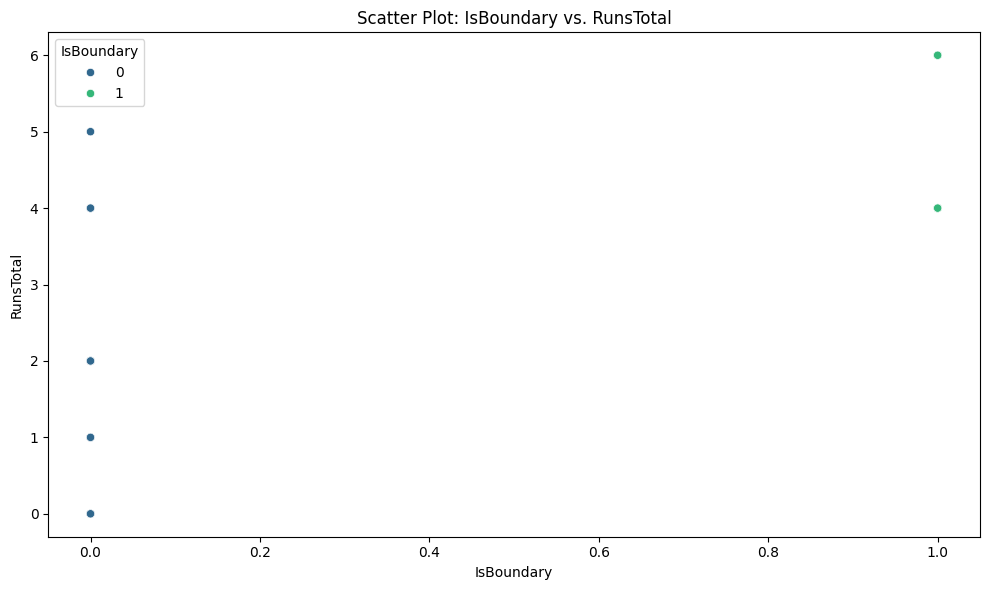

In [82]:
numerical_col_first_inng = [i for i in first_inning.columns if first_inning[i].dtype != "O"]
for columns in numerical_col_first_inng:
    x_col = i
    y_col = "RunsTotal"
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data, x=x_col, y=y_col, hue=x_col, palette='viridis')
    plt.title(f'Scatter Plot: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

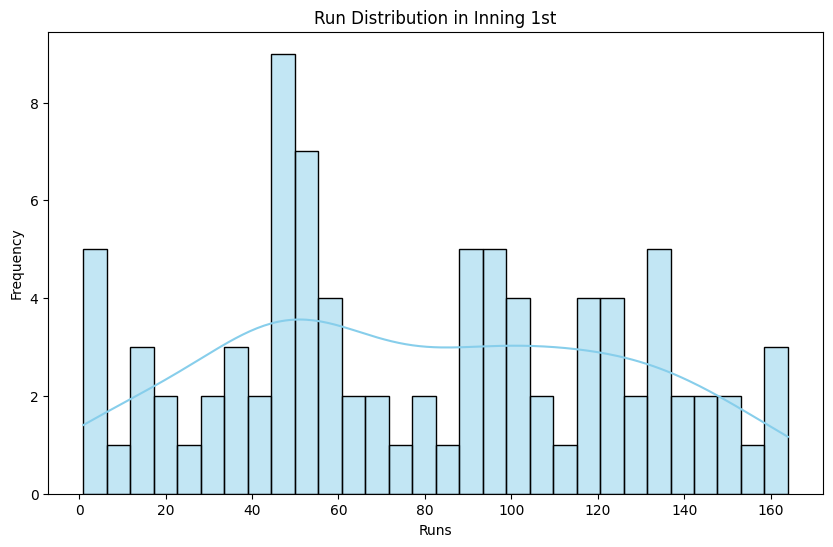

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(first_inning['Total_Score'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Run Distribution in Inning 1st')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

In [84]:
first_inning[first_inning['WicketKind'].notnull()]

BattingTeam  Over           Batter     Bowler  RunsBatter  RunsTotal  \
0              0     1       SC Ganguly    P Kumar           0          1   
1              0     1      BB McCullum    P Kumar           0          0   
2              0     1      BB McCullum    P Kumar           0          1   
6              0     1      BB McCullum    P Kumar           0          1   
7              0     2      BB McCullum     Z Khan           0          0   
..           ...   ...              ...        ...         ...        ...   
116            0    19      BB McCullum  JH Kallis           1          1   
117            0    19  Mohammad Hafeez  JH Kallis           4          4   
118            0    20      BB McCullum    P Kumar           6          6   
120            0    20      BB McCullum    P Kumar           2          2   
121            0    20      BB McCullum    P Kumar           0          0   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  \
0         1    legbyes           0   Not Out  No Wicket      No Fielders   
1         0  No Extras           0   Not Out  No Wicket      No Fielders   
2         1      wides           0   Not Out  No Wicket      No Fielders   
6         1    legbyes           0   Not Out  No Wicket      No Fielders   
7         0  No Extras           0   Not Out  No Wicket      No Fielders   
..      ...        ...         ...       ...        ...              ...   
116       0  No Extras           0   Not Out  No Wicket      No Fielders   
117       0  No Extras           1   Not Out  No Wicket      No Fielders   
118       0  No Extras           1   Not Out  No Wicket      No Fielders   
120       0  No Extras           0   Not Out  No Wicket      No Fielders   
121       0  No Extras           0   Not Out  No Wicket      No Fielders   

     Total_Score  
0              1  
1              1  
2              2  
6              3  
7              3  
..           ...  
116          152  
117          156  
118          162  
120          164  
121          164  

[89 rows x 13 columns]

In [85]:
first_inning.groupby('Over')['RunsTotal'].sum().to_frame()["RunsTotal"].values

array([ 3, 10,  6, 17, 10,  1,  4,  2,  4,  8, 15, 10,  8,  4, 17,  4, 12,
        6, 15,  8], dtype=int64)

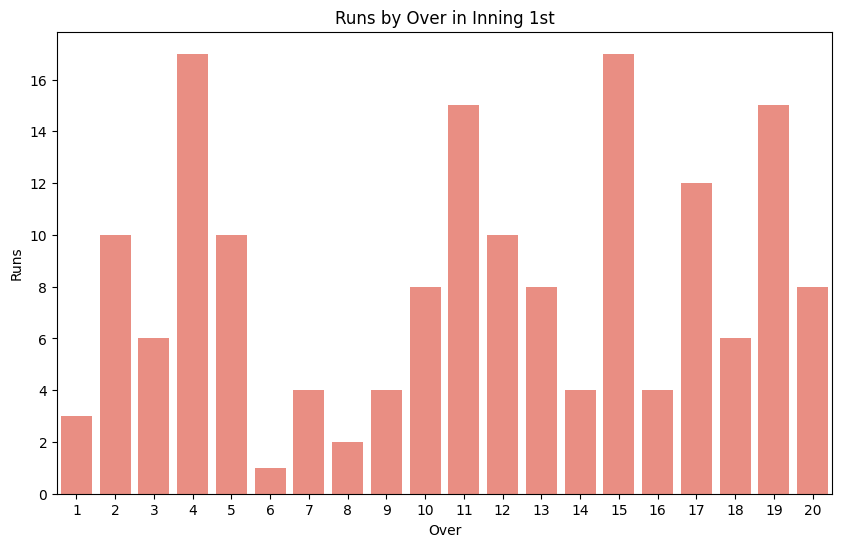

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x=first_inning.groupby('Over')['RunsTotal'].sum().to_frame().index, y=first_inning.groupby('Over')['RunsTotal'].sum().to_frame()["RunsTotal"].values, color='salmon')
plt.title(f'Runs by Over in Inning 1st')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()

In [87]:
first_inning["Wicket"] = first_inning["WicketKind"].apply(lambda x : 1 if x != "No Wicket" else 0)
first_inning

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3182133853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_inning["Wicket"] = first_inning["WicketKind"].apply(lambda x : 1 if x != "No Wicket" else 0)


BattingTeam  Over           Batter     Bowler  RunsBatter  RunsTotal  \
0              0     1       SC Ganguly    P Kumar           0          1   
1              0     1      BB McCullum    P Kumar           0          0   
2              0     1      BB McCullum    P Kumar           0          1   
6              0     1      BB McCullum    P Kumar           0          1   
7              0     2      BB McCullum     Z Khan           0          0   
..           ...   ...              ...        ...         ...        ...   
116            0    19      BB McCullum  JH Kallis           1          1   
117            0    19  Mohammad Hafeez  JH Kallis           4          4   
118            0    20      BB McCullum    P Kumar           6          6   
120            0    20      BB McCullum    P Kumar           2          2   
121            0    20      BB McCullum    P Kumar           0          0   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  \
0         1    legbyes           0   Not Out  No Wicket      No Fielders   
1         0  No Extras           0   Not Out  No Wicket      No Fielders   
2         1      wides           0   Not Out  No Wicket      No Fielders   
6         1    legbyes           0   Not Out  No Wicket      No Fielders   
7         0  No Extras           0   Not Out  No Wicket      No Fielders   
..      ...        ...         ...       ...        ...              ...   
116       0  No Extras           0   Not Out  No Wicket      No Fielders   
117       0  No Extras           1   Not Out  No Wicket      No Fielders   
118       0  No Extras           1   Not Out  No Wicket      No Fielders   
120       0  No Extras           0   Not Out  No Wicket      No Fielders   
121       0  No Extras           0   Not Out  No Wicket      No Fielders   

     Total_Score  Wicket  
0              1       0  
1              1       0  
2              2       0  
6              3       0  
7              3       0  
..           ...     ...  
116          152       0  
117          156       0  
118          162       0  
120          164       0  
121          164       0  

[89 rows x 14 columns]

In [88]:
second_inning["Wicket"] = second_inning["WicketKind"].apply(lambda x : 1 if x != "No Wicket" else 0)
second_inning

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\2661926159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_inning["Wicket"] = second_inning["WicketKind"].apply(lambda x : 1 if x != "No Wicket" else 0)


BattingTeam  Over    Batter     Bowler  RunsBatter  RunsTotal  Extras  \
124            1     1  R Dravid   AB Dinda           1          1       0   
125            1     1  W Jaffer   AB Dinda           0          1       1   
126            1     1  W Jaffer   AB Dinda           0          0       0   
127            1     1  W Jaffer   AB Dinda           1          1       0   
131            1     2  R Dravid   I Sharma           0          0       0   
..           ...   ...       ...        ...         ...        ...     ...   
219            1    15  SB Joshi   I Sharma           1          1       0   
220            1    15   P Kumar   I Sharma           0          1       1   
222            1    15   P Kumar   I Sharma           0          0       0   
223            1    16  SB Joshi  LR Shukla           0          1       1   
224            1    16  SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
124  No Extras           0   Not Out  No Wicket      No Fielders            1   
125      wides           0   Not Out  No Wicket      No Fielders            2   
126  No Extras           0   Not Out  No Wicket      No Fielders            2   
127  No Extras           0   Not Out  No Wicket      No Fielders            3   
131  No Extras           0  R Dravid     bowled      No Fielders            3   
..         ...         ...       ...        ...              ...          ...   
219  No Extras           0   Not Out  No Wicket      No Fielders           73   
220    legbyes           0   Not Out  No Wicket      No Fielders           74   
222  No Extras           0   Not Out  No Wicket      No Fielders           74   
223      wides           0   Not Out  No Wicket      No Fielders           75   
224  No Extras           0  SB Joshi     caught      BB McCullum           75   

     Wicket  
124       0  
125       0  
126       0  
127       0  
131       1  
..      ...  
219       0  
220       0  
222       0  
223       0  
224       1  

[78 rows x 14 columns]

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\863149245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Over', y='Wicket', data=wicket_per_over, palette='coolwarm')


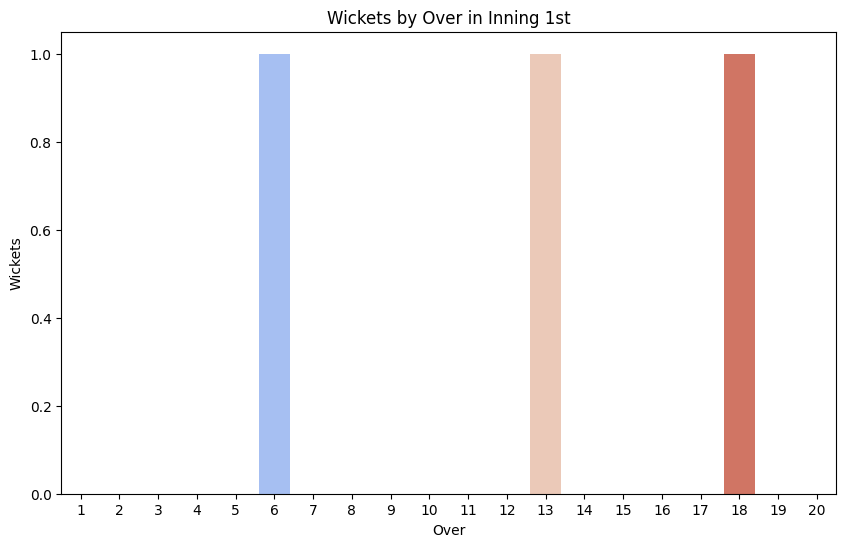

In [89]:
plt.figure(figsize=(10, 6))
wicket_per_over = first_inning.groupby('Over')['Wicket'].sum().reset_index()
sns.barplot(x='Over', y='Wicket', data=wicket_per_over, palette='coolwarm')
plt.title(f'Wickets by Over in Inning 1st')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\2795711596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Over', y='Extras', data=wicket_per_over, palette='coolwarm')


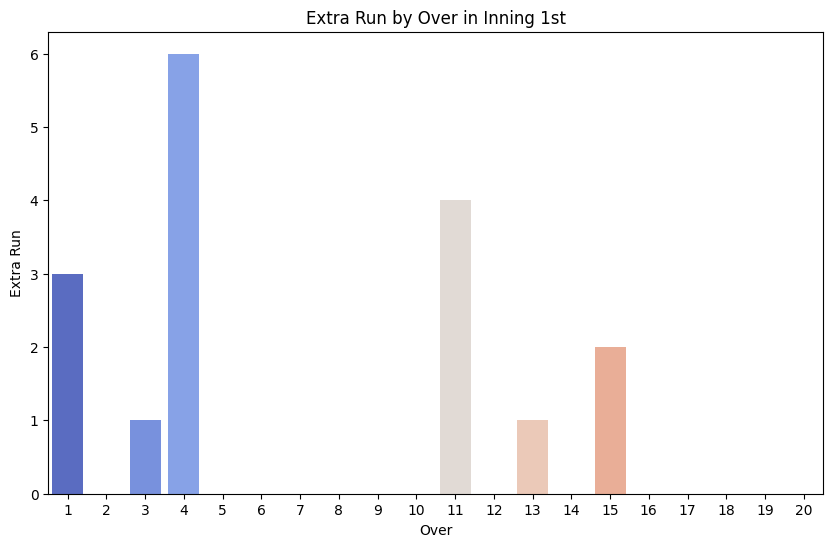

In [90]:
plt.figure(figsize=(10, 6))
wicket_per_over = first_inning.groupby('Over')['Extras'].sum().reset_index()
sns.barplot(x='Over', y='Extras', data=wicket_per_over, palette='coolwarm')
plt.title(f'Extra Run by Over in Inning 1st')
plt.xlabel('Over')
plt.ylabel('Extra Run')
plt.show()

##### Second Inning

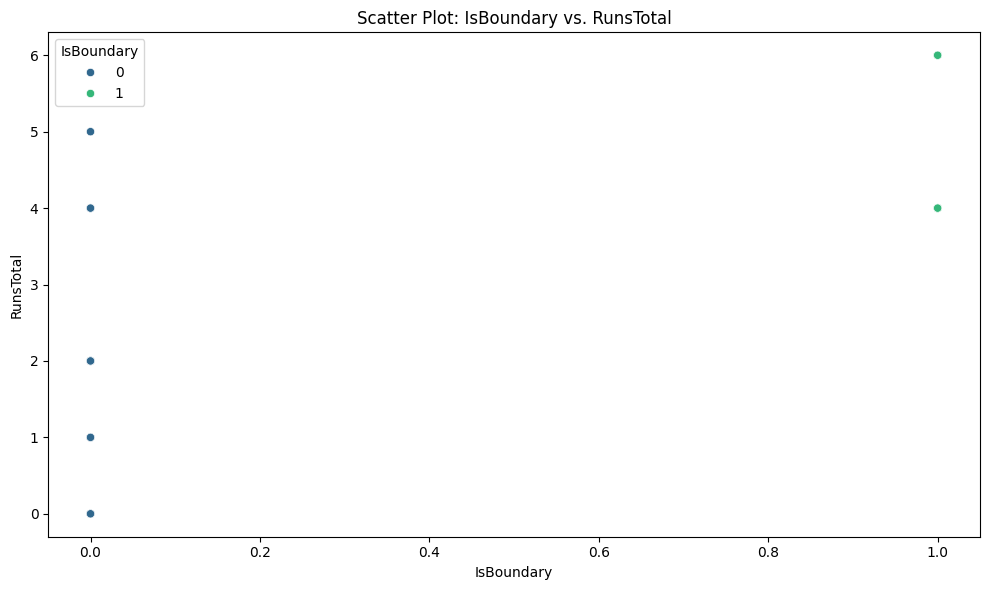

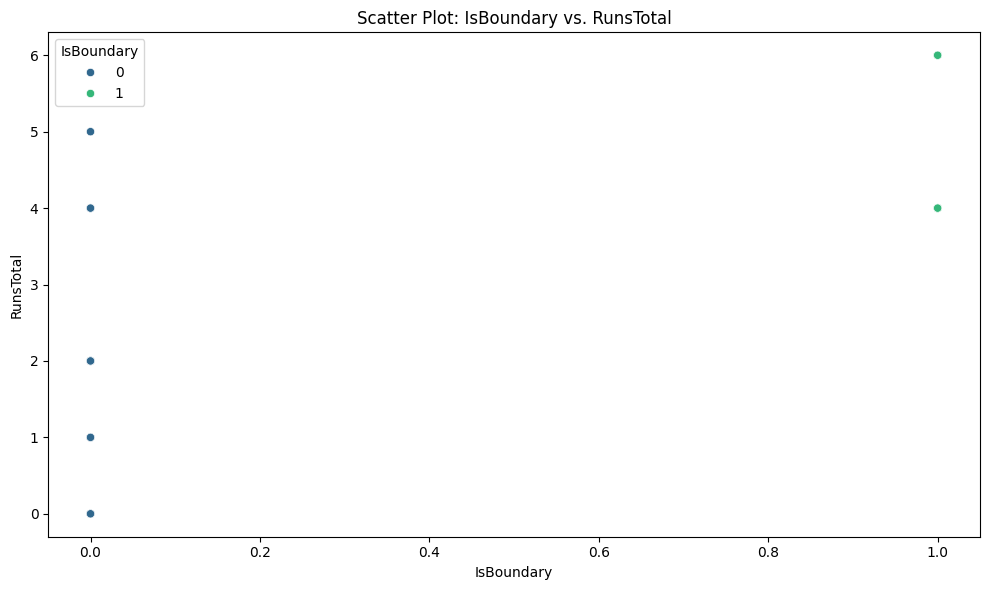

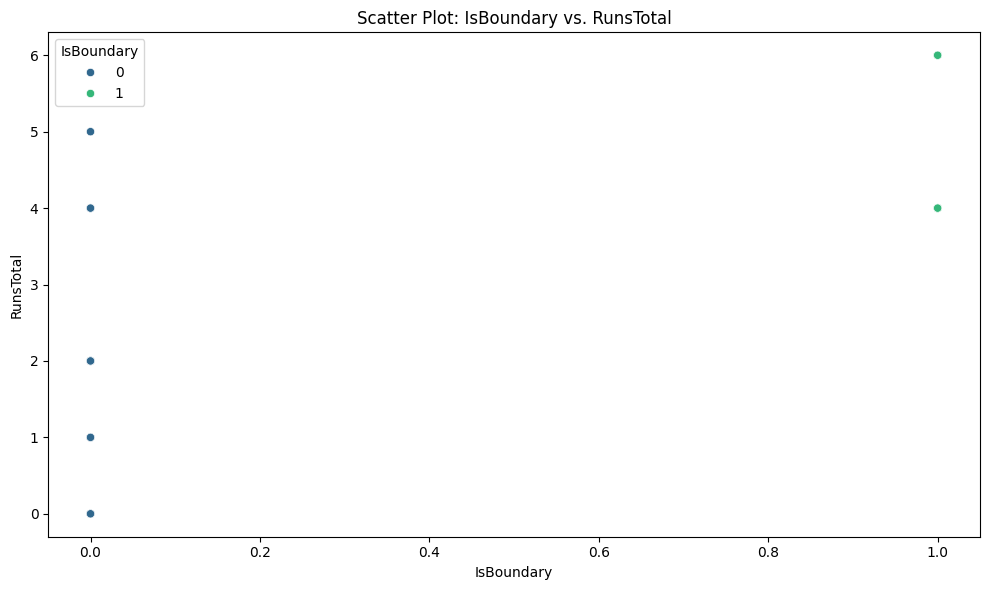

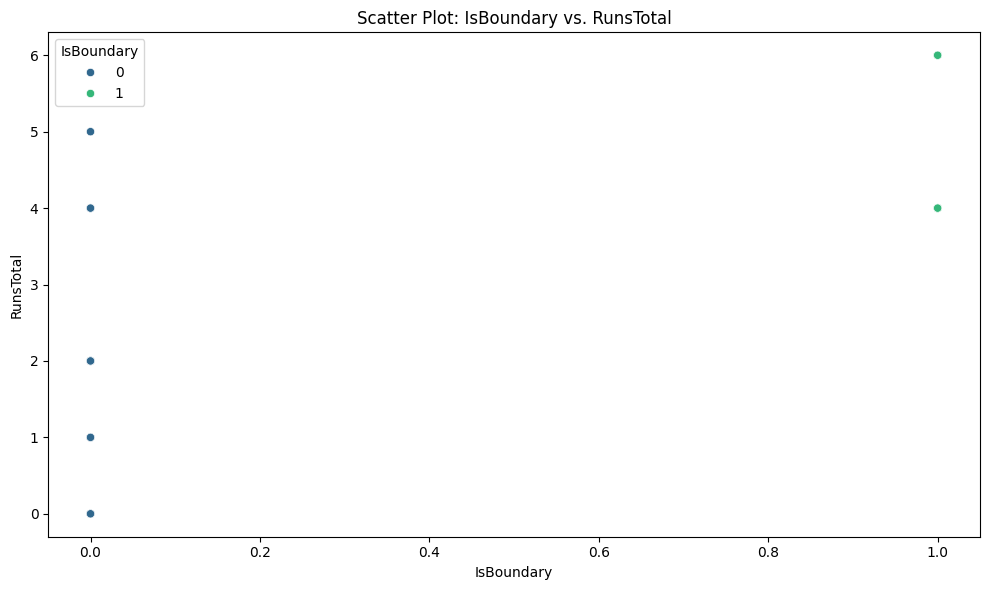

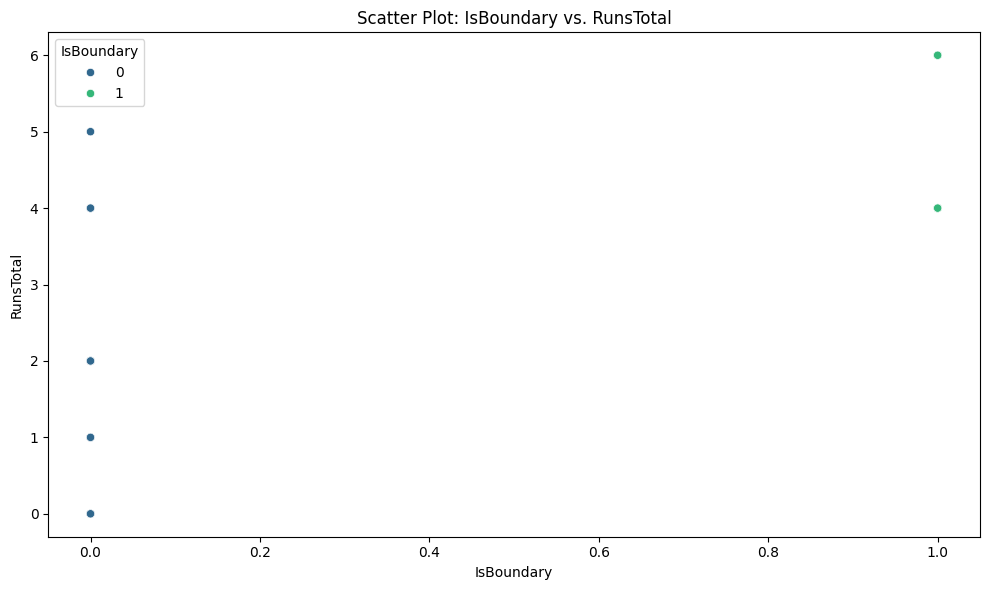

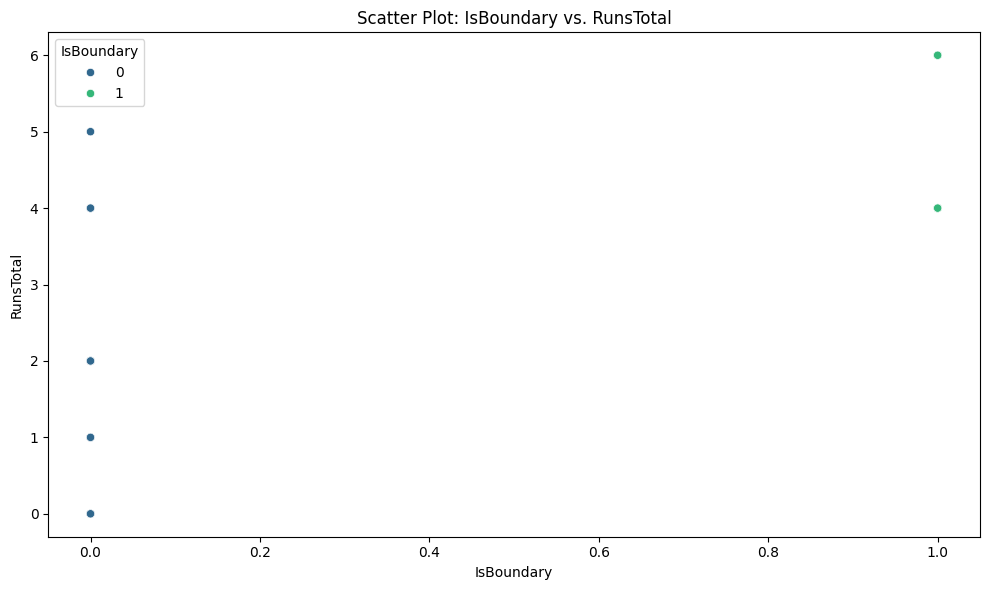

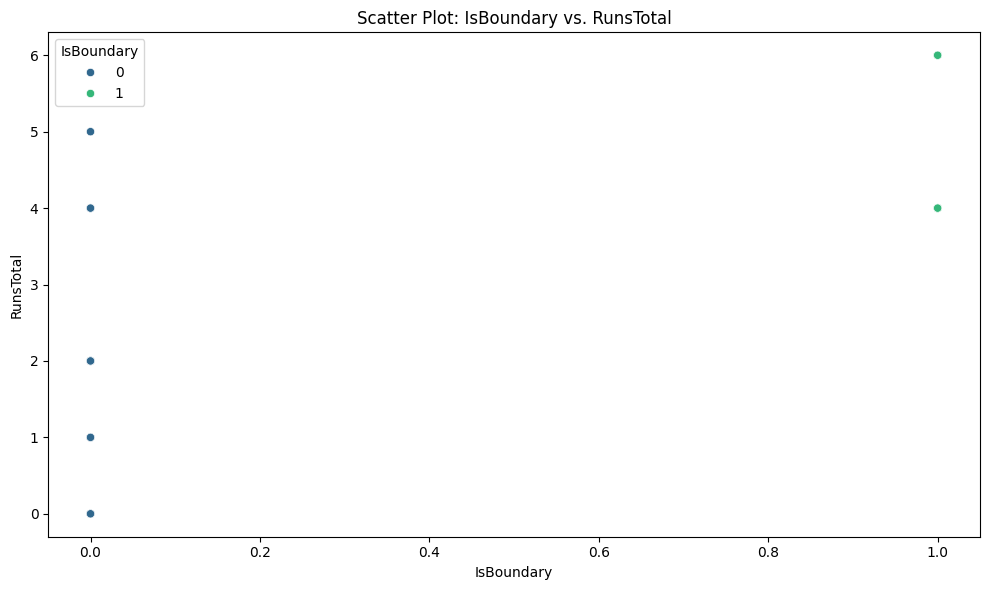

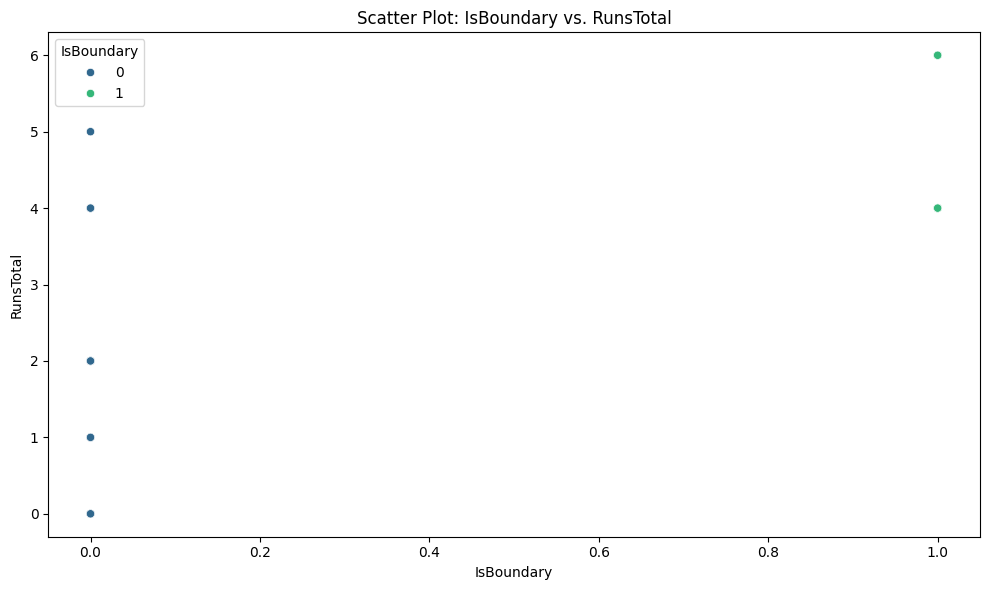

In [91]:
numerical_col_second_inning = [i for i in second_inning.columns if second_inning[i].dtype != "O"]
for columns in numerical_col_second_inning:
    x_col = i
    y_col = "RunsTotal"
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data, x=x_col, y=y_col, hue=x_col, palette='viridis')
    plt.title(f'Scatter Plot: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()


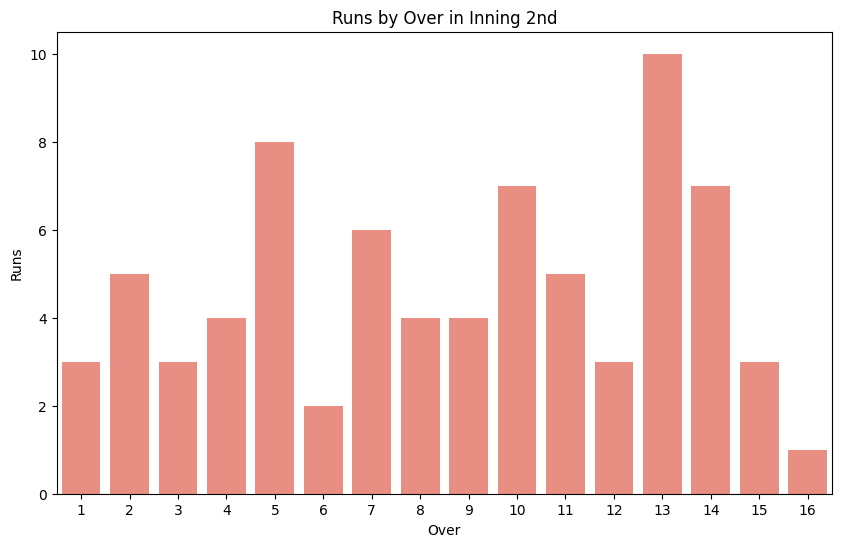

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x=second_inning.groupby('Over')['RunsTotal'].sum().to_frame().index, y=second_inning.groupby('Over')['RunsTotal'].sum().to_frame()["RunsTotal"].values, color='salmon')
plt.title(f'Runs by Over in Inning 2nd')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\3532967140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Over', y='Wicket', data=wicket_per_over, palette='coolwarm')


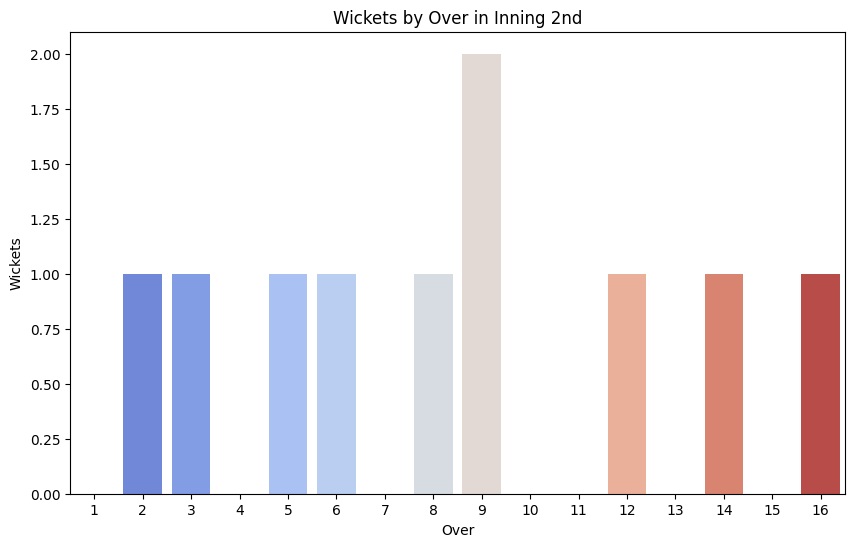

In [93]:
plt.figure(figsize=(10, 6))
wicket_per_over = second_inning.groupby('Over')['Wicket'].sum().reset_index()
sns.barplot(x='Over', y='Wicket', data=wicket_per_over, palette='coolwarm')
plt.title(f'Wickets by Over in Inning 2nd')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\598663987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Over', y='Extras', data=wicket_per_over, palette='coolwarm')


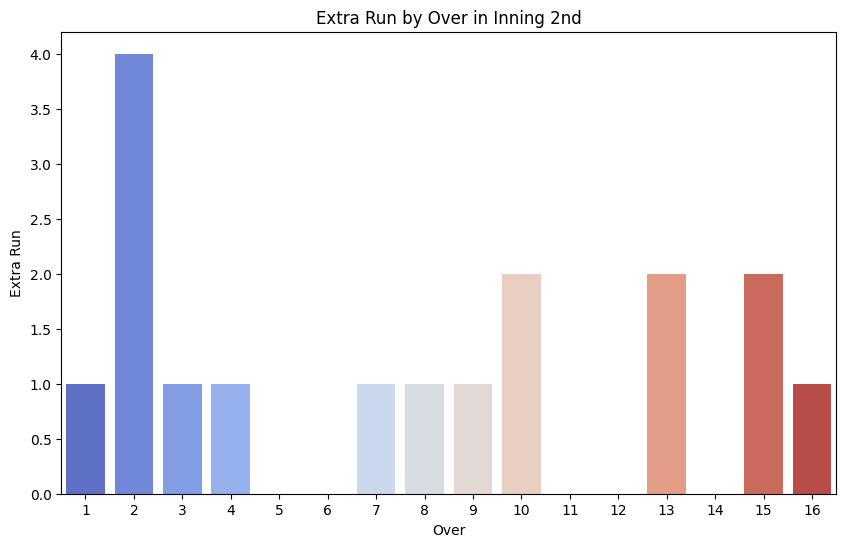

In [94]:
plt.figure(figsize=(10, 6))
wicket_per_over = second_inning.groupby('Over')['Extras'].sum().reset_index()
sns.barplot(x='Over', y='Extras', data=wicket_per_over, palette='coolwarm')
plt.title(f'Extra Run by Over in Inning 2nd')
plt.xlabel('Over')
plt.ylabel('Extra Run')
plt.show()

In [95]:
data_new = pd.concat([first_inning , second_inning], axis=0)
data_new

BattingTeam  Over       Batter     Bowler  RunsBatter  RunsTotal  Extras  \
0              0     1   SC Ganguly    P Kumar           0          1       1   
1              0     1  BB McCullum    P Kumar           0          0       0   
2              0     1  BB McCullum    P Kumar           0          1       1   
6              0     1  BB McCullum    P Kumar           0          1       1   
7              0     2  BB McCullum     Z Khan           0          0       0   
..           ...   ...          ...        ...         ...        ...     ...   
219            1    15     SB Joshi   I Sharma           1          1       0   
220            1    15      P Kumar   I Sharma           0          1       1   
222            1    15      P Kumar   I Sharma           0          0       0   
223            1    16     SB Joshi  LR Shukla           0          1       1   
224            1    16     SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
0      legbyes           0   Not Out  No Wicket      No Fielders            1   
1    No Extras           0   Not Out  No Wicket      No Fielders            1   
2        wides           0   Not Out  No Wicket      No Fielders            2   
6      legbyes           0   Not Out  No Wicket      No Fielders            3   
7    No Extras           0   Not Out  No Wicket      No Fielders            3   
..         ...         ...       ...        ...              ...          ...   
219  No Extras           0   Not Out  No Wicket      No Fielders           73   
220    legbyes           0   Not Out  No Wicket      No Fielders           74   
222  No Extras           0   Not Out  No Wicket      No Fielders           74   
223      wides           0   Not Out  No Wicket      No Fielders           75   
224  No Extras           0  SB Joshi     caught      BB McCullum           75   

     Wicket  
0         0  
1         0  
2         0  
6         0  
7         0  
..      ...  
219       0  
220       0  
222       0  
223       0  
224       1  

[167 rows x 14 columns]

##### Do Analysis Team By Team

In [96]:
def plot_runs_by_team_and_over(df, inning_num):
    plt.figure(figsize=(12, 7))
    team_over_runs = df.groupby(['BattingTeam', 'Over'])['RunsTotal'].sum().reset_index()
    sns.lineplot(data=team_over_runs, x='Over', y='RunsTotal', hue='BattingTeam', marker='o')
    plt.title(f'Runs by Over for Each Team (Inning {inning_num})')
    plt.xlabel('Over')
    plt.ylabel('Total Runs')
    plt.legend(title='Batting Team')
    plt.show()


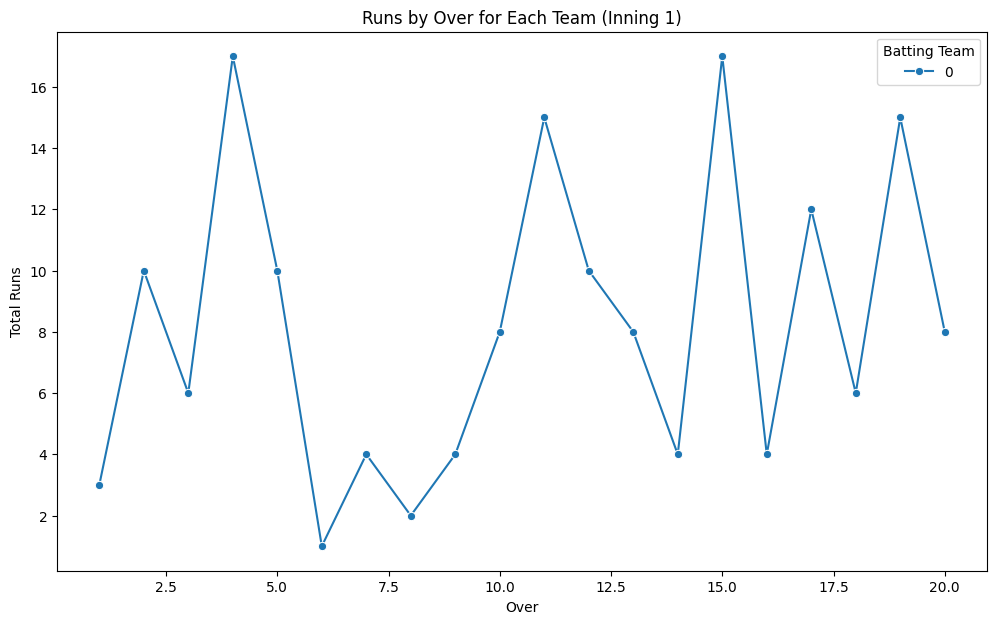

In [97]:
plot_runs_by_team_and_over(first_inning,1)

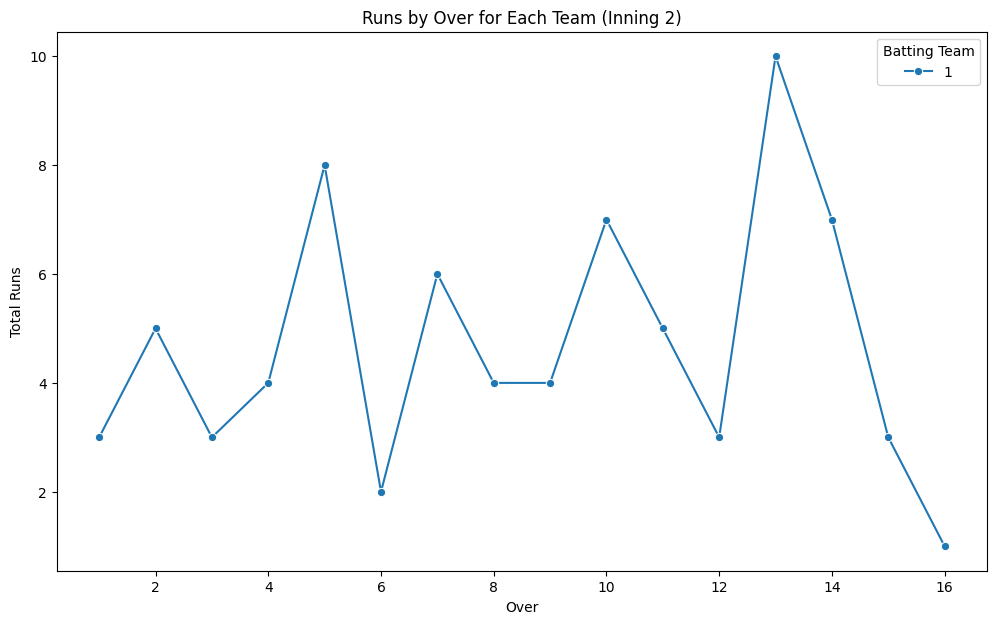

In [98]:
plot_runs_by_team_and_over(second_inning,2)

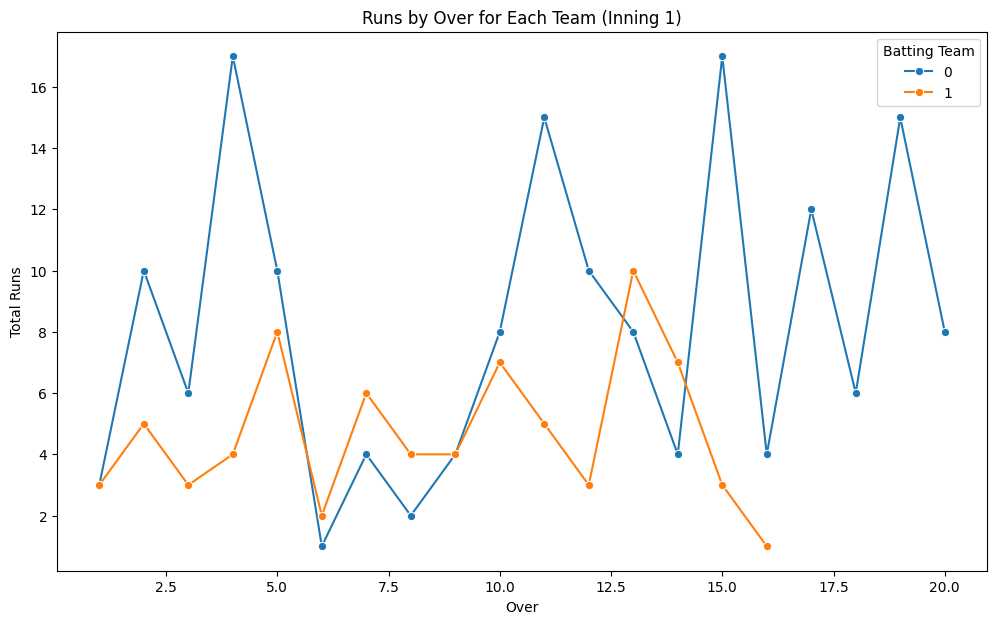

In [99]:
plot_runs_by_team_and_over(data_new, 1)

In [100]:
second_inning.tail(4)

BattingTeam  Over    Batter     Bowler  RunsBatter  RunsTotal  Extras  \
220            1    15   P Kumar   I Sharma           0          1       1   
222            1    15   P Kumar   I Sharma           0          0       0   
223            1    16  SB Joshi  LR Shukla           0          1       1   
224            1    16  SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
220    legbyes           0   Not Out  No Wicket      No Fielders           74   
222  No Extras           0   Not Out  No Wicket      No Fielders           74   
223      wides           0   Not Out  No Wicket      No Fielders           75   
224  No Extras           0  SB Joshi     caught      BB McCullum           75   

     Wicket  
220       0  
222       0  
223       0  
224       1

In [101]:
first_inning.tail(5)

BattingTeam  Over           Batter     Bowler  RunsBatter  RunsTotal  \
116            0    19      BB McCullum  JH Kallis           1          1   
117            0    19  Mohammad Hafeez  JH Kallis           4          4   
118            0    20      BB McCullum    P Kumar           6          6   
120            0    20      BB McCullum    P Kumar           2          2   
121            0    20      BB McCullum    P Kumar           0          0   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  \
116       0  No Extras           0   Not Out  No Wicket      No Fielders   
117       0  No Extras           1   Not Out  No Wicket      No Fielders   
118       0  No Extras           1   Not Out  No Wicket      No Fielders   
120       0  No Extras           0   Not Out  No Wicket      No Fielders   
121       0  No Extras           0   Not Out  No Wicket      No Fielders   

     Total_Score  Wicket  
116          152       0  
117          156       0  
118          162       0  
120          164       0  
121          164       0

In [102]:
first_inning[first_inning['Wicket'].notnull()].groupby('Bowler')['Wicket'].sum().sort_values(ascending=False)

Bowler
AA Noffke    1
JH Kallis    1
Z Khan       1
CL White     0
P Kumar      0
SB Joshi     0
Name: Wicket, dtype: int64

In [103]:
def plot_wickets_by_bowler(df, inning_num):
    plt.figure(figsize=(12, 7))
    bowler_wickets = df[df['Wicket'].notnull()].groupby('Bowler')['Wicket'].sum().sort_values(ascending=False)
    bowler_wickets.plot(kind='bar', color='orange')
    plt.title(f'Top Bowlers by Wickets (Inning {inning_num})')
    plt.xlabel('Bowler')
    plt.ylabel('Number of Wickets')
    plt.show()

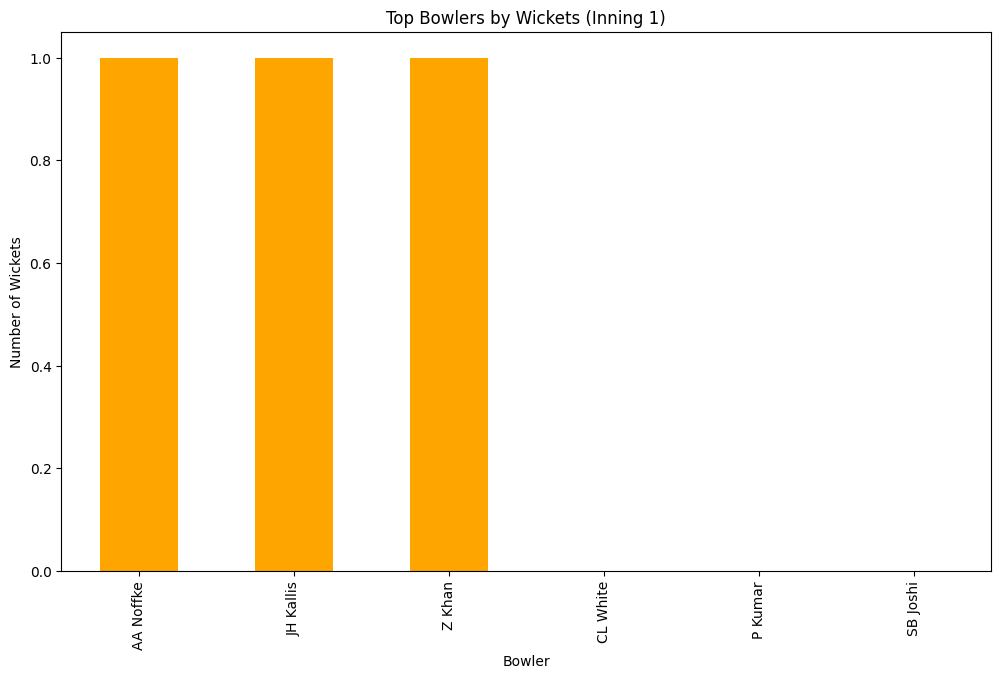

In [104]:
plot_wickets_by_bowler(first_inning, 1)

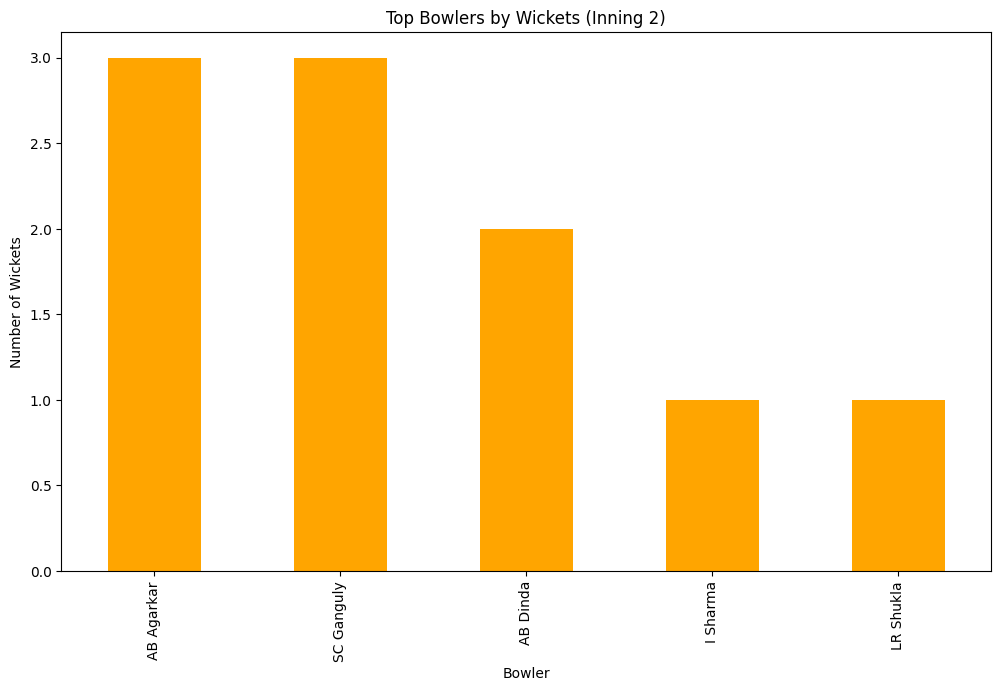

In [105]:
plot_wickets_by_bowler(second_inning, 2)

In [106]:
data_new.head(2)

BattingTeam  Over       Batter   Bowler  RunsBatter  RunsTotal  Extras  \
0            0     1   SC Ganguly  P Kumar           0          1       1   
1            0     1  BB McCullum  P Kumar           0          0       0   

  ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
0    legbyes           0   Not Out  No Wicket      No Fielders            1   
1  No Extras           0   Not Out  No Wicket      No Fielders            1   

   Wicket  
0       0  
1       0

In [107]:
data_new.groupby('Bowler')['Wicket'].sum().sort_values(ascending=False).reset_index()

Bowler  Wicket
0   AB Agarkar       3
1   SC Ganguly       3
2     AB Dinda       2
3    AA Noffke       1
4     I Sharma       1
5    JH Kallis       1
6    LR Shukla       1
7       Z Khan       1
8     CL White       0
9      P Kumar       0
10    SB Joshi       0

In [108]:
data_new.groupby(['Bowler', 'BattingTeam'])['Wicket'].sum().sort_values(ascending=False).reset_index()

Bowler  BattingTeam  Wicket
0   AB Agarkar            1       3
1   SC Ganguly            1       3
2     AB Dinda            1       2
3    AA Noffke            0       1
4     I Sharma            1       1
5    JH Kallis            0       1
6    LR Shukla            1       1
7       Z Khan            0       1
8     CL White            0       0
9      P Kumar            0       0
10    SB Joshi            0       0

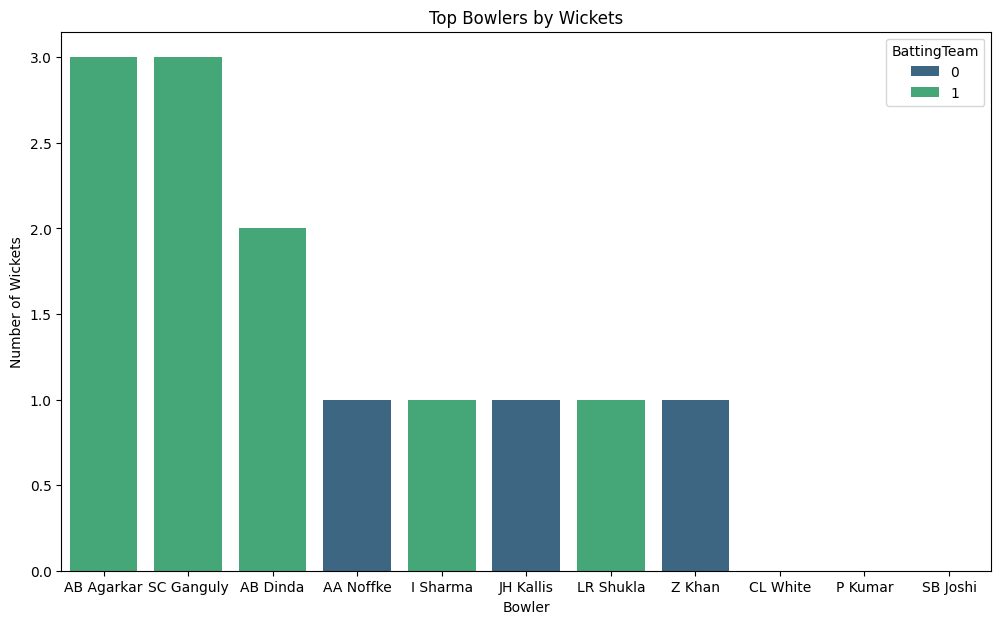

In [109]:
plt.figure(figsize=(12, 7))
bowler_wickets = data_new.groupby(['Bowler', 'BattingTeam'])['Wicket'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=bowler_wickets, x='Bowler', y='Wicket', hue='BattingTeam', palette='viridis')
plt.title(f'Top Bowlers by Wickets')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.show()

In [110]:
first_inning[(first_inning['RunsTotal'] == 4) | (first_inning['RunsTotal'] == 6)]

BattingTeam  Over           Batter     Bowler  RunsBatter  RunsTotal  \
8              0     2      BB McCullum     Z Khan           4          4   
10             0     2      BB McCullum     Z Khan           6          6   
16             0     3      BB McCullum    P Kumar           4          4   
20             0     4      BB McCullum  AA Noffke           6          6   
22             0     4       SC Ganguly  AA Noffke           4          4   
26             0     5       SC Ganguly    P Kumar           4          4   
28             0     5      BB McCullum    P Kumar           4          4   
60             0    10      BB McCullum   SB Joshi           6          6   
63             0    11       RT Ponting  JH Kallis           4          4   
65             0    11       RT Ponting  JH Kallis           6          6   
67             0    11       RT Ponting  JH Kallis           0          4   
69             0    12      BB McCullum   SB Joshi           6          6   
75             0    13      BB McCullum  JH Kallis           4          4   
87             0    15        DJ Hussey   CL White           4          4   
89             0    15      BB McCullum   CL White           6          6   
90             0    15      BB McCullum   CL White           4          4   
103            0    17      BB McCullum     Z Khan           6          6   
110            0    18      BB McCullum  AA Noffke           4          4   
112            0    19      BB McCullum  JH Kallis           6          6   
115            0    19      BB McCullum  JH Kallis           4          4   
117            0    19  Mohammad Hafeez  JH Kallis           4          4   
118            0    20      BB McCullum    P Kumar           6          6   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  \
8         0  No Extras           1   Not Out  No Wicket      No Fielders   
10        0  No Extras           1   Not Out  No Wicket      No Fielders   
16        0  No Extras           1   Not Out  No Wicket      No Fielders   
20        0  No Extras           1   Not Out  No Wicket      No Fielders   
22        0  No Extras           1   Not Out  No Wicket      No Fielders   
26        0  No Extras           1   Not Out  No Wicket      No Fielders   
28        0  No Extras           1   Not Out  No Wicket      No Fielders   
60        0  No Extras           1   Not Out  No Wicket      No Fielders   
63        0  No Extras           1   Not Out  No Wicket      No Fielders   
65        0  No Extras           1   Not Out  No Wicket      No Fielders   
67        4       byes           0   Not Out  No Wicket      No Fielders   
69        0  No Extras           1   Not Out  No Wicket      No Fielders   
75        0  No Extras           1   Not Out  No Wicket      No Fielders   
87        0  No Extras           1   Not Out  No Wicket      No Fielders   
89        0  No Extras           1   Not Out  No Wicket      No Fielders   
90        0  No Extras           1   Not Out  No Wicket      No Fielders   
103       0  No Extras           1   Not Out  No Wicket      No Fielders   
110       0  No Extras           1   Not Out  No Wicket      No Fielders   
112       0  No Extras           1   Not Out  No Wicket      No Fielders   
115       0  No Extras           1   Not Out  No Wicket      No Fielders   
117       0  No Extras           1   Not Out  No Wicket      No Fielders   
118       0  No Extras           1   Not Out  No Wicket      No Fielders   

     Total_Score  Wicket  
8              7       0  
10            13       0  
16            18       0  
20            30       0  
22            35       0  
26            40       0  
28            45       0  
60            65       0  
63            70       0  
65            76       0  
67            80       0  
69            86       0  
75            94       0  
87           106       0  
89           113       0  
90           117       0  
103          133       0 

In [111]:
def plot_boundaries_by_over(df, inning_num):
    boundaries_df = df[(df['RunsTotal'] == 4) | (df['RunsTotal'] == 6)]
    boundaries_count = boundaries_df.groupby('Over')['RunsTotal'].count().reset_index()

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Over', y='RunsTotal', data=boundaries_count, color='green')
    plt.title(f'Number of Boundaries by Over (Inning {inning_num})')
    plt.xlabel('Over')
    plt.ylabel('Number of Boundaries')
    plt.show()


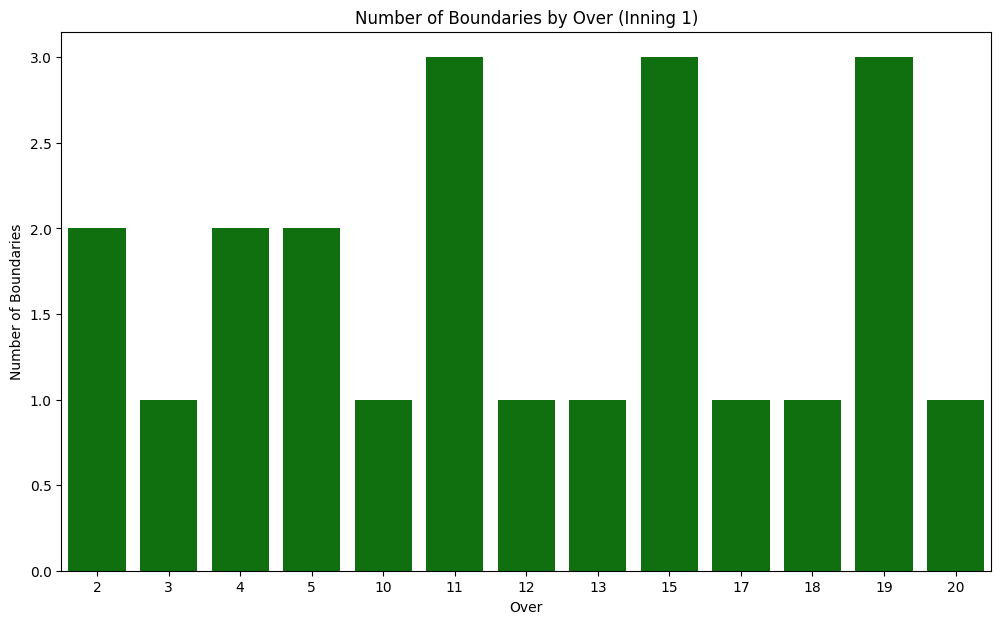

In [112]:
plot_boundaries_by_over(first_inning, 1)

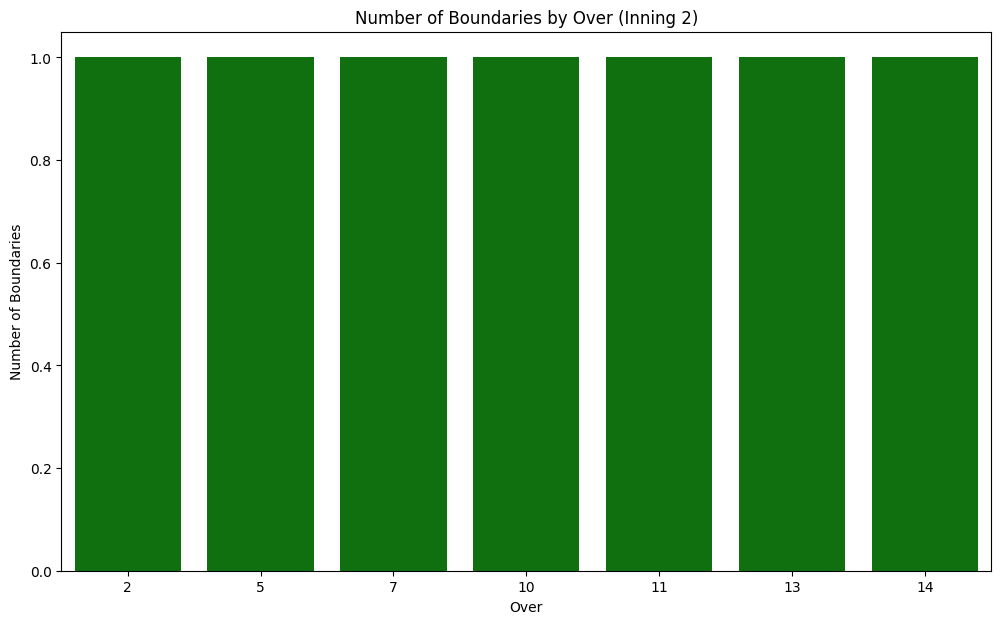

In [113]:

plot_boundaries_by_over(second_inning, 2)

In [114]:
def plot_top_batters(df, inning_num):
    top_batters = df.groupby('Batter')['RunsTotal'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 7))
    top_batters.plot(kind='bar', color='blue')
    plt.title(f'Top 10 Batters (Inning {inning_num})')
    plt.xlabel('Batter')
    plt.ylabel('Total Runs')

    bars = plt.bar(top_batters.index, top_batters.values, color='blue')

    for bar in bars:
      height = bar.get_height()
      plt.annotate(f'{int(height)}',  # Total runs as integer
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset for text position
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='black')

    plt.show()


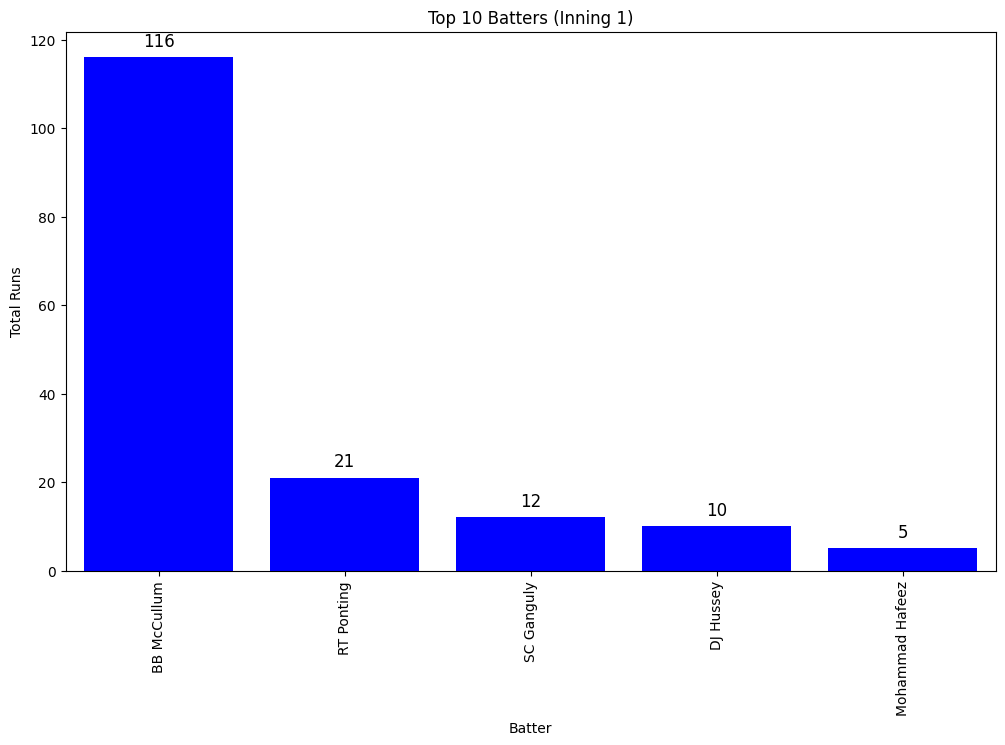

In [115]:
plot_top_batters(first_inning, 1)

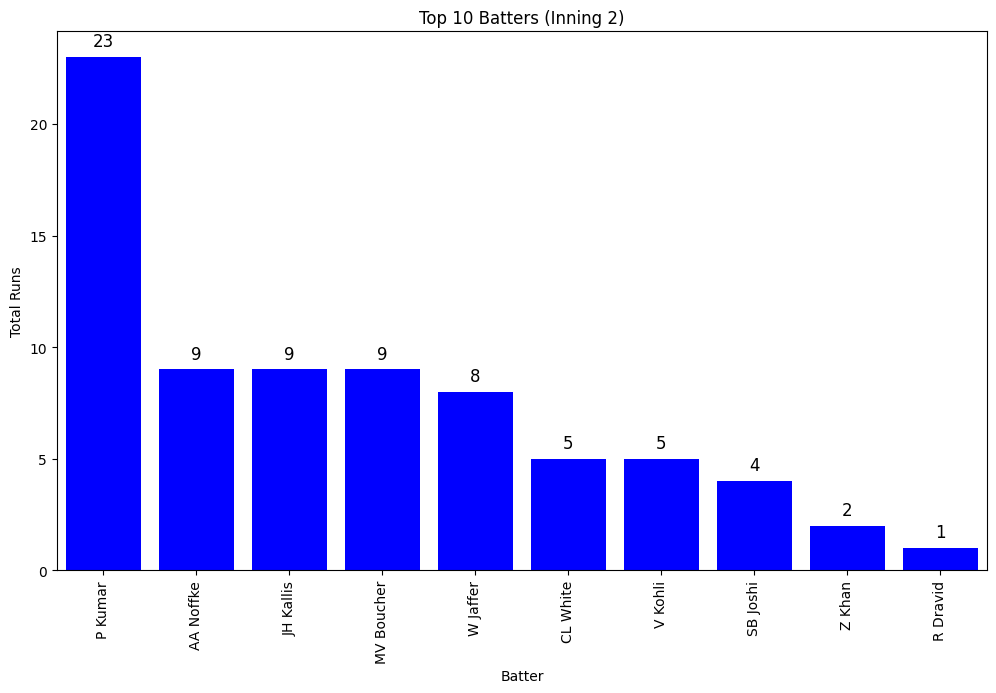

In [116]:
plot_top_batters(second_inning, 2)

In [117]:
def plot_extras_by_type(df, inning_num):
    extras_df = df[df['Extras'] > 0]
    extras_count = extras_df['ExtrasType'].value_counts()

    plt.figure(figsize=(10, 6))
    extras_count.plot(kind='bar', color='purple')
    plt.title(f'Extras by Type (Inning {inning_num})')
    plt.xlabel('Type of Extra')
    plt.ylabel('Count')
    plt.show()


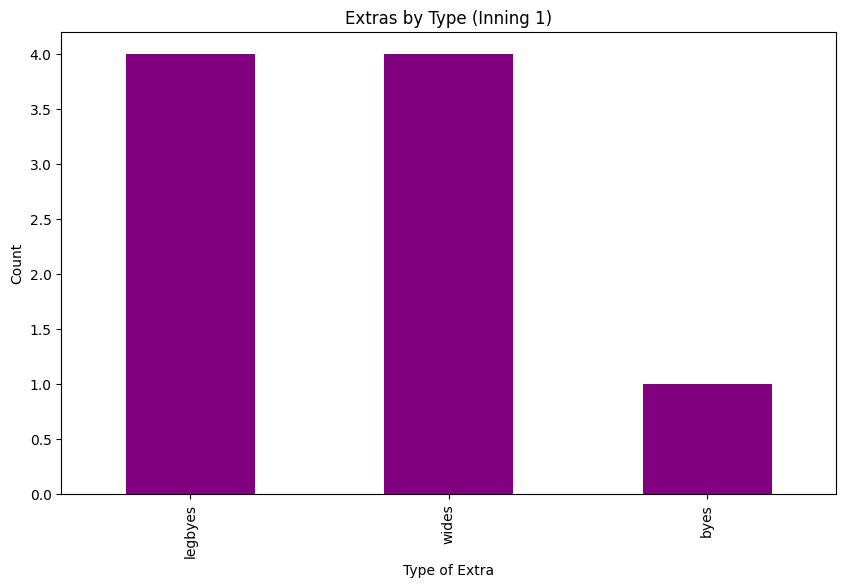

In [118]:
plot_extras_by_type(first_inning, 1)

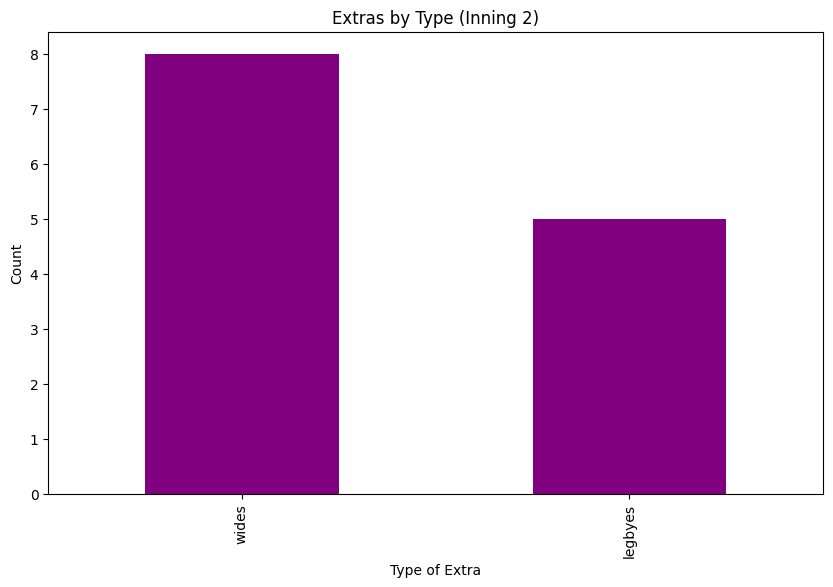

In [119]:
plot_extras_by_type(second_inning, 2)

In [120]:
data_new

BattingTeam  Over       Batter     Bowler  RunsBatter  RunsTotal  Extras  \
0              0     1   SC Ganguly    P Kumar           0          1       1   
1              0     1  BB McCullum    P Kumar           0          0       0   
2              0     1  BB McCullum    P Kumar           0          1       1   
6              0     1  BB McCullum    P Kumar           0          1       1   
7              0     2  BB McCullum     Z Khan           0          0       0   
..           ...   ...          ...        ...         ...        ...     ...   
219            1    15     SB Joshi   I Sharma           1          1       0   
220            1    15      P Kumar   I Sharma           0          1       1   
222            1    15      P Kumar   I Sharma           0          0       0   
223            1    16     SB Joshi  LR Shukla           0          1       1   
224            1    16     SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
0      legbyes           0   Not Out  No Wicket      No Fielders            1   
1    No Extras           0   Not Out  No Wicket      No Fielders            1   
2        wides           0   Not Out  No Wicket      No Fielders            2   
6      legbyes           0   Not Out  No Wicket      No Fielders            3   
7    No Extras           0   Not Out  No Wicket      No Fielders            3   
..         ...         ...       ...        ...              ...          ...   
219  No Extras           0   Not Out  No Wicket      No Fielders           73   
220    legbyes           0   Not Out  No Wicket      No Fielders           74   
222  No Extras           0   Not Out  No Wicket      No Fielders           74   
223      wides           0   Not Out  No Wicket      No Fielders           75   
224  No Extras           0  SB Joshi     caught      BB McCullum           75   

     Wicket  
0         0  
1         0  
2         0  
6         0  
7         0  
..      ...  
219       0  
220       0  
222       0  
223       0  
224       1  

[167 rows x 14 columns]

In [121]:
first_inning['Run_Rate'] = first_inning['Total_Score'] / first_inning['Over']
second_inning["Run_Rate"] = second_inning['Total_Score'] / second_inning['Over']

C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\2212390105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_inning['Run_Rate'] = first_inning['Total_Score'] / first_inning['Over']
C:\Users\dhruv\AppData\Local\Temp\ipykernel_39544\2212390105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_inning["Run_Rate"] = second_inning['Total_Score'] / second_inning['Over']


In [122]:
first_inning

BattingTeam  Over           Batter     Bowler  RunsBatter  RunsTotal  \
0              0     1       SC Ganguly    P Kumar           0          1   
1              0     1      BB McCullum    P Kumar           0          0   
2              0     1      BB McCullum    P Kumar           0          1   
6              0     1      BB McCullum    P Kumar           0          1   
7              0     2      BB McCullum     Z Khan           0          0   
..           ...   ...              ...        ...         ...        ...   
116            0    19      BB McCullum  JH Kallis           1          1   
117            0    19  Mohammad Hafeez  JH Kallis           4          4   
118            0    20      BB McCullum    P Kumar           6          6   
120            0    20      BB McCullum    P Kumar           2          2   
121            0    20      BB McCullum    P Kumar           0          0   

     Extras ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  \
0         1    legbyes           0   Not Out  No Wicket      No Fielders   
1         0  No Extras           0   Not Out  No Wicket      No Fielders   
2         1      wides           0   Not Out  No Wicket      No Fielders   
6         1    legbyes           0   Not Out  No Wicket      No Fielders   
7         0  No Extras           0   Not Out  No Wicket      No Fielders   
..      ...        ...         ...       ...        ...              ...   
116       0  No Extras           0   Not Out  No Wicket      No Fielders   
117       0  No Extras           1   Not Out  No Wicket      No Fielders   
118       0  No Extras           1   Not Out  No Wicket      No Fielders   
120       0  No Extras           0   Not Out  No Wicket      No Fielders   
121       0  No Extras           0   Not Out  No Wicket      No Fielders   

     Total_Score  Wicket  Run_Rate  
0              1       0  1.000000  
1              1       0  1.000000  
2              2       0  2.000000  
6              3       0  3.000000  
7              3       0  1.500000  
..           ...     ...       ...  
116          152       0  8.000000  
117          156       0  8.210526  
118          162       0  8.100000  
120          164       0  8.200000  
121          164       0  8.200000  

[89 rows x 15 columns]

In [123]:
data_new = pd.concat([first_inning , second_inning], axis=0)
data_new

BattingTeam  Over       Batter     Bowler  RunsBatter  RunsTotal  Extras  \
0              0     1   SC Ganguly    P Kumar           0          1       1   
1              0     1  BB McCullum    P Kumar           0          0       0   
2              0     1  BB McCullum    P Kumar           0          1       1   
6              0     1  BB McCullum    P Kumar           0          1       1   
7              0     2  BB McCullum     Z Khan           0          0       0   
..           ...   ...          ...        ...         ...        ...     ...   
219            1    15     SB Joshi   I Sharma           1          1       0   
220            1    15      P Kumar   I Sharma           0          1       1   
222            1    15      P Kumar   I Sharma           0          0       0   
223            1    16     SB Joshi  LR Shukla           0          1       1   
224            1    16     SB Joshi  LR Shukla           0          0       0   

    ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
0      legbyes           0   Not Out  No Wicket      No Fielders            1   
1    No Extras           0   Not Out  No Wicket      No Fielders            1   
2        wides           0   Not Out  No Wicket      No Fielders            2   
6      legbyes           0   Not Out  No Wicket      No Fielders            3   
7    No Extras           0   Not Out  No Wicket      No Fielders            3   
..         ...         ...       ...        ...              ...          ...   
219  No Extras           0   Not Out  No Wicket      No Fielders           73   
220    legbyes           0   Not Out  No Wicket      No Fielders           74   
222  No Extras           0   Not Out  No Wicket      No Fielders           74   
223      wides           0   Not Out  No Wicket      No Fielders           75   
224  No Extras           0  SB Joshi     caught      BB McCullum           75   

     Wicket  Run_Rate  
0         0  1.000000  
1         0  1.000000  
2         0  2.000000  
6         0  3.000000  
7         0  1.500000  
..      ...       ...  
219       0  4.866667  
220       0  4.933333  
222       0  4.933333  
223       0  4.687500  
224       1  4.687500  

[167 rows x 15 columns]

In [124]:
data_new.head(10)

BattingTeam  Over       Batter   Bowler  RunsBatter  RunsTotal  Extras  \
0             0     1   SC Ganguly  P Kumar           0          1       1   
1             0     1  BB McCullum  P Kumar           0          0       0   
2             0     1  BB McCullum  P Kumar           0          1       1   
6             0     1  BB McCullum  P Kumar           0          1       1   
7             0     2  BB McCullum   Z Khan           0          0       0   
8             0     2  BB McCullum   Z Khan           4          4       0   
10            0     2  BB McCullum   Z Khan           6          6       0   
13            0     3   SC Ganguly  P Kumar           0          0       0   
15            0     3   SC Ganguly  P Kumar           0          1       1   
16            0     3  BB McCullum  P Kumar           4          4       0   

   ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
0     legbyes           0   Not Out  No Wicket      No Fielders            1   
1   No Extras           0   Not Out  No Wicket      No Fielders            1   
2       wides           0   Not Out  No Wicket      No Fielders            2   
6     legbyes           0   Not Out  No Wicket      No Fielders            3   
7   No Extras           0   Not Out  No Wicket      No Fielders            3   
8   No Extras           1   Not Out  No Wicket      No Fielders            7   
10  No Extras           1   Not Out  No Wicket      No Fielders           13   
13  No Extras           0   Not Out  No Wicket      No Fielders           13   
15    legbyes           0   Not Out  No Wicket      No Fielders           14   
16  No Extras           1   Not Out  No Wicket      No Fielders           18   

    Wicket  Run_Rate  
0        0  1.000000  
1        0  1.000000  
2        0  2.000000  
6        0  3.000000  
7        0  1.500000  
8        0  3.500000  
10       0  6.500000  
13       0  4.333333  
15       0  4.666667  
16       0  6.000000

In [125]:
Total_Score = data_new.groupby(['Over',"BattingTeam"])['RunsTotal'].sum().reset_index()
Total_Score

Over  BattingTeam  RunsTotal
0      1            0          3
1      1            1          3
2      2            0         10
3      2            1          5
4      3            0          6
5      3            1          3
6      4            0         17
7      4            1          4
8      5            0         10
9      5            1          8
10     6            0          1
11     6            1          2
12     7            0          4
13     7            1          6
14     8            0          2
15     8            1          4
16     9            0          4
17     9            1          4
18    10            0          8
19    10            1          7
20    11            0         15
21    11            1          5
22    12            0         10
23    12            1          3
24    13            0          8
25    13            1         10
26    14            0          4
27    14            1          7
28    15            0         17
29    15            1          3
30    16            0          4
31    16            1          1
32    17            0         12
33    18            0          6
34    19            0         15
35    20            0          8

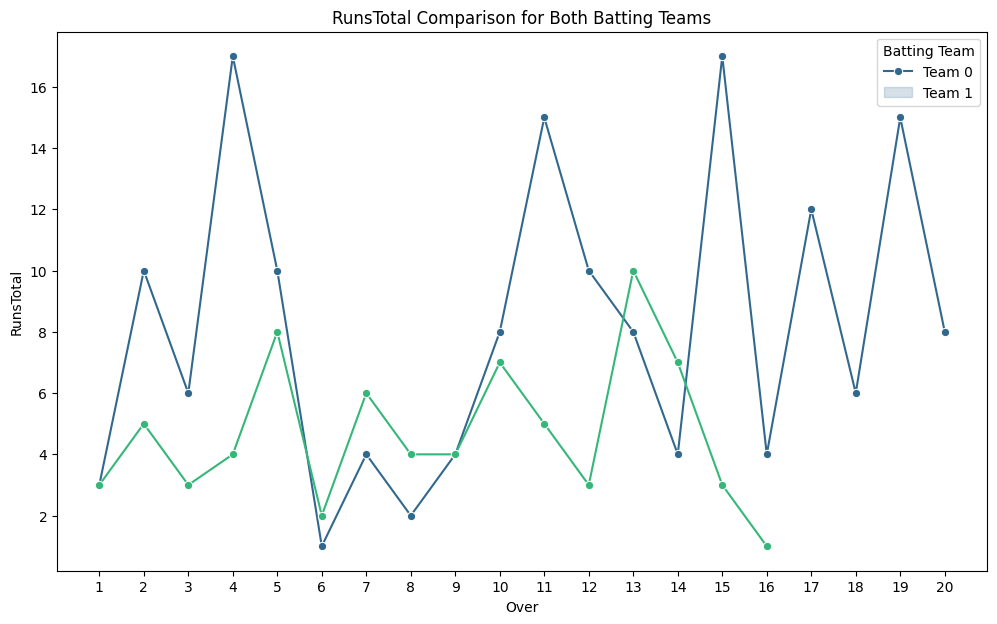

In [126]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='Over', y='RunsTotal', hue='BattingTeam', data=Total_Score, marker='o', palette='viridis')
plt.title('RunsTotal Comparison for Both Batting Teams')
plt.xlabel('Over')
plt.ylabel('RunsTotal')
plt.xticks(range(1, 21))
plt.legend(title='Batting Team', labels=['Team 0', 'Team 1'])
plt.show()

In [127]:
Run_Rate = data_new.groupby(['Over','BattingTeam'])['Run_Rate'].mean().reset_index()

In [128]:
Total_Score

Over  BattingTeam  RunsTotal
0      1            0          3
1      1            1          3
2      2            0         10
3      2            1          5
4      3            0          6
5      3            1          3
6      4            0         17
7      4            1          4
8      5            0         10
9      5            1          8
10     6            0          1
11     6            1          2
12     7            0          4
13     7            1          6
14     8            0          2
15     8            1          4
16     9            0          4
17     9            1          4
18    10            0          8
19    10            1          7
20    11            0         15
21    11            1          5
22    12            0         10
23    12            1          3
24    13            0          8
25    13            1         10
26    14            0          4
27    14            1          7
28    15            0         17
29    15            1          3
30    16            0          4
31    16            1          1
32    17            0         12
33    18            0          6
34    19            0         15
35    20            0          8

In [129]:
Run_Rate

Over  BattingTeam  Run_Rate
0      1            0  1.750000
1      1            1  2.000000
2      2            0  3.833333
3      2            1  2.900000
4      3            0  5.333333
5      3            1  3.055556
6      4            0  7.958333
7      4            1  3.550000
8      5            0  8.766667
9      5            1  3.966667
10     6            0  7.833333
11     6            1  3.933333
12     7            0  7.047619
13     7            1  3.885714
14     8            0  6.500000
15     8            1  4.250000
16     9            0  6.083333
17     9            1  4.063492
18    10            0  6.025000
19    10            1  4.180000
20    11            0  6.581818
21    11            1  4.431818
22    12            0  7.250000
23    12            1  4.400000
24    13            0  7.294872
25    13            1  4.815385
26    14            0  7.142857
27    14            1  4.732143
28    15            0  7.493333
29    15            1  4.866667
30    16            0  7.575000
31    16            1  4.687500
32    17            0  7.588235
33    18            0  7.611111
34    19            0  7.926316
35    20            0  8.166667

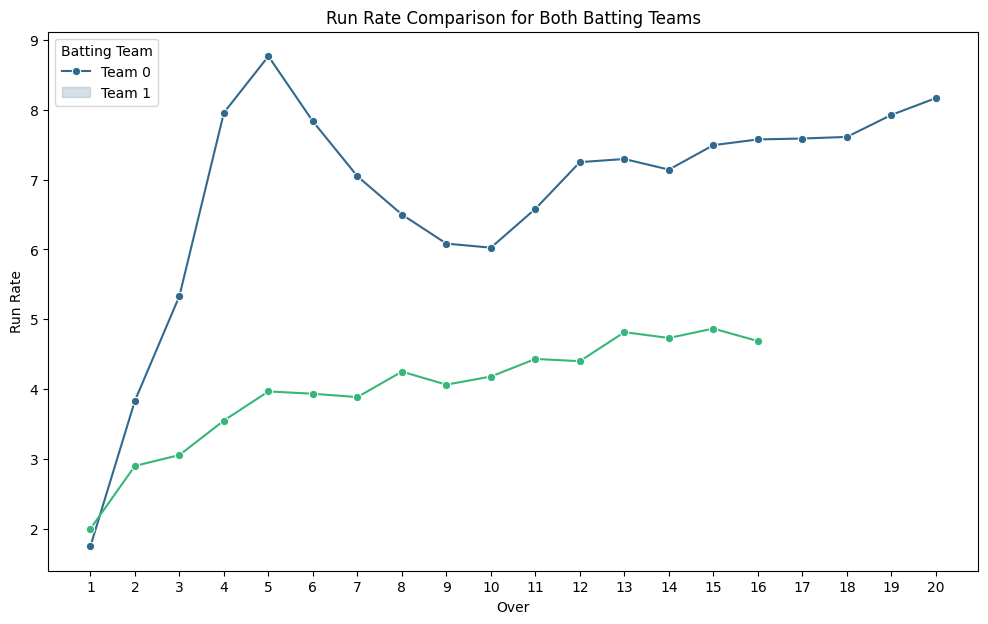

In [130]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='Over', y='Run_Rate', hue='BattingTeam', data=Run_Rate, marker='o', palette='viridis')
plt.title('Run Rate Comparison for Both Batting Teams')
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.xticks(range(1, 21))
plt.legend(title='Batting Team', labels=['Team 0', 'Team 1'])
plt.show()

In [131]:
data_new.head(10)

BattingTeam  Over       Batter   Bowler  RunsBatter  RunsTotal  Extras  \
0             0     1   SC Ganguly  P Kumar           0          1       1   
1             0     1  BB McCullum  P Kumar           0          0       0   
2             0     1  BB McCullum  P Kumar           0          1       1   
6             0     1  BB McCullum  P Kumar           0          1       1   
7             0     2  BB McCullum   Z Khan           0          0       0   
8             0     2  BB McCullum   Z Khan           4          4       0   
10            0     2  BB McCullum   Z Khan           6          6       0   
13            0     3   SC Ganguly  P Kumar           0          0       0   
15            0     3   SC Ganguly  P Kumar           0          1       1   
16            0     3  BB McCullum  P Kumar           4          4       0   

   ExtrasType  IsBoundary PlayerOut WicketKind FieldersInvolved  Total_Score  \
0     legbyes           0   Not Out  No Wicket      No Fielders            1   
1   No Extras           0   Not Out  No Wicket      No Fielders            1   
2       wides           0   Not Out  No Wicket      No Fielders            2   
6     legbyes           0   Not Out  No Wicket      No Fielders            3   
7   No Extras           0   Not Out  No Wicket      No Fielders            3   
8   No Extras           1   Not Out  No Wicket      No Fielders            7   
10  No Extras           1   Not Out  No Wicket      No Fielders           13   
13  No Extras           0   Not Out  No Wicket      No Fielders           13   
15    legbyes           0   Not Out  No Wicket      No Fielders           14   
16  No Extras           1   Not Out  No Wicket      No Fielders           18   

    Wicket  Run_Rate  
0        0  1.000000  
1        0  1.000000  
2        0  2.000000  
6        0  3.000000  
7        0  1.500000  
8        0  3.500000  
10       0  6.500000  
13       0  4.333333  
15       0  4.666667  
16       0  6.000000

In [132]:
data_new.columns

Index(['BattingTeam', 'Over', 'Batter', 'Bowler', 'RunsBatter', 'RunsTotal',
       'Extras', 'ExtrasType', 'IsBoundary', 'PlayerOut', 'WicketKind',
       'FieldersInvolved', 'Total_Score', 'Wicket', 'Run_Rate'],
      dtype='object')

In [133]:
data.shape

(167, 12)

In [134]:
numerical_columns = [i for i in data_new.columns if data_new[i].dtype != "O"]
categorical_columns = [i for i in data_new.columns if data_new[i].dtype == "O"]

numerical_columns

['BattingTeam',
 'Over',
 'RunsBatter',
 'RunsTotal',
 'Extras',
 'IsBoundary',
 'Total_Score',
 'Wicket',
 'Run_Rate']

In [135]:
categorical_columns

['Batter',
 'Bowler',
 'ExtrasType',
 'PlayerOut',
 'WicketKind',
 'FieldersInvolved']

In [136]:
data_new["RunsTotal"].unique()

array([1, 0, 4, 6, 5, 2], dtype=int64)

In [137]:
data_new[numerical_columns].corr()

BattingTeam      Over  RunsBatter  RunsTotal    Extras  \
BattingTeam     1.000000 -0.256056   -0.257408  -0.251824  0.020044   
Over           -0.256056  1.000000    0.188859   0.141212 -0.128096   
RunsBatter     -0.257408  0.188859    1.000000   0.926878 -0.211771   
RunsTotal      -0.251824  0.141212    0.926878   1.000000  0.170563   
Extras          0.020044 -0.128096   -0.211771   0.170563  1.000000   
IsBoundary     -0.215517  0.128378    0.913530   0.869819 -0.133347   
Total_Score    -0.518989  0.935142    0.262840   0.217922 -0.122575   
Wicket          0.175966 -0.012793   -0.189937  -0.225380 -0.088222   
Run_Rate       -0.750433  0.542574    0.321574   0.289099 -0.091432   

             IsBoundary  Total_Score    Wicket  Run_Rate  
BattingTeam   -0.215517    -0.518989  0.175966 -0.750433  
Over           0.128378     0.935142 -0.012793  0.542574  
RunsBatter     0.913530     0.262840 -0.189937  0.321574  
RunsTotal      0.869819     0.217922 -0.225380  0.289099  
Extras        -0.133347    -0.122575 -0.088222 -0.091432  
IsBoundary     1.000000     0.193931 -0.127594  0.261267  
Total_Score    0.193931     1.000000 -0.069080  0.723070  
Wicket        -0.127594    -0.069080  1.000000 -0.124195  
Run_Rate       0.261267     0.723070 -0.124195  1.000000

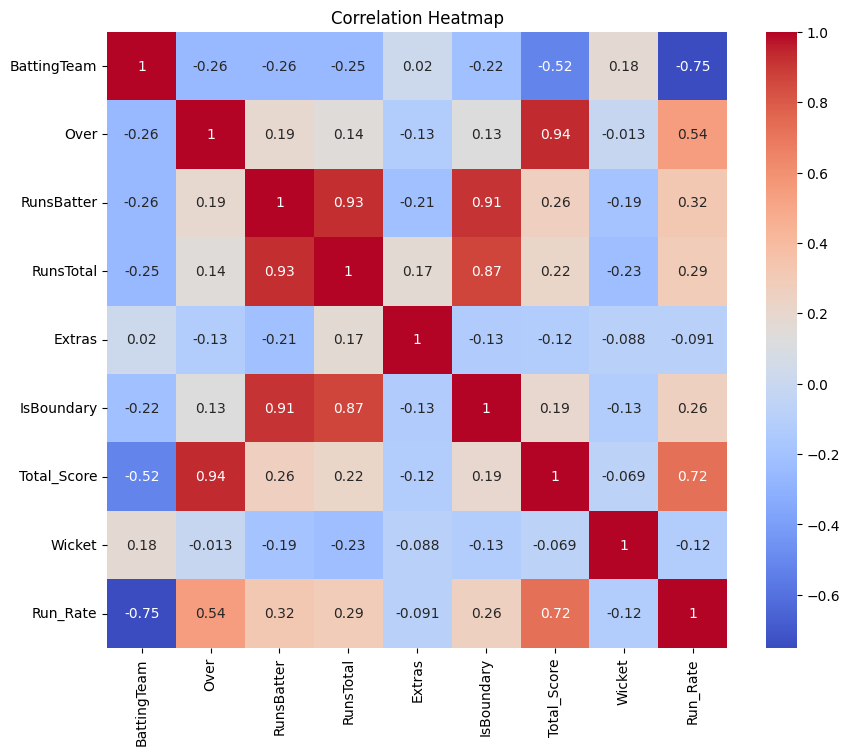

In [138]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_new[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [139]:
for i in categorical_columns :
  print(i)
  print(data_new[i].unique())


Batter
['SC Ganguly' 'BB McCullum' 'RT Ponting' 'DJ Hussey' 'Mohammad Hafeez'
 'R Dravid' 'W Jaffer' 'V Kohli' 'JH Kallis' 'CL White' 'MV Boucher'
 'B Akhil' 'AA Noffke' 'P Kumar' 'Z Khan' 'SB Joshi']
Bowler
['P Kumar' 'Z Khan' 'AA Noffke' 'JH Kallis' 'SB Joshi' 'CL White'
 'AB Dinda' 'I Sharma' 'AB Agarkar' 'SC Ganguly' 'LR Shukla']
ExtrasType
['legbyes' 'No Extras' 'wides' 'byes']
PlayerOut
['Not Out' 'SC Ganguly' 'RT Ponting' 'DJ Hussey' 'R Dravid' 'V Kohli'
 'JH Kallis' 'W Jaffer' 'MV Boucher' 'B Akhil' 'CL White' 'AA Noffke'
 'Z Khan' 'SB Joshi']
WicketKind
['No Wicket' 'caught' 'bowled' 'run out']
FieldersInvolved
['No Fielders' 'JH Kallis' 'P Kumar' 'CL White' 'M Kartik' 'RT Ponting'
 'WP Saha' 'AB Agarkar, WP Saha' 'BB McCullum']


In [140]:
for i in categorical_columns :
    le = LabelEncoder()
    data_new[i] = le.fit_transform(data_new[i])


In [141]:
data_new.head(4)

BattingTeam  Over  Batter  Bowler  RunsBatter  RunsTotal  Extras  \
0            0     1      12       7           0          1       1   
1            0     1       2       7           0          0       0   
2            0     1       2       7           0          1       1   
6            0     1       2       7           0          1       1   

   ExtrasType  IsBoundary  PlayerOut  WicketKind  FieldersInvolved  \
0           2           0          6           0                 5   
1           0           0          6           0                 5   
2           3           0          6           0                 5   
6           2           0          6           0                 5   

   Total_Score  Wicket  Run_Rate  
0            1       0       1.0  
1            1       0       1.0  
2            2       0       2.0  
6            3       0       3.0

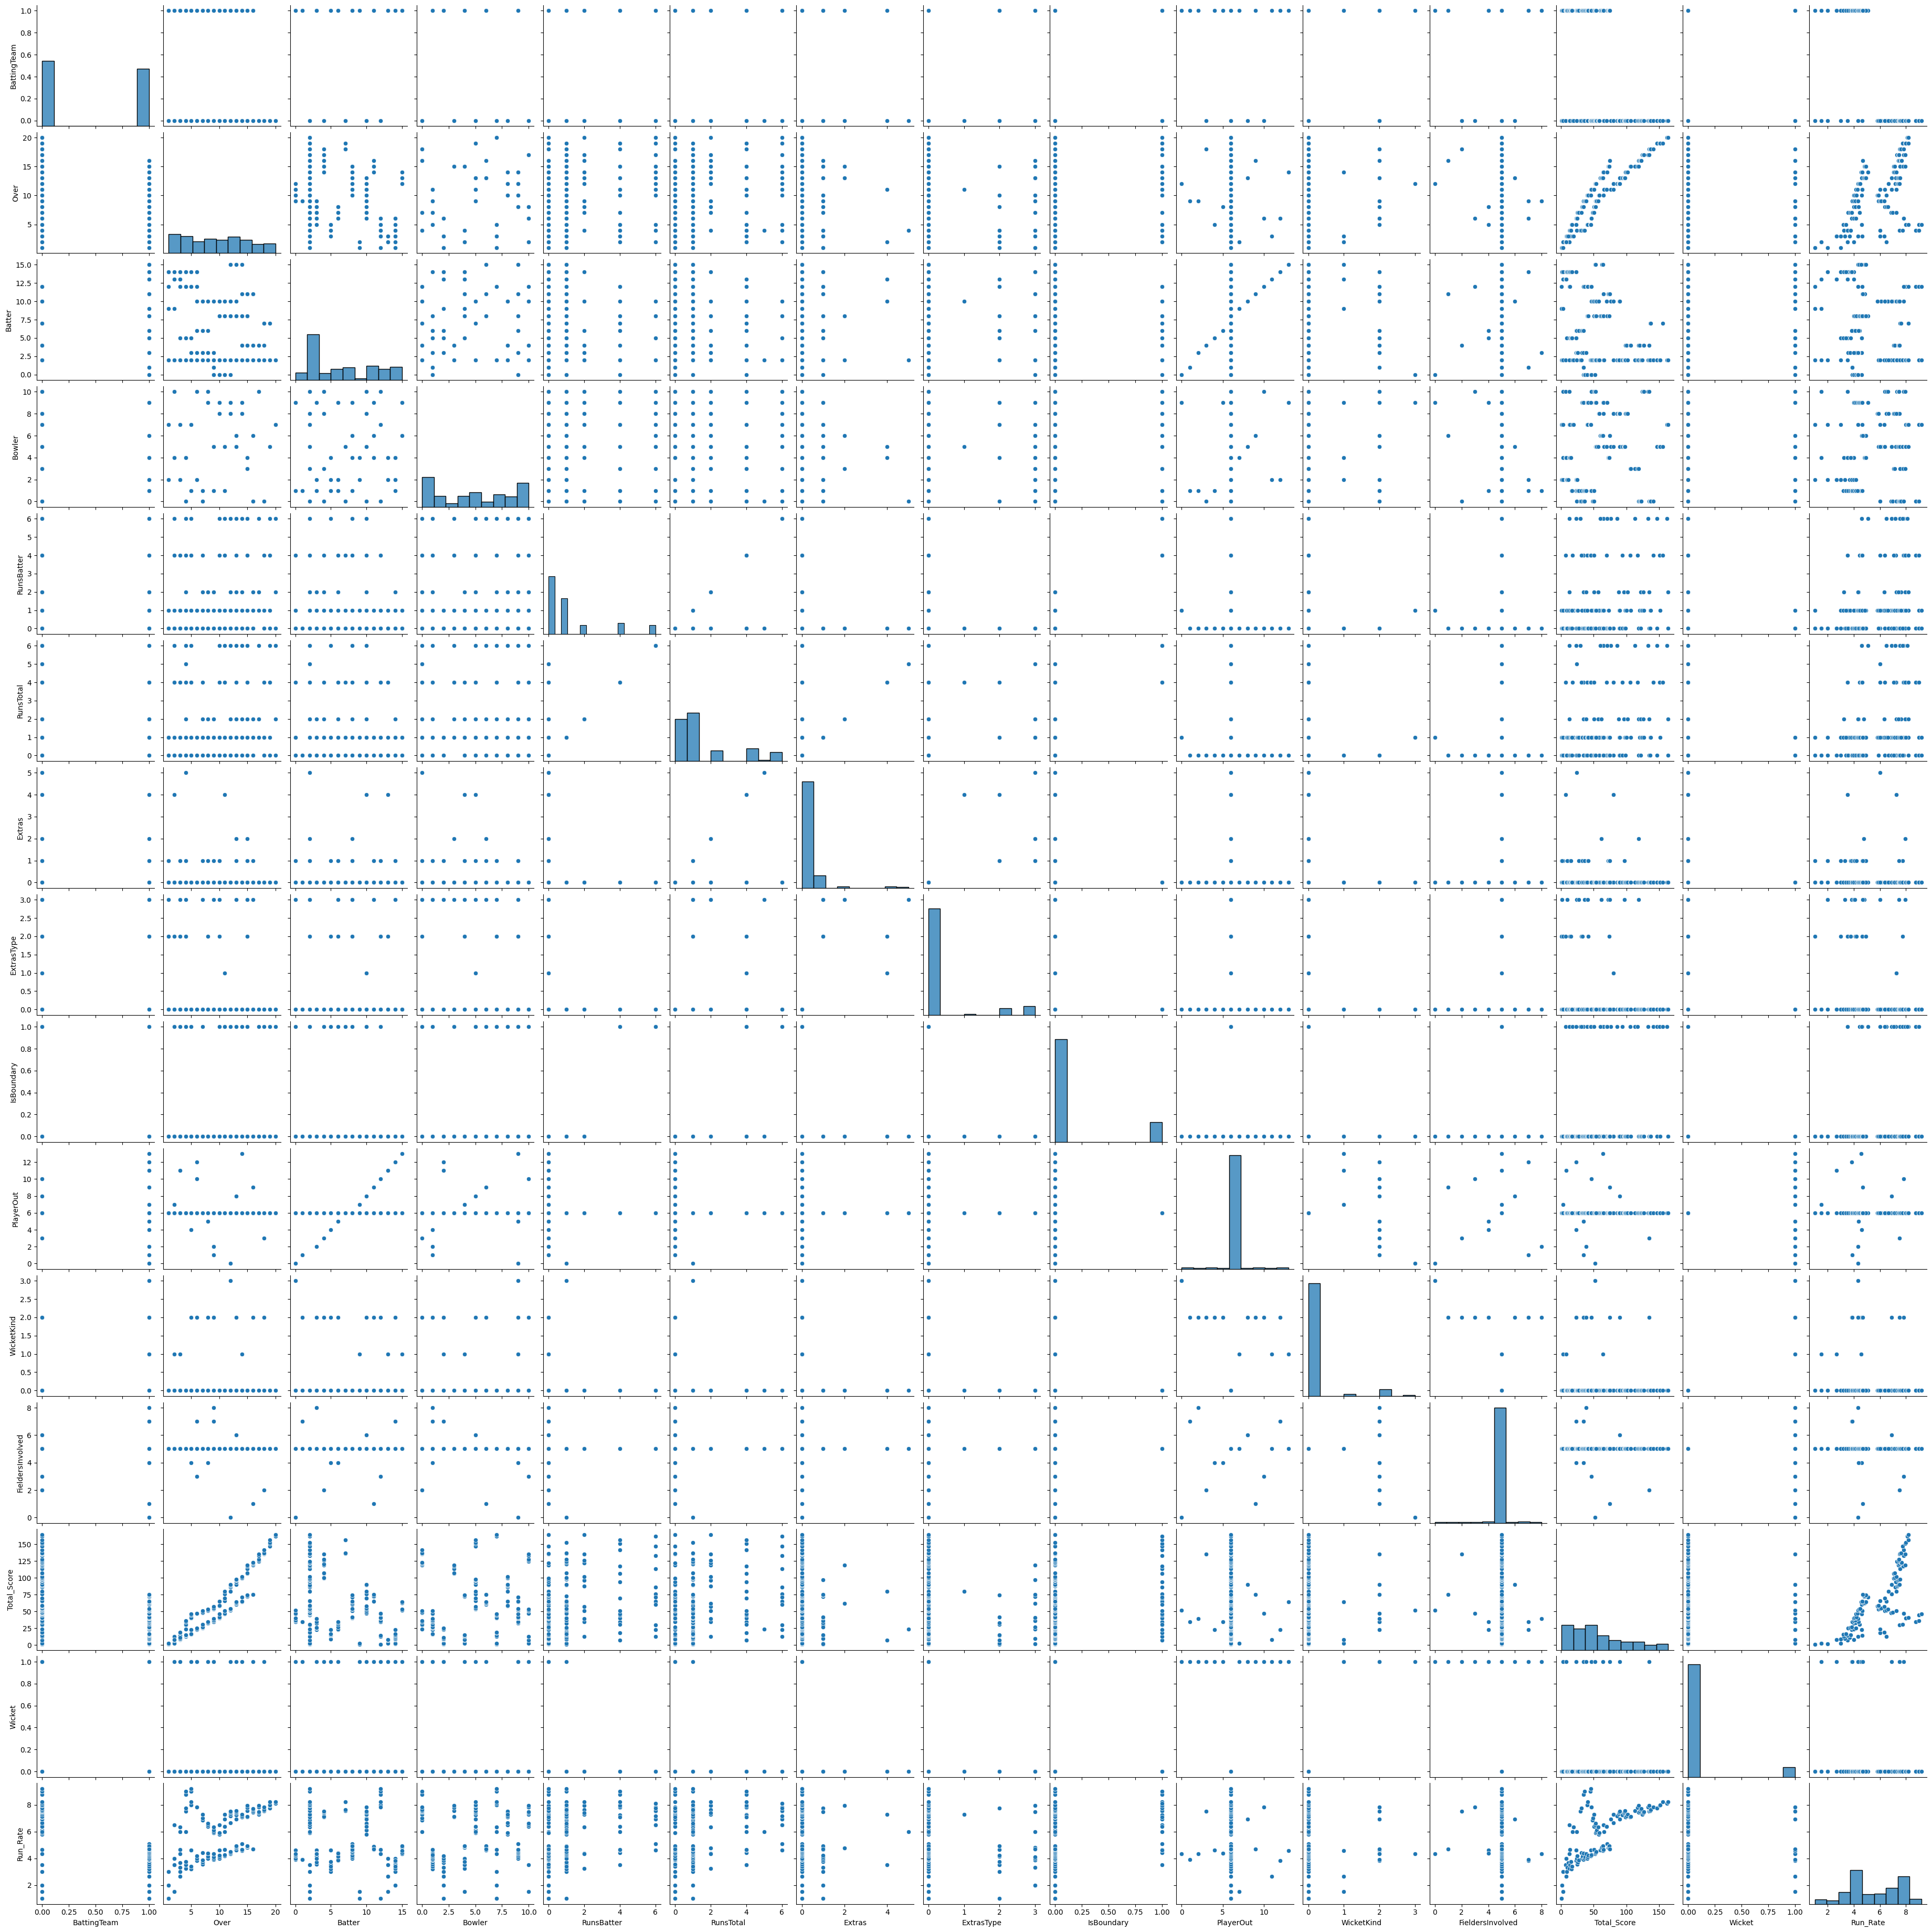

In [142]:
sns.pairplot(data_new)


# Feature Selection And Model Creation

In [143]:
data_new.columns

Index(['BattingTeam', 'Over', 'Batter', 'Bowler', 'RunsBatter', 'RunsTotal',
       'Extras', 'ExtrasType', 'IsBoundary', 'PlayerOut', 'WicketKind',
       'FieldersInvolved', 'Total_Score', 'Wicket', 'Run_Rate'],
      dtype='object')

In [144]:
data_new.shape

(167, 15)

In [145]:
data_final = data_new.copy()
data_final.head(4)

BattingTeam  Over  Batter  Bowler  RunsBatter  RunsTotal  Extras  \
0            0     1      12       7           0          1       1   
1            0     1       2       7           0          0       0   
2            0     1       2       7           0          1       1   
6            0     1       2       7           0          1       1   

   ExtrasType  IsBoundary  PlayerOut  WicketKind  FieldersInvolved  \
0           2           0          6           0                 5   
1           0           0          6           0                 5   
2           3           0          6           0                 5   
6           2           0          6           0                 5   

   Total_Score  Wicket  Run_Rate  
0            1       0       1.0  
1            1       0       1.0  
2            2       0       2.0  
6            3       0       3.0

In [161]:
data_new.to_csv("clean_data.csv", index=False)

In [147]:
data_final.head(4)

BattingTeam  Over  Batter  Bowler  RunsBatter  RunsTotal  Extras  \
0            0     1      12       7           0          1       1   
1            0     1       2       7           0          0       0   
2            0     1       2       7           0          1       1   
6            0     1       2       7           0          1       1   

   ExtrasType  IsBoundary  PlayerOut  WicketKind  FieldersInvolved  \
0           2           0          6           0                 5   
1           0           0          6           0                 5   
2           3           0          6           0                 5   
6           2           0          6           0                 5   

   Total_Score  Wicket  Run_Rate  
0            1       0       1.0  
1            1       0       1.0  
2            2       0       2.0  
6            3       0       3.0

In [148]:
target_feature = "RunsTotal"
target_feature

'RunsTotal'

In [149]:
X = data_final.drop(target_feature, axis=1)
y = data_final[target_feature]

In [150]:
X.shape

(167, 14)

In [151]:
y.shape

(167,)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((147, 14), (20, 14), (147,), (20,))

In [153]:
model = RandomForestClassifier()

In [154]:
model

RandomForestClassifier()

In [155]:
model.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [156]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 4, 0, 0, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [157]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9500


In [158]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.72      0.75      0.73        20
weighted avg       0.91      0.95      0.93        20



c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [159]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[11  0  0  0]
 [ 0  7  0  0]
 [ 0  1  0  0]
 [ 0  0  0  1]]


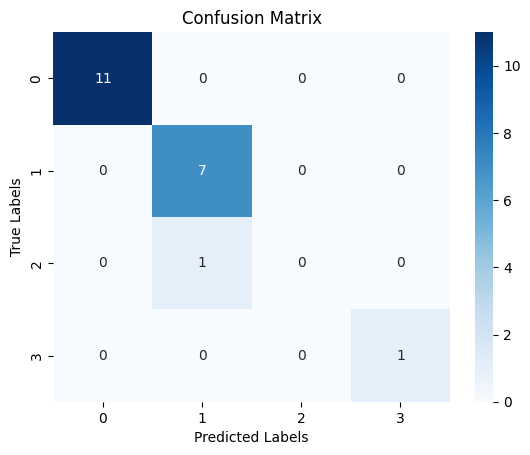

In [160]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [162]:
import pickle

In [163]:
pickle.dump(model,open("model/final_model.pkl","wb"))

# Model Saved...